<a href="https://colab.research.google.com/github/woodpy99/ConfliBERT_AW/blob/main/ConfliBERT_AW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jieba
!pip install wordcloud

In [1]:
import jieba
from wordcloud import WordCloud
txt = '弱小的人,才习惯,嘲讽和否定，而内心,强大的人,从不吝啬赞美和鼓励！我们就是后浪，奔涌吧！后浪，奔涌吧！'
words = jieba.lcut(txt)     #精确分词
newtxt = ''.join(words)    #空格拼接
wordcloud = WordCloud().generate(newtxt)
wordcloud.to_file('中文词云图.jpg')


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.250 seconds.
DEBUG:jieba:Loading model cost 2.250 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [2]:
# This code checks your Python environment (should be Python 3.6 or above), do
# this check if you are running this code on your local machine
import sys
print("Python Version:", sys.version)

Python Version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [4]:
from transformers import pipeline #provides access to the pre-trained models like ConfliBERT which we will use to process text
import ipywidgets as widgets
from ipywidgets import interact
import io #for handling file operations, which we will need to read the text data you provide.
from tqdm import tqdm #for showing progress bars

In [5]:
pipe = None

def initialize_pipe(option):
  global pipe
  if option == "Named Entity Recognition":
    pipe = pipeline("token-classification", model="eventdata-utd/conflibert-named-entity-recognition")
  elif option == "Binary Classification SATP":
    pipe = pipeline("text-classification", model="eventdata-utd/conflibert-satp-binary-classification")
  elif option == "Binary Classification":
    pipe = pipeline("text-classification", model="eventdata-utd/conflibert-binary-classification")
  return f"{option} selected"

#select 'Binary Classification' in the drop down menu. Then the corresponding model is loaded, initialised and ready to use.
print("Please choose the downstream task")
interact(initialize_pipe, option=['Named Entity Recognition', "Binary Classification SATP", 'Binary Classification'])

Please choose the downstream task


interactive(children=(Dropdown(description='option', options=('Named Entity Recognition', 'Binary Classificati…

<function __main__.initialize_pipe(option)>

In [12]:
from google.colab import files
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

import os
print(os.getcwd())

# Clone the repository
!git clone https://github.com/woodpy99/ConfliBERT_AW.git

# Change directory into your repository
%cd ConfliBERT_AW

# Read the dataset using its relative path
import pandas as pd
df = pd.read_csv('BBC News_test.tsv', sep='\t', header=None)
print(df.head())

#Preparing input data:

# Combine the columns so that both the text and the label are retained.
# For each row, create a string in the format: "text [Label: x]"
data_formatted = df.apply(lambda row: f"{row[0]} [Label: {row[1]}]", axis=1)

# Combine all rows into a single string with each article separated by "###"
formatted_text = "\n###\n".join(data_formatted)
#Text Formatting: Each piece of text, such as an article or report, should be separated by a sequence of hash symbols (###) on a new line.
#This delimiter helps the model recognize individual documents or sections within a larger text file.

    # Save the formatted text to a .txt file (ensure file is in .txt format - chosen because it's widely compatible and easy to handle programmatically)
output_file_path = 'formatted_text.txt'
with open(output_file_path, 'w', encoding='utf-8') as file:
  file.write(formatted_text)

print(f"Formatted text saved to {output_file_path}")

    # Provide a download link to the file path in Colab
files.download(output_file_path)

def process_text(text):
  # for pre-processing, split the text by lines and then combine them with "###"
  lines = text.split('\n')
  formatted_text = "\n###\n".join(lines)

    # Save the formatted text to a .txt file
output_file_path = 'formatted_text.txt'
with open(output_file_path, 'w', encoding='utf-8') as file:
  file.write(formatted_text)

print(f"Formatted text saved to {output_file_path}")

    # Provide a download link in Colab to the pre-processed data
files.download(output_file_path)

# Create a text area widget
text_area = widgets.Textarea(
    value='Enter your text here. Each line will be considered as a separate article.',
    placeholder='Type something',
    description='Text:',
    disabled=False,
    layout=widgets.Layout(width='100%', height='300px')
)

# Create a button to process the text area input
process_button = widgets.Button(
    description='Process Text',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to format text',
    icon='check'
)

# Display the text area and button
display(text_area, process_button)

# Set the button click event
def on_button_click(b):
    process_text(text_area.value)

process_button.on_click(on_button_click)

# Provide a file upload button
upload_button = widgets.Button(
    description='Upload File',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to upload file',
    icon='upload'
)

display(upload_button)

# Set the button click event for file upload
def on_upload_button_click(b):
    upload_file()

upload_button.on_click(on_upload_button_click)


/content/ConfliBERT_AW/ConfliBERT_AW
Cloning into 'ConfliBERT_AW'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (5/5), 1.81 MiB | 5.04 MiB/s, done.
/content/ConfliBERT_AW/ConfliBERT_AW/ConfliBERT_AW
                                                   0  1
0  ocean s twelve raids box office ocean s twelve...  0
1  wilkinson fit to face edinburgh england captai...  0
2  security warning over  fbi virus  the us feder...  0
3  moya fights back for indian title carlos moya ...  0
4  disappointed scott in solid start allan scott ...  0
Formatted text saved to formatted_text.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Formatted text saved to formatted_text.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Textarea(value='Enter your text here. Each line will be considered as a separate article.', description='Text:…

Button(description='Process Text', icon='check', style=ButtonStyle(), tooltip='Click to format text')

Button(description='Upload File', icon='upload', style=ButtonStyle(), tooltip='Click to upload file')

In [9]:
# prompt: Upload a file

from google.colab import files

uploaded = files.upload()

Saving processed test data_v2.txt to processed test data_v2.txt


In [13]:
# Processing the file and collecting results
import io
from tqdm import tqdm
from sklearn.metrics import classification_report
import pandas as pd  # Add pandas import
import re

results = []
ground_truth_data = []  # Create a single ground truth collection

for filename, data in uploaded.items():
    file_content = io.BytesIO(data)
    text = file_content.read().decode('utf-8')

# Split the entire file content by paragraphs using "###"
paragraphs = text.split('###')

for paragraph in tqdm(paragraphs, desc=f"Processing {filename}"):
    paragraph = paragraph.strip()
    if not any(char.isalnum() for char in paragraph):
        continue  # Skip empty or non-alphanumeric paragraphs

    # Extract label if it exists in the format "[Label: x]"
    label_match = re.search(r'\[Label: (\d+)\]', paragraph)

    if label_match:
        # Extract text and label
        label = int(label_match.group(1))
        text_content = paragraph.replace(label_match.group(0), '').strip()

        # Add to ground truth
        ground_truth_data.append({'text': text_content, 'label': label})

        # Process for classification
        classification_result = pipe(text_content, truncation=True, max_length=512)
        results.append({'text': text_content, 'classification_result': classification_result})
        print(classification_result)
        print(text_content)
        print('---')
    else:
        # Process paragraph without extracting label
        classification_result = pipe(paragraph, truncation=True, max_length=512)
        results.append({'text': paragraph, 'classification_result': classification_result})
        print(classification_result)
        print(paragraph)
        print('---')

# Create DataFrames after processing
results_df = pd.DataFrame(results) # Create results_df from results list
test_data = pd.DataFrame(ground_truth_data) # Create test_data from ground_truth_data

# Save these variables to ensure they're available for the next cell
print(f"Processed {len(results_df)} paragraphs")
print(f"Extracted {len(test_data)} ground truth labels")

Processing processed test data_v2.txt:   0%|          | 1/322 [00:02<13:21,  2.50s/it]

[{'label': 'Non-Conflict', 'score': 0.9988271594047546}]
ocean s twelve raids box office ocean s twelve  the crime caper sequel starring george clooney  brad pitt and julia roberts  has gone straight to number one in the us box office chart.  it took $40.8m (PS21m) in weekend ticket sales  according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one  national treasure  into third place. wesley snipes  blade: trinity was in second  taking $16.1m (PS8.4m). rounding out the top five was animated fable the polar express  starring tom hanks  and festive comedy christmas with the kranks.  ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us  after the three films in the lord of the rings trilogy. the sequel narrowly beat its 2001 predecessor  ocean s eleven which took $38.1m (PS19.8m) on its opening weekend and $184m (PS95.8m) in total. a remake

Processing processed test data_v2.txt:   1%|          | 2/322 [00:03<08:07,  1.52s/it]

[{'label': 'Non-Conflict', 'score': 0.9998778104782104}]
wilkinson fit to face edinburgh england captain jonny wilkinson will make his long-awaited return from injury against edinburgh on saturday.  wilkinson  who has not played since injuring his bicep on 17 october  took part in full-contact training with newcastle falcons on wednesday. and the 25-year-old fly-half will start saturday s heineken cup match at murrayfield on the bench. but newcastle director of rugby rob andrew said:  he s fine and we hope to get him into the game at some stage.  the 25-year-old missed england s autumn internationals after aggravating the haematoma in his upper right arm against saracens. he was subsequently replaced as england captain by full-back jason robinson. sale s charlie hodgson took over the number 10 shirt in the internationals against canada  south africa and australia. wilkinson s year has been disrupted by injury as his muscle problem followed eight months on the sidelines with a shoulder 

Processing processed test data_v2.txt:   1%|          | 3/322 [00:04<06:35,  1.24s/it]

[{'label': 'Non-Conflict', 'score': 0.9975945353507996}]
security warning over  fbi virus  the us federal bureau of investigation is warning that a computer virus is being spread via e-mails that purport to be from the fbi.  the e-mails show that they have come from an fbi.gov address and tell recipients that they have accessed illegal websites. the messages warn that their internet use has been monitored by the fbi s internet fraud complaint center. an attachment in the e-mail contains the virus  the fbi said. the message asks recipients to click on the attachment and answer some questions about their internet use. but rather than being a questionnaire  the attachment contains a virus that infects the recipient s computer  according to the agency. it is not clear what the virus does once it has infected a computer. users are warned never to open attachment from unsolicited e-mails or from people they do not know.   recipients of this or similar solicitations should know that the fbi d

Processing processed test data_v2.txt:   1%|          | 4/322 [00:05<05:54,  1.12s/it]

[{'label': 'Non-Conflict', 'score': 0.9996978044509888}]
moya fights back for indian title carlos moya became the first man to successfully defend the chennai open title by beating four-times finalist paradorn srichaphan 3-6 6-4 7-6 (7/5).  the spaniard then donated his PS28 000 prize money to relief efforts for the victims of the asian tsunami. the final was close throughout  with thai second seed srichaphan - the 2003 winner - closing out the first set. but moya took the second set  before bouncing back from 5-2 down in the decider to force and win a tie-break. moya confirmed afterwards:  i m donating my prize money from this tournament for the tsunami victims  hoping it makes some difference to their lives. his contribution follows pledges by four other players to donate their prize money from the tournament  which went ahead after the 26 december disaster which has so far claimed at least 150 000 lives. scrichapan said he would donate an unspecified amount for relief work in thaila

Processing processed test data_v2.txt:   2%|▏         | 5/322 [00:05<05:19,  1.01s/it]

[{'label': 'Non-Conflict', 'score': 0.9998962879180908}]
disappointed scott in solid start allan scott is confident of winning a medal at next week s european indoor championships after a solid debut on the international circuit.  the 22-year-old scot finished fourth in the 60m hurdles at the jose m cagigal memorial meeting in madrid.  it was definitely a learning curve and i certainly haven t ruled out challenging for a medal next week   said the east kilbride athlete. the race was won by felipe vivancos  who equalled the spanish record.  sweden s robert kronberg was second  with haiti s dudley dorival in third. scott was slightly disappointed with his run in the final. he won his heat in 7.64secs but ran 0.04secs slower in his first iaaf indoor grand prix circuit final.  i should have done better than that   he said.  i felt i could have won it. i got a poor start - but i still felt i should have ran faster.  vivancos slashed his personal best to equal the spanish record with a time 

Processing processed test data_v2.txt:   2%|▏         | 6/322 [00:07<06:36,  1.25s/it]

[{'label': 'Conflict', 'score': 0.987718939781189}]
strike threat over pension plans millions of public service workers could strike if ministers scrap their final salary pension scheme and make them work longer  warn union leaders.  the cabinet office has confirmed it is reviewing the current pension system  prompting unions representing 4.5m workers to threaten united action. they believe the plans include raising the mandatory retirement age for public service workers from 60 to 65. the government says unions will be consulted before any changes are made.  it is thought the proposed overhaul  due on thursday  could mean pensions could be based on a  career average  salary. for each year served  staff currently get one eightieth of their highest salary in the final three years. ministers will be anxious to avoid mass strike action in the lead-up to the next general election  which is widely expected next may. in a statement on sunday  the cabinet office said it was reviewing the civi

Processing processed test data_v2.txt:   2%|▏         | 7/322 [00:08<06:03,  1.15s/it]

[{'label': 'Non-Conflict', 'score': 0.9984747767448425}]
microsoft gets the blogging bug software giant microsoft is taking the plunge into the world of blogging.  it is launching a test service to allow people to publish blogs  or online journals  called msn spaces. microsoft is trailing behind competitors like google and aol  which already offer services which make it easy for people to set up web journals. blogs  short for web logs  have become a popular way for people to talk about their lives and express opinions online.  msn spaces is free to anyone with a hotmail or msn messenger account. people will be able to choose a layout for the page  upload images and share photo albums and music playlists. the service will be supported by banner ads.  this is a simple tool for people to express themselves   said msn s blake irving. this is microsoft s first foray into blogging  which has taken off as a web phenomenon in the past year. competitors like google already offer free services t

Processing processed test data_v2.txt:   2%|▏         | 8/322 [00:10<06:55,  1.32s/it]

[{'label': 'Conflict', 'score': 0.9552952647209167}]
wales  must learn health lessons  the new health minister for wales says there are lessons to learn from england in tackling waiting lists.  dr brian gibbons  on his first full day in the job after jane hutt was sacked  admitted  big challenges  but insisted the  essentials  were in place. but both plaid cymru and the liberal democrats said dr gibbons needed to change policy. meanwhile ms hutt defended her record  saying waiting times and lists were  only 10% of the health agenda. dr gibbons  who was a gp in blaengwynfi  in the upper afan valley  before becoming am for aberavon  said nhs staff wanted a period of consolidation after  tremendous change and reform . one of the biggest problems which had faced ms hutt during her five-and-a-half years as the assembly s first health minister was the length of waiting lists in wales.  in november the british medical association said nhs staff were  weeping with despair  as figures showed 31

Processing processed test data_v2.txt:   3%|▎         | 9/322 [00:11<06:09,  1.18s/it]

[{'label': 'Conflict', 'score': 0.9823127388954163}]
singapore growth at 8.1% in 2004 singapore s economy grew by 8.1% in 2004  its best performance since 2000  figures from the trade ministry show.  the advance  the second-fastest in asia after china  was led by growth of 13.1% in the key manufacturing sector. however  a slower-than-expected fourth quarter points to more modest growth for the trade-driven economy in 2005 as global technology demand falls back. slowdowns in the us and china could hit electronics exports  while the tsunami disaster may effect the service sector.  economic growth is set to halve in singapore this year to between 3% and 5%. in the fourth quarter  the city state s gross domestic product (gdp) rose at an annual rate of 2.4%. that was up from the third quarter  when it fell 3.0%  but was well below analyst forecasts.  i am surprised at the weak fourth quarter number. the main drag came from electronics   said lian chia liang  economist at jp morgan chase. si

Processing processed test data_v2.txt:   3%|▎         | 10/322 [00:12<06:52,  1.32s/it]

[{'label': 'Conflict', 'score': 0.9496761560440063}]
yukos sues four firms for $20bn russian oil firm yukos has sued four companies for their role in last year s forced state auction of its key oil production unit yuganskneftegas.  yukos is claiming more than $20bn (PS11bn) in damages after yugansk was sold in december to settle back taxes. the four companies named in the law suit are gas giant gazprom  its unit gazpromneft  investment company baikal  and state oil firm rosneft. yukos submitted the suit in houston  where it filed for bankruptcy. as well as suing for damages  yukos has asked the us court to send its tax dispute with the russian government to an international arbitrator. it also has submitted a reorganisation plan as part of its chapter 11 bankruptcy filing.  the clash between yukos and the kremlin came to a head last year when yukos was hit with a bill of more than $27bn in back taxes and unpaid fines. to settle the bill  russia forced yukos to sell off yuganskneftegas.

Processing processed test data_v2.txt:   3%|▎         | 11/322 [00:15<09:15,  1.78s/it]

[{'label': 'Non-Conflict', 'score': 0.9998658895492554}]
ireland win eclipses refereeing  errors  the international rugby board may have to step in to stop frustrated coaches and players from publicly haranguing referees when things go belly-up.  it may have to go the whole way and have nfl-style video cameras all over the field  or slap the vociferous perpetrators over the knuckles. what the irb does not want is a football scenario where the verbal slanging matches often overshadow the game itself. sunday s explosive six nations clash at lansdowne road was a good example as ireland took another step towards their first grand slam since 1948. the game was as exciting as it comes  with a much-improved england side enraged at a few decisions that did not go their way. one can understand that frustration. there was no doubt that ireland had the rub of the green in their 19-13 victory  but the reaction from the england camp may not have endeared them to the sport s  blazers . referee jonat

Processing processed test data_v2.txt:   4%|▎         | 12/322 [00:17<08:35,  1.66s/it]

[{'label': 'Conflict', 'score': 0.9977611303329468}]
howard pitches for uk ethnic vote michael howard is to make a pitch for britain s ethnic vote urging people who feel  taken for granted  by tony blair to vote conservative.  he will say conservatives  share the same values  as the uk s minorities. and that he wants to build a  better britain  where everyone  whatever the colour of their skin or religion  can  make the most of their talents . but the tory leader will argue against positive discrimination saying it is  outdated and unjust .   it sets family against family and it leads ethnic communities to doubt their own abilities   he will argue. mr howard - himself the son of immigrants - will acknowledge that racial discrimination still exists in the uk.  people from ethnic communities  for example  still earn less than their white counterparts   he will say before arguing the answer to helping everyone to get on was  free enterprise  free trade  free speech . the tory leader will 

Processing processed test data_v2.txt:   4%|▍         | 13/322 [00:18<08:13,  1.60s/it]

[{'label': 'Non-Conflict', 'score': 0.9997988343238831}]
loyalty cards idea for tv addicts viewers could soon be rewarded for watching tv as loyalty cards come to a screen near you.  any household hooked up to sky could soon be using smartcards in conjunction with their set-top boxes. broadcasters such as sky and itv could offer viewers loyalty points in return for watching a particular channel or programme. sky will activate a spare slot on set-top boxes in january  marketing magazine new media age reported.  sky set-top boxes have two slots. one is for the viewer s decryption card  while the other has been dormant until now.  loyalty cards have become a common addition to most wallets  as high street brands rush to keep customers with a series of incentives offered by store cards. now similar schemes look set to enter the highly competitive world of multi-channel tv. viewers who stay loyal to a particular tv channel could be rewarded by free tv content or freebies from retail partner

Processing processed test data_v2.txt:   4%|▍         | 14/322 [00:19<06:55,  1.35s/it]

[{'label': 'Non-Conflict', 'score': 0.9998880624771118}]
prodigy monfils blows away gaudio french prodigy gael monfils underlined his huge promise by beating french open champion gaston gaudio 6-4 7-6 (7-4) in the first round of the qatar open.  the 18-year-old wild card won three of the four junior grand slam events last year  including wimbledon. fabrice santoro  the 2000 champion  beat sweden s thomas johansson 6-4 6-2 but fourth seed mikhail youzhny lost 6-3 7-6 (7-3) to rafael nadal. roger federer plays greg rusedski in the second round on wednesday. monfils  who was given a wildcard into the tournament  said:  this is my first win over a top 10 player and i am delighted.  i play my best tennis when i am fired up on the court and the reason i won today was because i was able to play my natural  attacking game   he said.  of course i was a bit tired in the second set. but i was confident i could survive had there been a third set.
---


Processing processed test data_v2.txt:   5%|▍         | 15/322 [00:20<07:26,  1.45s/it]

[{'label': 'Non-Conflict', 'score': 0.9998397827148438}]
chelsea denied by james heroics a brave defensive display  led by keeper david james  helped manchester city hold the leaders chelsea.  after a quiet opening  james denied damien duff  jiri jarosik and mateja kezman  while paul bosvelt cleared william gallas  header off the line. robbie fowler should have scored for the visitors but sent his header wide. chelsea had most of the possession in the second half but james kept out frank lampard s free-kick and superbly tipped the same player s volley wide. city went into the game with the proud record of being the only domestic team to beat chelsea this season. and there was little to alarm them in the first 30 minutes as chelsea - deprived of arjen robben and didier drogba through injury - struggled to pose much of a threat. indeed  it was the visitors who looked likelier to enliven a drab opening played at a lethargic pace. shaun wright-phillips - watched by england boss sven-goran 

Processing processed test data_v2.txt:   5%|▍         | 16/322 [00:22<07:02,  1.38s/it]

[{'label': 'Non-Conflict', 'score': 0.9997429251670837}]
safety alert as gm recalls cars the world s biggest carmaker general motors (gm) is recalling nearly 200 000 vehicles in the us on safety grounds  according to federal regulators.  the national highway traffic safety administration (nhtsa) said the largest recall involves 155 465 pickups  vans and sports utility vehicles (suvs). this is because of possible malfunctions with the braking systems. the affected vehicles in the product recall are from the 2004 and 2005 model years  gm said. those vehicles with potential faults are the chevrolet avalanche  express  kodiak  silverade and suburban; the gmc savana  sierra and yukon.  the nhtsa said a pressure accumulator in the braking system could crack during normal driving and fragments could injure people if the hood was open. this could allow hydraulic fluid to leak  which could make it harder to brake or steer and could cause a crash  it warned. gm is also recalling 19 924 cadillac 

Processing processed test data_v2.txt:   5%|▌         | 17/322 [00:23<07:22,  1.45s/it]

[{'label': 'Non-Conflict', 'score': 0.9858195781707764}]
film production  falls  40% in uk the number of british films produced in the uk fell 40% in 2004  with movies starring johnny depp and jude law among those affected  screen daily has said.  twenty-seven british films were made in the uk last year following a drop in funding  compared with 45 in 2003  according to the trade weekly. it attributed the drop to tighter tax laws and reduced funding from sources such as the national lottery. uk and us co-productions in britain fell from 102 in 2003 to 81 last year.  last year the government closed tax loopholes that many film investors had taken advantage of to fund films in the uk. several projects were shelved as they faced the implications of this clampdown  coupled with the reduction in movie funding from traditional sources including the lottery and miramax films. shooting on period drama tulip fever  which was to star jude law and keira knightley  was postponed indefinitely while

Processing processed test data_v2.txt:   6%|▌         | 18/322 [00:25<06:58,  1.38s/it]

[{'label': 'Non-Conflict', 'score': 0.998358428478241}]
france telecom gets orange boost strong growth in subscriptions to mobile phone network orange has helped boost profits at owner france telecom.  orange added more than five million new customers in 2004  leading to a 10% increase in its revenues. increased take-up of broadband telecoms services also boosted france telecom s profits  which showed a 5.5% rise to 18.3bn euros ($23.4bn; PS12.5bn). france telecom is to spend 578m euros on buying out minority shareholders in data services provider equant.  france telecom  one of the world s largest telecoms and internet service providers  saw its full-year sales rise 2.2% to 47.2bn euros in 2004.  orange enjoyed strong growth outside france and the united kingdom - its core markets - swelling its subscriber base to 5.4 million. france telecom s broadband customers also increased  rising to 5.1 million across europe by the end of the year. the firm said it had met its main strategic obj

Processing processed test data_v2.txt:   6%|▌         | 19/322 [00:26<06:27,  1.28s/it]

[{'label': 'Conflict', 'score': 0.9964330196380615}]
rich grab half colombia poor fund half of the money put aside by the colombian government to help the country s poor is benefiting people who do not need it  a study has found.  a total of 24.2 trillion pesos ($10.2bn; PS5.5bn) is earmarked for subsidies for the poor  the government department for planning said. but it also found 12.1 trillion pesos was going to the richest part of the population  rather than to those in need. sound distribution of the cash could cut poverty levels to 36% from 53%  the government believes.  resources are more than enough to reduce poverty and there is no need for more tax reforms but a better distribution   deputy planning director jose leibovich said.  colombia has a population of about 44 million and half lives below poverty line. however  some large properties are paying less in tax as they are situated inside poor areas  which benefit from cheaper utilities such as electricity and water  governme

Processing processed test data_v2.txt:   6%|▌         | 20/322 [00:28<07:32,  1.50s/it]

[{'label': 'Conflict', 'score': 0.9864850044250488}]
industrial output falls in japan japanese industrial output fell in october while unemployment rose  casting further doubt on the strength of the country s economic recovery.  production dropped 1.6% in october  reflecting a decline in exports  while unemployment levels edged up 0.1% to 4.7%  slightly higher than forecast. the economy has grown for six quarters but growth slowed dramatically in the last quarter amid weaker global demand. japan s government remains optimistic due to strong domestic demand.  analysts had been forecasting a 0.1% rise in month on month industrial output.  according to figures from the ministry of economy  trade and industry (meti)  the decline was led by a fall in demand for electronic parts for mobile phones and digital televisions. although inventories fell 0.7% month on month  they were 36% higher than a year ago.  it s a sign that the economy s adjustment phase is stronger than expected   said takash

Processing processed test data_v2.txt:   7%|▋         | 21/322 [00:29<07:08,  1.42s/it]

[{'label': 'Conflict', 'score': 0.856414794921875}]
lib dems demand new inquiry a judge should look into the david blunkett controversy as key questions remain unanswered  the lib dems say.  sir alan budd s inquiry linked the ex-home secretary to the speeding up of a visa claim by his ex-lover s nanny. but he could not say whether mr blunkett had treated the nanny as a special case or had used her as an example of immigration problems. lib dem spokesman mark oaten said the number of officials who had forgotten what happened was worrying. he told bbc news:  i m extremely concerned that 20 individuals appear to have forgotten what happened or more suspiciously are not prepared to say what happened.  that must be bad for government  it must be bad for public confidence in the system.   mr oaten said people would be mystified why sir alan s inquiry failed to uncover why processing of the visa application was speeded up. he said:  there is a strong case for a judge-led judicial review of th

Processing processed test data_v2.txt:   7%|▋         | 22/322 [00:30<07:06,  1.42s/it]

[{'label': 'Non-Conflict', 'score': 0.9998835325241089}]
lomu relishing return to action former all black star jonah lomu says he cannot wait to run out on the pitch for former england rugby union captain martin johnson s testimonial on 4 june.  the 29-year-old had a kidney transplant in july 2004 but will play his first full match for three years  leading a southern hemisphere side at twickenham.  i actually started training three weeks after my operation but i was very limited until a few months ago.  now it s basically bring it on!  said the giant winger.  the match on 4 june will be my first 15-man game but i have a training schedule which is quite testing and combines with sevens and a whole lot of things   said lomu.  i have got so much energy since my operation that i train three times a day  six days a week.   mohammed ali has always been my ideal. coming back to rugby  people said  you are dreaming  but it always starts off with a dream.  it s up to you whether you want to mak

Processing processed test data_v2.txt:   7%|▋         | 23/322 [00:32<07:28,  1.50s/it]

[{'label': 'Non-Conflict', 'score': 0.9972245693206787}]
gm  ford cut output as sales fall us car firms general motors (gm) and ford have been forced to cut production in the face of falling car sales.  us sales at gm sank 12.7% in february compared to a year ago while ford sales dropped 3% as foreign rivals took a bigger share of the market. meanwhile  asian carmakers fared well - toyota sales jumped 11% while rival nissan notched up a 10% increase. overall. sales across the industry also fell to 1.25 million vehicles from 1.27 million a year earlier.  gm and ford blamed high fuel prices for low sales of big trucks and gas-guzzling sports utility vehicles (suvs) - the vehicles that provide the biggest profits.  gm added that us truck sales fell 9% in february while car business tumbled 17%  however it did acknowledge that some new products - such as the pontiac g6 and chevrolet cobalt - had put in solid performances.  the calendar year is starting off slower than expected  both for gm

Processing processed test data_v2.txt:   7%|▋         | 24/322 [00:33<07:21,  1.48s/it]

[{'label': 'Conflict', 'score': 0.9971714615821838}]
ukip candidate suspended eurosceptic party ukip have suspended a candidate for allegedly suggesting the criminally insane should be killed.  john houston  54  was due to stand in the east kilbride seat in lanarkshire at the next election. but he was suspended after his reported views  including the return of the british empire  were sent to two scottish newspapers. ukip spokesman mark croucher said those who selected mr houston knew nothing of his views. the episode comes at a difficult time for ukip  soon after the high-profile departure of mep robert kilroy-silk. mr houston is alleged to have said that the organs of the criminally insane should be  made available to law-abiding members of the community  and proposed the legalisation of drugs and the sex trade. the document reportedly said:  we re looking for the resurrection of the british empire.  the problems for the human race - environmental and others - can only be dealt with 

Processing processed test data_v2.txt:   8%|▊         | 25/322 [00:35<06:52,  1.39s/it]

[{'label': 'Non-Conflict', 'score': 0.9998635053634644}]
keegan hails comeback king fowler manchester city boss kevin keegan has praised striker robbie fowler for his landmark return to form.  the 29-year-old  out of favour at city earlier this season  took his premiership goal tally past 150 with a brace in monday s 3-2 win at norwich.  he is still a quality player and knows where the net is - we have just got to supply him with ammunition and  in the end  we did   keegan said.  he has worked hard to get back to where he is now.  the former liverpool striker  who moved to city in 2003 after a poor stint at leeds  has battled back into first-team contention after struggling with fitness at the start of the season.  fowler overtook les ferdinand on tuesday evening to become the third highest scorer of all time in the premiership  with 151 goals  and he only trails alan shearer (250) and andy cole (173). and keegan believes there is still more to come from the former england forward.  he

Processing processed test data_v2.txt:   8%|▊         | 26/322 [00:35<05:44,  1.16s/it]

[{'label': 'Non-Conflict', 'score': 0.999880313873291}]
veteran martinez wins thai title conchita martinez won her first title in almost five years with victory over anna-lena groenefeld at the volvo women s open in pattaya  thailand.  the 32-year-old spaniard came through 6-3 3-6 6-3 for her first title since berlin in 2000.  it feels really good   said martinez  who is playing her last season on the tour.  to come through like that in an important match feels good.  it s been nearly five years and i didn t think i could do it.  groenefeld was the more powerful player but could not match her opponent s relentless accuracy.  it was my first final  a new experience   said the german.  i think she played a good match  a tough match  but i tried to stay in there. i think the whole week was good for me.
---


Processing processed test data_v2.txt:   8%|▊         | 27/322 [00:36<04:54,  1.00it/s]

[{'label': 'Conflict', 'score': 0.9982447624206543}]
lib dems predict  best ever poll  the lib dems are set for their best results in both the general election and the local council polls  one of their frontbenchers has predicted.  local government spokesman ed davey was speaking as the party launched its campaign for the local elections being held in 37 english council areas. the flagship pledge is to replace council tax with a local income tax. the tories say the lib dems would make people pay more tax and labour says the party s sums do not add up. looking to the coming elections  which are all expected to be held on 5 may  mr davey said:  we are going to be winning more votes and winning more seats.  i think we are going to have the best general election results and local election results we have ever had under [party leader] charles kennedy.  i couldn t think of a stronger endorsement of a leader.
---


Processing processed test data_v2.txt:   9%|▊         | 28/322 [00:37<05:04,  1.04s/it]

[{'label': 'Non-Conflict', 'score': 0.9996854066848755}]
alfa romeos  to get gm engines  fiat is to stop making six-cylinder petrol engines for its sporty alfa romeo subsidiary  unions at the italian carmaker have said.  the unions claim fiat is to close the fiat powertrain plant at arese near milan and instead source six-cylinder engines from general motors. fiat has yet to comment on the matter  but the unions say the new engines will be made by gm in australia. the news comes a week after gm pulled out of an agreement to buy fiat. gm had to pay former partner fiat 1.55bn euros ($2bn; PS1.1bn) to get out of a deal which could have forced it to buy the italian carmaker outright. fiat and gm also ended their five-year alliance and two joint ventures in engines and purchasing  but did agree to continue buying each other s engines.   powertrain told us today that alfa romeo engines will no longer be made in arese   said union leader vincenzo lilliu  as reported by the reuters news agency

Processing processed test data_v2.txt:   9%|▉         | 29/322 [00:38<04:48,  1.02it/s]

[{'label': 'Non-Conflict', 'score': 0.9972564578056335}]
lost doors frontman movie found historians in florida have discovered a 40-year-old clip of a clean-cut jim morrison appearing in a promotional film for his university.  the 1964 film shows the doors frontman  who died aged 27 in 1971  playing the part of a young man who had been rejected by florida state university. morrison is seen quizzing a college administrator on why he was refused.  but what happened  how come my parents and the state and the university didn t look ahead   he is seen asking.   it s incredible. he s so clean cut and soft-spoken   said florida state archivist jody norman.  we know he was at florida state university for a period of time and he did some acting when he was there   norman added. the doors were one of the most influential bands of the 1960s  with hits including light my fire and riders on the storm. morrison was notorious for his wild lifestyle - and was accused of exposing himself and simulating

Processing processed test data_v2.txt:   9%|▉         | 30/322 [00:39<05:03,  1.04s/it]

[{'label': 'Non-Conflict', 'score': 0.9998774528503418}]
navratilova hits out at critics martina navratilova has defended her decision to prolong her tennis career at the age of 48.  navratilova  who made a comeback after retiring in 1994  will play doubles and mixed doubles events in 2005.  women s tennis is really strong   she said  dismissing suggestions that the fact she could still win reflected badly on the women s game.  all i can say is i m that damn good. i m sorry but i really have to blow my own horn here. i m still that good.  navratilova has won three grand slam mixed doubles titles since she came out of retirement. and she was so encouraged by her form that she decided to resume playing singles  winning two of her seven matches. she was knocked out in the first round of the french open but reached the second round at wimbledon. navratilova will partner nathalie dechy in the doubles event at the uncle toby s hardcourts tournament on australia s gold coast  which begins on 

Processing processed test data_v2.txt:  10%|▉         | 31/322 [00:41<06:38,  1.37s/it]

[{'label': 'Non-Conflict', 'score': 0.9249908328056335}]
eu-us seeking deal on air dispute the eu and us have agreed to begin talks on ending subsidies given to aircraft makers  eu trade commissioner peter mandelson has announced.  both sides hope to reach a negotiated deal over state aid received by european aircraft maker airbus and its us rival boeing  mr mandelson said. airbus and boeing accuse each other of benefiting from illegal subsidies. mr mandelson said the eu and us hoped to avoid having to resolve the dispute at the world trade organisation (wto).   with this agreement the eu and us have confirmed their willingness to resolve the dispute which has arisen between them   mr mandelson said.  i hope our negotiations in the next three months will lead to an agreement ending subsidies to development and production of large civil aircraft.  last year  the us terminated an agreement with the eu  reached in 1992  which limits the subsidies countries can hand over to civil aircraft 

Processing processed test data_v2.txt:  10%|▉         | 32/322 [00:43<07:06,  1.47s/it]

[{'label': 'Non-Conflict', 'score': 0.9993951320648193}]
learning to love broadband we are reaching the point where broadband is a central part of daily life  at least for some  argues technology analyst bill thompson.  one of the nice things about being a writer is that i rarely have to go to an office to work. i can sit in a caf&#233; or a library  with or without a wi-fi connection  and research and write articles. if i am passing through kings cross station on my way to a meeting then i can log on from the platform. and i can spend the day working with my girlfriend anne  a children s writer  at her house in cambridge  sharing her wireless network. but just over a week ago i arrived at her house to find that there was no network connection.  we checked the cable modem and noticed that it had no power  and when she changed the power lead it sparked at her in a way which made it abundantly clear that it was never going to talk to the internet again. she called her service provider  a

Processing processed test data_v2.txt:  10%|█         | 33/322 [00:44<06:02,  1.25s/it]

[{'label': 'Non-Conflict', 'score': 0.9455137252807617}]
comic morris returns with sitcom comedian chris morris  who created controversial tv show brass eye  is to return to screens with a new sitcom about a spoof london media worker.  morris will direct and co-write nathan barley - a character from cult website tv go home - for channel 4. it is a send-up of the stereotypical  cool  metropolitan media scene  with nicholas burns in the title role. a brass eye satire of the media handling of paedophilia sparked 2 500 complaints in 2001.  nathan barley will be  a character-driven comedy   according to charlie brooker  who created tv go home in 1999 and has co-written the series. barley is described as a  webmaster  guerrilla film-maker  screenwriter  dj and in his own words  a  self-facilitating media node . the story will also feature dan ashcroft  a style magazine columnist  and his sister claire  a film-maker who hates the  cool  scene. as well as brass eye  morris was behind another n

Processing processed test data_v2.txt:  11%|█         | 34/322 [00:45<06:09,  1.28s/it]

[{'label': 'Conflict', 'score': 0.9982730150222778}]
consumer spending lifts us growth us economic growth accelerated in the third quarter  helped by strong consumer spending  official figures have shown.  the economy expanded at an annual rate of 3.7% in the july to september period  the commerce department said. the figure marked an increase on the 3.3% growth recorded in the second quarter  but fell short of the 4.2% rate pencilled in by forecasters. the increase reflected the biggest jump in consumer spending in a year.  it was a little softer than the consensus  but not a real surprise   said gary thayer  an economist at ag edwards & sons. friday s growth estimate is one of the last significant pieces of economic data before the 2 november presidential election.  democrat challenger john kerry has criticised president george w bush s handling of the economy  pointing to a net loss of over 800 000 jobs since mr bush took office. analysts said the economy was still not growing fast 

Processing processed test data_v2.txt:  11%|█         | 35/322 [00:47<06:42,  1.40s/it]

[{'label': 'Non-Conflict', 'score': 0.9989160299301147}]
kenyan school turns to handhelds at the mbita point primary school in western kenya students click away at a handheld computer with a stylus.  they are doing exercises in their school textbooks which have been digitised. it is a pilot project run by eduvision  which is looking at ways to use low cost computer systems to get up-to-date information to students who are currently stuck with ancient textbooks. matthew herren from eduvision told the bbc programme go digital how the non-governmental organisation uses a combination of satellite radio and handheld computers called e-slates.  the e-slates connect via a wireless connection to a base station in the school. this in turn is connected to a satellite radio receiver. the data is transmitted alongside audio signals.  the base station processes the information from the satellite transmission and turns it into a form that can be read by the handheld e-slates.  it downloads from the 

Processing processed test data_v2.txt:  11%|█         | 36/322 [00:48<06:29,  1.36s/it]

[{'label': 'Non-Conflict', 'score': 0.9922130703926086}]
s&n extends indian beer venture the uk s biggest brewer  scottish and newcastle (s&n)  is to buy 37.5% of india s united breweries in a deal worth 4.66bn rupees ($106m:PS54.6m).  s&n will buy a 17.5% equity stake in united  maker of the well-known kingfisher lager brand  and make a public offer to buy another 20% stake. a similar holding will be controlled by vijay mallya  chair of the indian firm. the deal was a  natural development  of its joint venture with united  said tony froggatt  s&n s chief executive.  its top brands include newcastle brown ale  foster s  john smith s  strongbow and kronenbourg. in 2002 s&n and united agreed to form a strategic partnership  one that would include a joint venture business and a uk investment in the indian brewer. the joint venture was established in may 2003. with both parties having a 40% stake in the venture - millennium alcobev. millennium alcobev will now be merged with united  which 

Processing processed test data_v2.txt:  11%|█▏        | 37/322 [00:49<05:38,  1.19s/it]

[{'label': 'Conflict', 'score': 0.989860475063324}]
retail sales show festive fervour uk retail sales were better than expected in november as christmas shoppers began their seasonal flock to the high street  figures show.  the office for national statistics (ons) said retail sales rose 0.6% on the month and 6.1% on the year. but the figures  along with this week s inflation report  could trigger another interest rate rise in the new year. however  recent data from the british retail consortium showed a 0.2% slip in high street sales during november.  the ons data confounded analyst expectations. many had expected sales to fall slightly in november as shoppers put off buying christmas presents until december. however  retailers  attempts to draw in the crowds may be behind november s unexpected rise in sales  they say. aggressive tactics  such as one-day discount sales adopted by stores such as marks & spencer  appear to have paid off.  price discounting has certainly accounted for muc

Processing processed test data_v2.txt:  12%|█▏        | 38/322 [00:50<06:21,  1.34s/it]

[{'label': 'Non-Conflict', 'score': 0.9998816251754761}]
johnson edges out rival sotherton jade johnson edged out rival kelly sotherton with her last effort to claim the aaas long jump title at the norwich union european indoor trials.  olympic heptathlon bronze medallist  sotherton  led the event with her first leap of 6.43m - a personal best. but johnson  who has not competed indoors for five years  leapt to a life-time best of 6.50m in her last jump  after four fouls. both johnson and sotherton passed the european championships qualifying mark. although sotherton s main aim in madrid next month will be the pentathlon where she will take on olympic heptathlon champion carolina kluft. ireland s  delivered a shock in the men s 200m as he stormed to his first major title in 21.01 seconds. british favourite chris lambert had to settle for second place while defending champion ireland s paul brizzel took third. there was some consolation for lambert as he set a personal best of 20.94 in t

Processing processed test data_v2.txt:  12%|█▏        | 39/322 [00:52<07:17,  1.55s/it]

[{'label': 'Non-Conflict', 'score': 0.9998735189437866}]
o connell rejects lions rumours ireland and munster lock paul o connell has dismissed media reports linking him to the captaincy of the lions tour to new zealand this summer.  o connell is rumoured to be among the front-runners for the job  but says he is totally focused on sunday s six nations crunch clash with england.  i honestly don t think about these reports   he told bbc sport.  the lions thing is all speculation and newspaper talk  nothing more. i just ignore it and get on with my job.  he added:  the only thing that annoys me after reading some reports is what the opposition locks think.  i can just imagine them saying  i m going to show this guy what s what about second row play . that s the one thing that makes me cringe.  o connell  who made a try-scoring international debut against wales two years ago  is enjoying his meteoric rise into rugby s shop window - but refuses to be drawn on the lions.   i have spoken to si

Processing processed test data_v2.txt:  12%|█▏        | 40/322 [00:53<06:36,  1.41s/it]

[{'label': 'Conflict', 'score': 0.9974324107170105}]
ukip outspent labour on eu poll the uk independence party outspent both labour and the liberal democrats in the european elections  new figures show.  ukip  which campaigned on a slogan of  say no to europe   spent PS2.36m on the campaign - second only to the conservatives  PS3.13m. the campaign took ukip into third place with an extra 10 meps. labour s campaign cost PS1.7m  the lib dems  PS1.19m and the greens  PS404 000  according to figures revealed by the electoral commission on wednesday. much of the ukip funding came from yorkshire millionaire sir paul sykes  who helped bankroll the party s billboard campaign. critics have accused the party of effectively buying votes. but a ukip spokesman said labour and the conservatives had spent PS10m between them on the last general election.  with the advantages of public money the others have  the only way the smaller parties can get their message across is by buying the advertising spac

Processing processed test data_v2.txt:  13%|█▎        | 41/322 [00:55<07:13,  1.54s/it]

[{'label': 'Non-Conflict', 'score': 0.9997172951698303}]
ten-year tragedy of missing manic richey edwards  guitarist and lyricist for the manic street preachers  vanished 10 years ago  on 1 february 1995. his disappearance remains one of the most tragic mysteries in rock music.  for his devoted fans  richey edwards was an inspired and inspiring poet  a man who articulated their desperation and despair  who shouted the things most kept hidden. the manic street preachers may only have become stadium-conquering rock giants since his disappearance - but edwards was the figurehead for their first  dangerous and dazzling incarnation. edwards did not feature in the original line-up of the band  though. singer/guitarist james dean bradfield  bassist nicky wire and drummer sean moore were originally accompanied by a rhythm guitarist called flicker. but edwards replaced flicker in time for the band s self-financed debut  suicide alley  after designing the record s artwork.  after becoming a full

Processing processed test data_v2.txt:  13%|█▎        | 42/322 [00:57<07:24,  1.59s/it]

[{'label': 'Non-Conflict', 'score': 0.9998757839202881}]
apple unveils low-cost  mac mini  apple has unveiled a new  low-cost macintosh computer for the masses  billed as the mac mini.  chief executive steve jobs showed off the new machine at his annual macworld speech  in san francisco. the $499 macintosh  sold for PS339 in the uk  was described by jobs as the  most important mac  made by apple. mr jobs also unveiled the ipod shuffle  a new music player using cheaper flash memory rather than hard drives  which are used in more expensive ipods.  the new computer shifts the company into new territory - traditionally  the firm is known as a design and innovation-led firm rather than as a mass-market manufacturer. the mac mini comes without a monitor  keyboard and mouse  and a second version with a larger hard drive will also be sold for $599.  the machine - which will be available from 22 january - was described by jobs as  byodkm... bring your own display  keyboard  and mouse . in an at

Processing processed test data_v2.txt:  13%|█▎        | 43/322 [00:58<06:26,  1.39s/it]

[{'label': 'Non-Conflict', 'score': 0.9979628324508667}]
us critics laud comedy sideways road trip comedy sideways has had more praise heaped on it by two us critics  associations  adding to honours it has already picked up.  the chicago film critics association (cfca) named it winner in five categories including best film and best actor for paul giamatti. but the director award went to clint eastwood for million dollar baby. the southeastern film critics also awarded sideways its best film of the year accolade. director alexander payne was named best director  and he also won best screenplay shared with jim taylor. the cfca awarded thomas haden church the best supporting actor prize and virginia madsen the best supporting actress award for their roles in the film.  sideways has already been voted best film by critics associations in new york and los angeles and has been nominated for a golden globe. british actress imelda staunton won the cfca best actress for the gritty abortion dram

Processing processed test data_v2.txt:  14%|█▎        | 44/322 [00:59<05:26,  1.17s/it]

[{'label': 'Non-Conflict', 'score': 0.9997707009315491}]
us firm  bids for lacroix label  a us firm has said it is in final negotiations with luxury goods group lvmh to buy the loss-making christian lacroix haute-couture house.  paris-based lvmh has been selling non-core businesses and focusing on its most profitable labels including moet & chandon champagne and louis vuitton. privately-held falic group bought two cosmetics brands  hard candy and urban decay  from lvmh in early 2003. the florida company also own a chain of 90 duty free stores in the us. lvmh refused to comment on the reports. but one of the three brothers behind the falic group said the firm had also held talks with the designer christian lacroix  and wished to retain him.  we are buying his name   simon falic told the reuters news agency.  we have plans to increase the exposure of the brand and increase the volume of business.
---


Processing processed test data_v2.txt:  14%|█▍        | 45/322 [01:00<06:14,  1.35s/it]

[{'label': 'Conflict', 'score': 0.9955904483795166}]
brown targets oaps and homebuyers gordon brown has doubled the level at which house buyers pay stamp duty to PS120 000 as he put the economy at the heart of labour s election campaign.  the chancellor also unveiled a one-off PS200 council tax refund for pensioners and a rise in child tax credit. mr brown put 1p a pint on beer  4p on a bottle of wine and 7p on 20 cigarettes but froze petrol duty until september. the tories called it a  vote now  pay later  budget. the lib dems branded it a  sticking plaster  for the election.  tory leader michael howard predicted the budget would do nothing to help labour s  faltering  election campaign.   this government and this chancellor have run out of solutions to the problems britain faces   mr howard told mps.  their only answer is to tax  to spend and to waste - to get people to vote now and pay later.  he ended his response with an election challenge to labour  saying  bring it on . liberal 

Processing processed test data_v2.txt:  14%|█▍        | 46/322 [01:01<05:25,  1.18s/it]

[{'label': 'Conflict', 'score': 0.9647997617721558}]
tory  stalking horse  meyer dies sir anthony meyer  the tory backbencher who challenged margaret thatcher for the party leadership in 1989  has died.  he was 84  had been suffering from cancer for many months  and died at his london home. that failed  stalking horse  leadership challenge made it easier for michael heseltine to mount his own bid. that in turn paved the way for john major to move into 10 downing street  after the second ballot. meyer s constituency party  clwyd north west  which he had represented as an mp for more than 20 years  deselected him as a result of that challenge. sir anthony john charles meyer was born on 27 october  1920. educated at eton  and at new college  oxford  he served in the scots guards from 1941 to 1945 and was wounded in tanks in normandy. he worked under edward heath on europe at the foreign office and subsequently won the eton and slough seat for the tories in 1964 - by 11 votes. labour regai

Processing processed test data_v2.txt:  15%|█▍        | 47/322 [01:03<06:07,  1.34s/it]

[{'label': 'Conflict', 'score': 0.9975505471229553}]
bush to outline  toughest  budget president bush is to send his toughest budget proposals to date to the us congress  seeking large cuts in domestic spending to lower the deficit.  about 150 federal programs could be cut or axed altogether as part of a $2.5 trillion (PS1.3 trillion) package aimed at curbing the giant us budget deficit. defence spending will rise  however  while the proposals exclude the cost of continuing military operations in iraq. vice-president dick cheney said the budget was the  tightest  so far.  at the heart of the administration s fifth budget  presented to congress on monday  is an austere package of domestic measures. these would see discretionary spending rise below the projected level of inflation.  such belt-tightening is designed to tackle the massive budget deficit increases of president bush s first term. mr cheney admitted that the budget was the toughest of the bush presidency but argued it was  fa

Processing processed test data_v2.txt:  15%|█▍        | 48/322 [01:04<05:24,  1.19s/it]

[{'label': 'Non-Conflict', 'score': 0.9998655319213867}]
incredibles win animation awards the incredibles movie has beaten shrek 2 to the main prizes at hollywood s animation awards  the annies.  the superhero film was named best animated feature while brad bird won best director  writer and voice actor for his role as designer edna mode. the incredibles won a total of 10 awards - but shrek 2  which had seven nominations  went home empty-handed. the two movies will compete with shark tale in the best animated film category of the oscars at the end of february.  the incredibles  awards came despite shrek 2 s greater box office success. shrek 2 took $881m (PS468m) around the world  compared with $576m (PS306m) for the incredibles. spongebob squarepants was named best animated tv show while tv comedy king of the hill picked up two prizes including one for actress brittany murphy s voice work. tom kenny  who provides the voice for spongebob squarepants  hosted sunday s ceremony at the alex

Processing processed test data_v2.txt:  15%|█▌        | 49/322 [01:05<06:11,  1.36s/it]

[{'label': 'Non-Conflict', 'score': 0.9996354579925537}]
uk debut for kevin spacey movie hollywood stars kevin spacey and kate bosworth attended the british premiere of new film  beyond the sea  in london s leicester square on thursday.  spacey  45  wrote  directed and starred in the film  inspired by the life of 1950s croooner bobby darin.  this is my tribute to someone i think was a remarkable talent   said spacey  who  as darin  sings all 18 songs on the film soundtrack. bosworth  21  plays darin s wife - real life hollywood actress sandra dee.  i knew absolutely nothing about bobby darin before this film  but now i m a huge fan   said bosworth  who attended the premiere with british boyfriend orlando bloom.   there is darkness and tragedy in the story  and it was a dream for me to land this part.  actress sandra dee continues to live in los angeles as a virtual recluse  but has given her approval to the biopic.   she called me last week and said she loved it   said spacey  who was 

Processing processed test data_v2.txt:  16%|█▌        | 50/322 [01:06<05:46,  1.27s/it]

[{'label': 'Conflict', 'score': 0.9863485097885132}]
madagascar completes currency switch madagascar has completed the replacement of its malagasy franc with a new currency  the ariary.  from monday  all prices and contracts will have to be quoted in the ariary  which was trading at 1 893 to the us dollar. the malagasy franc  which lost almost half its value in 2004  is no longer legal tender but will remain exchangeable at banks until 2009. the phasing out of the franc  begun in july 2003  was intended to distance the country from its past under french colonial rule and address the problem of the large amount of counterfeit francs in circulation.  it s above all a question of sovereignty   reuters quoted a central bank official as saying.  it is symbolic of our independence from the old colonial ways. since we left the french monetary zone in 1973 we should have our own currency with its own name.  the ariary was the name of a pre-colonial currency in the indian ocean island state.
--

Processing processed test data_v2.txt:  16%|█▌        | 51/322 [01:08<05:49,  1.29s/it]

[{'label': 'Conflict', 'score': 0.9925367832183838}]
consumers drive french economy france s economic growth accelerated in the last three months of 2004  driven by consumer spending  a report shows.  gross domestic product (gdp) rose by 0.8% in the fourth quarter compared with the previous three month period  the statistical office insee said. that expansion pushed annual growth to 2.3%  the fastest rate in two years. consumer spending was up by 1.2% in the fourth quarter  and there also was a rebound in business investment that gave the recovery an extra shove.  analysts warned that france still was facing challenges and was unlikely to keep expanding at its current pace.   france still has a strong economic growth   said marc toutai  an economist at natexis banques populaires.  but  if we check the figures in detail  there s a problem.   consumer spending is still high. but french households have spent their savings to consume.  france can t sustain a high growth rate without an imp

Processing processed test data_v2.txt:  16%|█▌        | 52/322 [01:09<05:24,  1.20s/it]

[{'label': 'Non-Conflict', 'score': 0.9998971223831177}]
melzer shocks agassi second seed andre agassi suffered a comprehensive defeat by jurgen melzer in the quarter-finals of the sap open.  agassi was often bamboozled by the austrian s drop shots in san jose  losing 6-3 6-1. defending champion and top seed andy roddick rallied to beat sweden s thomas enqvist 3-6 7-6 (8-6) 7-5. but unseeded cyril saulnier beat the fourth seed vincent spadea 6-2 6-4 and tommy haas overcame eighth seed max mirnyi 6-7 (2-7) 7-6 (7-3) 6-2. melzer has now beaten agassi in two of their three meetings.   i had a good game plan and i executed it perfectly   he said.  it s always tough to come out to play andre.  i didn t want him to play his game. he makes you run like a dog all over the court.  and agassi  who was more than matched for power by his opponent s two-handed backhand  said melzer was an example of several players on the tour willing to take their chances against him.  a lot more guys are capable 

Processing processed test data_v2.txt:  16%|█▋        | 53/322 [01:11<06:04,  1.35s/it]

[{'label': 'Conflict', 'score': 0.9813113808631897}]
aids and climate top davos agenda climate change and the fight against aids are leading the list of concerns for the first day of the world economic forum in the swiss resort of davos.  some 2 000 business and political leaders from around the globe will listen to uk prime minister tony blair s opening speech on wednesday. mr blair will focus on africa s development plans and global warming. earlier in the day came an update on efforts to have 3 million people on anti-aids drugs by the end of 2005. the world health organisation (who) said 700 000 people in poor countries were on life-extending drugs - up from 440 000 six months earlier but amounting to only 12% of the 5.8 million who needed them. a $2bn  funding gap  still stood in the way of hitting the 2005 target  the who said.  the themes to be stressed by mr blair - whose attendance was announced at the last minute - are those he wants to dominate the uk s chairmanship of the g8

Processing processed test data_v2.txt:  17%|█▋        | 54/322 [01:11<05:28,  1.22s/it]

[{'label': 'Non-Conflict', 'score': 0.9998995065689087}]
clijsters could play aussie open kim clijsters has denied reports that she has pulled out of january s australian open because of her persistent wrist injury.  open chief paul mcnamee had said:  kim s wrist obviously isn t going to be rehabilitated.  but her spokesman insisted she had simply delayed submitting her entry.  the doctors are assessing her injury on a weekly basis and if there is no risk she could play. but if there s the least risk she will stay away.  despite being absent from the wta entry list for the tournament  which begins on 17 january  clijsters would be certain to get a wild card if she requested one. clijsters is still ranked 22nd in the world despite only playing a handful of matches last season. the belgian had an operation on her left wrist early in the season but injured it again on her return to the tour. meanwhile  jelena dokic  who used to compete for australia  has opted out of the first grand slam 

Processing processed test data_v2.txt:  17%|█▋        | 55/322 [01:12<05:06,  1.15s/it]

[{'label': 'Non-Conflict', 'score': 0.999872088432312}]
pearce keen on succeeding keegan joint assistant boss stuart pearce has admitted he would like to succeed kevin keegan as manager at manchester city.  keegan has decided to step down as city manager when his contract comes to an end in 18 months.  you don t have to be einstein to realise there will be a manager s job available at a really good club   pearce told bbc gmr.  i will certainly be applying for it  although whether the board deem me good enough to take it  i do not know.  pearce initially joined city as a player under keegan in 2001 before becoming part of the coaching staff. he was promoted to joint assistant-manager following the departure of arthur cox last summer.  the former england defender had a year as player-boss with nottingham forest eight seasons ago but has made no secret of his desire to have another crack at the job. he was linked with the manager s job at oldham and keegan has stated he would not get in t

Processing processed test data_v2.txt:  17%|█▋        | 56/322 [01:13<04:34,  1.03s/it]

[{'label': 'Non-Conflict', 'score': 0.9998748302459717}]
safin slumps to shock dubai loss marat safin suffered a shock loss to unseeded nicolas kiefer in round one of the dubai tennis championships.  playing his first match since winning the australian open  safin showed some good touches but was beaten 7-6 (7-2) 6-4 by the in-form kiefer. the german got on top in the first-set tie-break  striking a sweet forehand to win the first point against serve. and he maintained the momentum early in the second set  breaking the russian with the help of an inspired volley. spain s feliciano lopez lined up a second round clash with andre agassi by beating thailand s paradorn srichaphan. lopez  who lost in three sets to roger federer in last year s final  won 6-2 3-6 6-3. former champion fabrice santoro of france was beaten 6-3 6-0 by sixth seeded russian nikolay davydenko. there were also wins for two other russians  igor andreev and seventh seed mikhail youzhny.
---


Processing processed test data_v2.txt:  18%|█▊        | 57/322 [01:14<04:20,  1.02it/s]

[{'label': 'Non-Conflict', 'score': 0.999817430973053}]
baywatch dubbed  worst tv import  surf show baywatch has won the title of worst tv import of all time in a poll of uk television executives.  the programme  which starred david hasselhoff and pamela anderson during its 12-year run  was shown in 140 countries at its height. model anna nicole smith s reality show and the dukes of hazzard were runners-up in the broadcast magazine survey. the simpsons and dallas and 24 were among the magazine s list of the best all-time imports from the us. soap operas knots landing  falcon crest plus the bold and the beautiful all made the top 10 of transatlantic tv howlers. the jerry springer show  which came in at sixth on the list  did not fare well.  broadcast magazine said:  british tv never realised how low it could go before jerry showed the way.  baywatch rose to the top of the list for having  mind-numbingly predictable scripts: beachgoer is saved from drowning   according to the magazine. j

Processing processed test data_v2.txt:  18%|█▊        | 58/322 [01:16<05:16,  1.20s/it]

[{'label': 'Conflict', 'score': 0.9942751526832581}]
election deal faltered over heath role the tories failed to hold onto power in 1974 after liberals demanded sir edward heath quit in return for co-operation.  documents released after 30 years reveal the failed negotiations by the then prime minister following the dramatic february general election. liberal leader jeremy thorpe appeared willing to form a coalition government. but it partly collapsed over the conservative leader s own role  prompting the queen to ask harold wilson to form a labour government. the february 1974 general election surprised the nation when it created a hung parliament with no party in overall control. sir edward had gone to the country for a fresh mandate amid the spiralling economic crisis  a miners  strike and the subsequent three-day week. labour emerged with the most seats - but its 301 mps were 17 short of the number mr wilson needed to form a majority.  sir edward  who had received more votes but ha

Processing processed test data_v2.txt:  18%|█▊        | 59/322 [01:19<07:59,  1.83s/it]

[{'label': 'Non-Conflict', 'score': 0.9989708662033081}]
parents face video game lessons ways of ensuring that parents know which video games are suitable for children are to be considered by the games industry.  the issue was discussed at a meeting between uk government officials  industry representatives and the british board of film classification. it follows concerns that children may be playing games aimed at adults which include high levels of violence. in 2003  britons spent PS1 152m on games  more than ever before. and this christmas  parents are expected to spend millions on video games and consoles.  violent games have been hit by controversy after the game manhunt was blamed by the parents of 14-year-old stefan pakeerah  who was stabbed to death in leicester in february. his mother  giselle  said her son s killer  warren leblanc  17 - who was jailed for life in september - had mimicked behaviour in the game.  police investigating stefan s murder dismissed its influence and s

Processing processed test data_v2.txt:  19%|█▊        | 60/322 [01:20<07:19,  1.68s/it]

[{'label': 'Conflict', 'score': 0.9694036841392517}]
argentina  venezuela in oil deal argentina and venezuela have extended a food-for-oil deal  which helped the former to overcome a severe energy crisis last year.  argentine president nestor kirchner and venezuelan president hugo chavez signed the deal in buenos aires on tuesday. last april  argentina signed a $240m agreement to import venezuelan fuel in exchange for agricultural goods and this deal has now been extended. venezuela will now import cattle  medicines and medical equipment. last year  argentina s severe energy crisis forced president kirchner to suspend gas exports to chile. argentina fears that rising demand could spark another crisis and wants to prevent it by signing this deal. the two countries also formalised a co-operation deal between venezuelan energy firm pdvsa and argentina s enarsa. under this deal  the argentine market will be opened to venezuelan investment. president chavez added that brazil s petrobras cou

Processing processed test data_v2.txt:  19%|█▉        | 61/322 [01:22<07:05,  1.63s/it]

[{'label': 'Non-Conflict', 'score': 0.9991613626480103}]
bt boosts its broadband packages british telecom has said it will double the broadband speeds of most of its home and business customers.  the increased speeds will come at no extra charge and follows a similar move by internet service provider aol. many bt customers will now have download speeds of 2mbps  although there are usage allowances of between one gigabyte and 30 gigabytes a month. the new speeds start to come into effect on 17 february for home customers and 1 april for businesses.  britain is now broadband britain   said duncan ingram  bt s managing director  broadband and internet services. he added:  ninety percent of our customers will see real increases in speed.   these speed increases will give people the opportunity to do a lot more with their broadband connections   he said. upload speeds - the speed at which information is sent from a pc via broadband - will remain at the same speed  said mr ingram. despite th

Processing processed test data_v2.txt:  19%|█▉        | 62/322 [01:24<07:31,  1.74s/it]

[{'label': 'Non-Conflict', 'score': 0.9998589754104614}]
o gara revels in ireland victory ireland fly-half ronan o gara hailed his side s 19-13 victory over england as a  special  win.  the munster number 10 kicked a total of 14 points  including two drop goals  to help keep alive their grand slam hopes. he told bbc sport:  we made hard work of it but it s still special to beat england.  i had three chances to win the game but didn t. we have work to do after this but we never take a victory over england lightly.  ireland hooker shane byrne echoed o gara s comments but admitted the game had been england s best outing in the six nations. byrne said:  it was a really  really hard game but from one to 15 in our team we worked really  really hard.  we just had to stick to our defensive pattern  trust ourselves and trust those around us. all round it was fantastic.  ireland captain brian o driscoll  who scored his side s only try  said:  we are delighted  we felt if we performed well then w

Processing processed test data_v2.txt:  20%|█▉        | 63/322 [01:26<07:34,  1.75s/it]

[{'label': 'Non-Conflict', 'score': 0.9143539071083069}]
bollywood dvd fraudster is jailed a major distributor of pirated dvds of bollywood films has been sent to prison for three years.  jayanti amarishi buhecha from cambridge was found guilty of two trademark offences last month  and sentenced at harrow crown court  london  on tuesday. buhecha  who made PS26 000 per month from his illegal trade  was called  one of the biggest bollywood pirates in the uk  by the sentencing judge. the british phonographic industry (bpi) worked for two years on the case.  an operation was launched against buhecha in 2002 after complaints were received about his activities. the judge in the case  which lasted seven days  said that  a heavy penalty was called for because of the enormous damage buhecha caused to legitimate business . fake dvds were manufactured in pakistan and malaysia and sold on wholesale to shops by buhecha  who traded in conterfeit dvds in 2002 and 2003.  in december 2002  he was stopp

Processing processed test data_v2.txt:  20%|█▉        | 64/322 [01:27<07:22,  1.71s/it]

[{'label': 'Non-Conflict', 'score': 0.9946674108505249}]
wmc profits up amid bid criticism australian mining firm wmc resources has seen a fivefold rise in profits while continuing to be the target of a hostile takeover bid.  wmc said it made net profits of 1.33bn australian dollars ($1bn; PS550m) in 2004  up from a$246bn the year before. it is currently arguing against an offer from swiss xstrata  which the firm raised to a$8.4bn last week after wmc said it was an undervaluation. now reports say that the australian government is against the deal.  trade minister mark vaile has said that the bid may be  against the national interest . mr vaile  who was quoted in the australian financial review  compared xstrata s attempt to take over wmc to a similar bid by oil giant shell for australia s woodside petroleum in 2001. the bid was thrown out by treasurer peter costello on national interest grounds. wmc s interests in uranium deposits were a contributing factor  mr vaile said. wmc itself  

Processing processed test data_v2.txt:  20%|██        | 65/322 [01:29<06:46,  1.58s/it]

[{'label': 'Non-Conflict', 'score': 0.9998635053634644}]
mirza makes indian tennis history teenager sania mirza completed a superb week at the hyderabad open by becoming the first indian in history to win a wta singles title.  in front of a delirious home crowd  the 18-year-old battled past alyona bondarenko of the ukraine 6-4 5-7 6-3. mirza  ranked 134 in the world  sunk to her knees in celebration after serving out the match against bondarenko.  it is a big moment in my career and i would like to thank everyone who has been a part of my effort   she said.  this win has made me believe more in myself and i can now hope to do better in the coming days.  i wanted to win this tournament very badly since it was in my hometown.  at the australian open in january  mirza became the first indian woman to reach the third round of a grand slam before losing to eventual champion serena williams.  and a year ago  she became the youngest indian to win a professional title by claiming the doubles a

Processing processed test data_v2.txt:  20%|██        | 66/322 [01:30<06:06,  1.43s/it]

[{'label': 'Conflict', 'score': 0.9949432015419006}]
venezuela identifies  idle  farms venezuelan authorities have identified more than 500 farms  including 56 large estates  as idle as it continues with its controversial land reform policy.  under a 2001 land law  the government can tax or seize unused farm sites. a further 40 000 farms are yet to be inspected  the state s national land institute has told associated press. vice president jose vicente rangel has said farmers and ranchers with their titles in order and their lands productive have  nothing to fear.  critics of the land reform policy claim president hugo chavez is trying to enforce a communist-style economic programme that ignores property rights and will damage the country. land owners claim the national land institute has made mistakes in classifying lands as public or private.  but the government - venezuela s largest land owner - say they are proceeding cautiously to prevent conflicts. in a statement  mr rangel said t

Processing processed test data_v2.txt:  21%|██        | 67/322 [01:32<07:01,  1.65s/it]

[{'label': 'Non-Conflict', 'score': 0.9977632761001587}]
levy tipped for whitbread prize novelist andrea levy is favourite to win the main whitbread prize book of the year award  after winning novel of the year with her book small island.  the book has already won the orange prize for fiction  and is now 5/4 favourite for the PS25 000 whitbread. second favourite is a biography of mary queen of scots  by john guy. a panel of judges including sir trevor mcdonald  actor hugh grant and writer joanne harris will decide the overall winner on tuesday.  the five writers in line for the award won their respective categories - first novel  novel  biography  poetry and children s book - on 6 january. small island  levy s fourth novel  is set in post-war london and centres on a landlady and her lodgers. one is a jamaican who joined british troops to fight hitler but finds life difficult out of uniform when he settles in the uk.  what could have been a didactic or preachy prospect turns out to hila

Processing processed test data_v2.txt:  21%|██        | 68/322 [01:33<06:54,  1.63s/it]

[{'label': 'Conflict', 'score': 0.9962918758392334}]
labour in constituency race row labour s choice of a white candidate for one of the uk s most multi-racial seats proves the need for all-black short lists  says a race group.  local councillor lyn brown was selected for west ham  east london  in a contest between two white and five ethnic minority women. an operation black vote spokesman said they now wanted to meet labour party chairman ian mccartney for discussions. mr mccartney recently announced party consultation on all-black shortlists. however  labour has so far unable been unable to comment on the implications of the west ham result.  ashok vishwanathan of operation black vote  which aims to increase ethnic minorities  participation in the political process and their representation  said the result again showed all-women shortlists were not effective in getting minority women selected.  i think all-black shortlists are the only way to cut to the chase and address the lack of 

Processing processed test data_v2.txt:  21%|██▏       | 69/322 [01:35<06:59,  1.66s/it]

[{'label': 'Non-Conflict', 'score': 0.999721348285675}]
podcasts mark rise of diy radio an apple ipod or other digital music players can hold anything up to 10 000 songs  which is a lot of space to fill.  but more and more ipod owners are filling that space with audio content created by an unpredictable assortment of producers. it is called  podcasting  and its strongest proponent is former mtv host and vj (video jockey) adam curry. podcasting takes its name from the apple ipod  although you do not need an ipod to create one or to listen to a podcast. a podcast is basically an internet-based radio show which podcasters create  usually in the comfort of their own home. they need only a microphone  a pc  and some editing software. they then upload their shows to the internet and others can download and listen to them  all for free. using technology based on xml computer code and rss - really simple syndication - listeners can subscribe to podcasts collected automatically in a bit of soft

Processing processed test data_v2.txt:  22%|██▏       | 70/322 [01:36<06:25,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.9998869895935059}]
nintendo adds media playing to ds nintendo is releasing an adapter for its ds handheld console so it can play music and video.  the add-on for the ds means people can download tv programmes  film clips or mp3 files to the adaptor and then play them back while on the move. the release of the media add-on is an attempt by the japanese games giant to protect its dominance of the handheld gaming market. nintendo said the media adapter will be available from february in japan.  the nintendo ds is the successor to the hugely successful gameboy handheld game console and went on sale in japan on 2 december. the ds has two screens  one of which is touch sensitive  and also has on-board a short-range wireless link that lets people play against each other.  the launch of the media adapter  and the attempt to broaden the appeal of the device  is widely seen as a response to the unveiling of the sony psp which was built as a multi-purpose med

Processing processed test data_v2.txt:  22%|██▏       | 71/322 [01:38<06:38,  1.59s/it]

[{'label': 'Non-Conflict', 'score': 0.99610435962677}]
rap feud in 50 cent s g-unit crew us rap star 50 cent has said he has thrown protege the game out of his g-unit gang in a feud that has apparently involved two shootings.  in a radio interview on monday  50 cent said the newcomer was disloyal in conflicts with other rappers. a man was shot in the thigh outside new york s hot 97 studios while 50 cent was on air. more shots were fired outside his management offices two hours later. 50 cent appeared on the game s debut album  which was number one in the us. 50 cent  whose second album is about to be released after his debut made him one of hip-hop s biggest stars  has been involved in recent rivalries with fellow artists including fat joe  nas and jadakiss.  he has claimed credit for the success of the game  who has become the hottest new star on the rap scene. both were drug dealers and were shot before turning to music.  in an interview with hot 97 on saturday  the game described so

Processing processed test data_v2.txt:  22%|██▏       | 72/322 [01:40<06:45,  1.62s/it]

[{'label': 'Non-Conflict', 'score': 0.999796450138092}]
mixed reaction to man utd offer shares in manchester united were up over 5% by noon on monday following a new offer from malcolm glazer.  the board of man utd is expected to meet early this week to discuss the latest proposal from the us tycoon that values the club at PS800m ($1.5bn). manchester united revealed on sunday that it had received a detailed proposal from mr glazer. a senior source at the club told the bbc:  this time it s different . the board is obliged to consider this deal. but the man utd supporters club urged the club to reject the new deal. manchester united past and present footballers eric cantona and ole gunnar solskjaer  and club manager sir alex ferguson  have lent their backing to the supporters  group  shareholders united. they have all spoken out against the bid.  a spokesman for the supporters club said:  i can t see any difference (compared to mr glazer s previous proposals) other than PS200m less debt.

Processing processed test data_v2.txt:  23%|██▎       | 73/322 [01:41<06:06,  1.47s/it]

[{'label': 'Non-Conflict', 'score': 0.9998548030853271}]
sony psp tipped as a  must-have  sony s playstation portable is the top gadget for 2005  according to a round-up of ultimate gizmos compiled by stuff magazine.  it beats the ipod into second place in the top ten essentials list which predicts what gadget-lovers are likely to covet this year. owning all 10 gadgets will set the gadget lover back PS7 455. that is PS1 000 cheaper than last year s list due to falling manufacturing costs making gadgets more affordable.  portable gadgets dominate the list  including sharp s 902 3g mobile phone  the pentax optio sv digital camera and samsung s yepp yh-999 video jukebox.   what this year s essentials shows is that gadgets are now cheaper  sexier and more indispensable than ever. we ve got to the point where we can t live our lives without certain technology   said adam vaughan  editor of stuff essentials. the proliferation of gadgets in our homes is inexorably altering the role of the hig

Processing processed test data_v2.txt:  23%|██▎       | 74/322 [01:42<05:53,  1.43s/it]

[{'label': 'Conflict', 'score': 0.9934371113777161}]
brown outlines third term vision gordon brown has outlined what he thinks should be the key themes of new labour s next general election bid.  he said ensuring every child in britain had the best start in life could be a legacy to match the nhs s creation. the chancellor has previously planned the party s election strategy but this time the role will be filled by alan milburn - a key ally of tony blair. the premier insisted mr brown will have a key role in labour s campaign  and praised his handling of the economy.  writing in the guardian newspaper  mr brown outlined his view of the direction new labour should be taking.  as our manifesto and our programme for the coming decade should make clear  labour s ambition is not simply tackling idleness but delivering full employment; not just attacking ignorance  disease and squalor but promoting lifelong education  good health and sustainable communities.  bbc political editor andrew marr

Processing processed test data_v2.txt:  23%|██▎       | 75/322 [01:45<07:04,  1.72s/it]

[{'label': 'Non-Conflict', 'score': 0.9998588562011719}]
chelsea clinch cup in extra-time (after extra-time - score at 90 mins 1-1)  john arne riise volleyed liverpool ahead after 45 seconds but steven gerrard scored a 79th-minute own goal. blues boss jose mourinho was sent off for taunting liverpool fans after the goal and he watched on television as his side went on to win the game. drogba and kezman scored from close range before antonio nunez s header made for a tense finale. it was an amazing climax which gave mourinho his first silverware as chelsea manager. yet it was controversial too  after mourinho s sending off  apparently for putting his finger to his lips to hush the liverpool fans. there was no hushing them after the extraordinary opening in which the reds took a stunning lead inside the first minute.  riise could not have connected any better with morientes  cross as he smashed a left-foot volley past petr cech. the goal  the quickest-ever in a league cup final  stunned 

Processing processed test data_v2.txt:  24%|██▎       | 76/322 [01:46<06:50,  1.67s/it]

[{'label': 'Non-Conflict', 'score': 0.9998940229415894}]
big guns ease through in san jose top-seeded americans andy roddick and andre agassi survived minor scares to reach the last eight of the sap open.  agassi endured early problems against left-handed dane kenneth carlsen before sealing a 7-5 6-1 victory. and world number three roddick dropped a set to korean player hyung-taik lee  before pulling out a 6-3 3-6 6-2 win in san jose  california. seventh seed jurgen melzer came through 6-3 6-3 against xavier malisse - winner in delray beach last week. frenchman cyril saulnier  meanwhile  fired 19 aces to secure a 6-1 7-6 win over czech qualifier tomas zib.  roddick broke a racket in frustration in the third game of the second set. and afterwards was unimpressed with his form.  i m not playing great   he said.  but i m through and i m going to keep battling.  a lot of people are under the assumption that it s easy to play well every week and it s not.  it is the 12th time in 13 appearan

Processing processed test data_v2.txt:  24%|██▍       | 77/322 [01:47<05:30,  1.35s/it]

[{'label': 'Non-Conflict', 'score': 0.9993378520011902}]
us charity anthem is re-released we are the world  the american charity anthem inspired by the success of band aid  has been re-issued to raise money for aids research and tsunami victims.  more than 40 stars sang as group usa for africa  including lionel richie  diana ross  ray charles  bob dylan  michael jackson and bruce springsteen. it topped the charts in the us and uk  raising millions of dollars for african famine relief. the re-release also marks the 20th anniversary of the original recording. it has been re-issued as part of a two-disc dvd set  which will also feature footage from the recording session of the track in january 1985. the single was originally released in the us on 7 march 1985 and sold 800 000 copies in its first week. it went on to win grammys for song of the year and record of the year.
---


Processing processed test data_v2.txt:  24%|██▍       | 78/322 [01:47<04:34,  1.12s/it]

[{'label': 'Non-Conflict', 'score': 0.9998787641525269}]
newcastle line up babayaro newcastle manager graeme souness is closing in on signing chelsea defender celestine babayaro when the transfer window reopens.  souness is bidding to bolster his defence and  according to reports  contract negotiations are at an advanced stage with the player. babayaro has been in the premiership since 1997 when he moved to chelsea for PS2.25m from anderlecht. but the 26-year-old has been surplus to requirements this season. souness would not be drawn on specifics over individual players.  but he said:  all i can tell you is that the chairman has worked really hard in the last couple of months to try to do deals.  we have said from day one we want to strengthen  and that is what we are hoping to do in the coming weeks.
---


Processing processed test data_v2.txt:  25%|██▍       | 79/322 [01:49<05:18,  1.31s/it]

[{'label': 'Conflict', 'score': 0.9923692941665649}]
labour s core support takes stock tony blair has told labour supporters he s  back  and still hungry for the job of prime minister - but does that sum up the mood at the party s spring conference in gateshead    the electorate are keener on the government than some labour party members   is the dry assessment of graham lane  leader of the labour group on newham council. the problem  according to mr lane  is not continuing divisions over iraq  foundation hospitals or tuition fees  or even voter apathy  but mr blair himself.  i have a new slogan. vote blair  get brown. that s what i am telling people on the doorstep. don t worry  he will be gone soon.  his friend  saxon spence  leader of devon county labour group  lays the blame for any lack of campaigning zeal on one issue above all others.  you cannot underestimate the impact of the war in iraq. we lost people from our local party who had some key roles.   but the two friends were fi

Processing processed test data_v2.txt:  25%|██▍       | 80/322 [01:51<05:45,  1.43s/it]

[{'label': 'Conflict', 'score': 0.9846928119659424}]
scots smoking ban details set out smoke-free areas will save lives and improve scotland s health  first minister jack mcconnell has insisted.  he told the scottish parliament on wednesday that a  comprehensive ban  on smoking in public places would be introduced by the spring of 2006. mr mcconnell said the country s health rates were  lamentable  not least because of smoking. he said fines of up to PS2 500 would be levied on employers and licences would be removed for non-compliance. earlier  the scottish executive considered a range of options but agreed unanimously to introduce an all-out ban on smoking in public places. in a statement to parliament  mr mcconnell said that the licensed trade would be asked to join an expert committee prior to the ban coming into force.  the health arguments far outweighed lingering public disquiet about a complete ban and claims by the licensed trade that jobs would be lost  he told msps. he said t

Processing processed test data_v2.txt:  25%|██▌       | 81/322 [01:53<06:05,  1.52s/it]

[{'label': 'Non-Conflict', 'score': 0.9998003840446472}]
cable offers video-on-demand cable firms ntl and telewest have both launched video-on-demand services as the battle between satellite and cable tv heats up.  movies from sony pictures  walt disney  touchstone  miramax  columbia and buena vista will be among those on offer. the service is similar to sky plus  as users can pause  fast forward and rewind content  but they cannot store programmes on their set top box - yet. it could sound the death knell for some tv channels  telewest predicts.  it allows us to demonstrate a clear competitive advantage over sky for the first time in many years   said telewest chief executive eric tveter.   video-on-demand will offer a deeper range of content than currently exists on tv. there will be less compromising around the tv schedule and some of the less popular channels may go by the wayside   said philip snalune  director of products at telewest. telewest customers in bristol and ntl viewers

Processing processed test data_v2.txt:  25%|██▌       | 82/322 [01:53<05:20,  1.34s/it]

[{'label': 'Non-Conflict', 'score': 0.999325156211853}]
russian film wins bbc world prize russian drama the return (vozvrashchenie) has been named winner of the bbc four world cinema award.  the film tells the story of two adolescent boys who are subjected to a harsh regime when their strict father returns after a 10-year absence. directed by andrey zvyagintsev  the return previously won the 2003 golden lion award at the venice film festival. the prize was presented at an awards ceremony held in london on thursday and hosted by jonathan ross. the winner was chosen by a panel which included x files actress gillian anderson  critic roger clarke and touching the void director kevin mcdonald.  ross  who is the presenter of bbc one s film 2005  was also involved in the deliberations. a shortlist of six films from around the world had been drawn up from which the panel chose. other nominees included the motorcycle diaries  zatoichi and hero. a viewer poll saw director zhang yimou s martial a

Processing processed test data_v2.txt:  26%|██▌       | 83/322 [01:55<05:21,  1.35s/it]

[{'label': 'Non-Conflict', 'score': 0.9995044469833374}]
movie body hits peer-to-peer nets the movie industry has struck out at file-sharing networks with another round of lawsuits in the us.  the motion picture association of america (mpaa) also said it had succeeded in getting a network called lokitorrent closed down. it is the latest network which uses the peer-to-peer system called bittorrent to be hit by the mpaa. the mpaa began its legal campaign against operators of similar networks across four continents in december. a dallas court agreed that hollywood lawyers would be allowed access to lokitorrent s server records which could let them single out those who were sharing files illegally. in october 2004  the site had provided links to more than 30 000 files. the action came after the operators of lokitorrent agreed a settlement with the mpaa. a stark message has appeared on the site from the mpaa warning  you can click  but you can t hide . in bittorrent systems  server sites do

Processing processed test data_v2.txt:  26%|██▌       | 84/322 [01:56<05:24,  1.36s/it]

[{'label': 'Non-Conflict', 'score': 0.9998596906661987}]
hearts of oak 3-2 cotonsport hearts of oak set up an all ghanaian confederation cup final with a 3-2 win over cameroon s cotonsport garoua in accra on sunday.  the win for hearts means they will play asante kotoko in the two-leg final  after the kumasi team qualified from group a on saturday. in the other group b game cameroon s  beat  of south africa 3-2 in douala  neither side could have qualified for the final. hearts of oak started the game needing a win to qualify for the final while cotonsport only needed to avoid defeat to go through. louis agyemang scored the first two goals for hearts either side of half time before ben don bortey scored the third. hearts looked set for a comfortable win but cotonsport staged a late fight back scoring twice late on. first of all boukar makaji scored in the 89th minute and then 3 minutes into injury time at the end of the game andre nzame iii was on target. but it was too little too late 

Processing processed test data_v2.txt:  26%|██▋       | 85/322 [01:58<05:45,  1.46s/it]

[{'label': 'Non-Conflict', 'score': 0.9997113347053528}]
tautou  to star in da vinci film  french actress audrey tautou  star of hit film amelie  will play the female lead in the film adaptation of the da vinci code  it has been reported.  the movie version of dan brown s best-selling novel is being directed by ron howard and also stars tom hanks. tautou will play hanks  code-cracking partner  according to various newspapers. she is currently starring in a very long engagement  directed by jean-pierre jeunet. jeunet was also responsible for directing tautou in amelie in 2001  which launched the actress into the mainstream.  she also starred as the lead role in critically-acclaimed film dirty pretty things in 2002. oscar-winning director ron howard chose tautou for the part  preferring a french actress to a big name hollywood star. uk actress kate beckinsale had been widely tipped as a possibility for the role alongside vanessa paradis and juliette binoche. the thriller upon which the m

Processing processed test data_v2.txt:  27%|██▋       | 86/322 [02:00<06:04,  1.54s/it]

[{'label': 'Non-Conflict', 'score': 0.9996541738510132}]
branson show flops on us screens entrepreneur sir richard branson s us tv show  the rebel billionaire  is proving a flop in the ratings.  the programme suffered poor viewing figures on its debut on the fox network three weeks ago  and has lost one in five of its viewers since then. the show is seen as fox s answer to the apprentice featuring tycoon donald trump  a ratings hit for rivals nbc. sir richard s show sees a group of young entrepreneurs compete to become the president of his business empire. the rebel billionaire has averaged five million viewers and is 91st in the rankings of all prime-time shows. the apprentice  which has already completed its first season  is still managing to pull in 16 million viewers  while its prime-time ranking is number four.  but fox has said it plans to stick with branson s show throughout its 12-episode run.  it s going to remain on the air   said the network s spokesman scott grogin.  creati

Processing processed test data_v2.txt:  27%|██▋       | 87/322 [02:02<06:48,  1.74s/it]

[{'label': 'Non-Conflict', 'score': 0.9997901320457458}]
dvd review: harry potter and the prisoner of azkaban this third harry potter film brought a change of director and a dramatic visual shake-up that really shines on dvd.  gone are the warm  bright colours found in the two earlier films  alfonso cuaron brings in a bleak and cold feel that is simply gorgeous - and looks even better here than in the cinema. it is all part of the progression of harry s story into darker areas  but you ll spend time just marvelling at the beautiful hogwarts landscape.  this is the first potter film where you get so lost in the screen adaptation that you forget the book. it is the third year at hogwarts and studies are interrupted  as they always are  by a calamity that only harry  ron and hermione can put right.  it sounds corny. but harry is no longer the winsome hero  he is a moody teenager and daniel radcliffe pulls it off very well. emma watson is ever better as hermione  and the young stars are jo

Processing processed test data_v2.txt:  27%|██▋       | 88/322 [02:03<06:13,  1.60s/it]

[{'label': 'Non-Conflict', 'score': 0.9957770109176636}]
broadband fuels online expression fast web access is encouraging more people to express themselves online  research suggests.  a quarter of broadband users in britain regularly upload content and have personal sites  according to a report by uk think-tank demos. it said that having an always-on  fast connection is changing the way people use the internet. more than five million households in the uk have broadband and that number is growing fast.  the demos report looked at the impact of broadband on people s net habits. it found that more than half of those with broadband logged on to the web before breakfast. one in five even admitted to getting up in the middle of the night to browse the web.  more significantly  argues the report  broadband is encouraging people to take a more active role online. it found that one in five post something on the net everyday  ranging from comments or opinions on sites to uploading photographs.  

Processing processed test data_v2.txt:  28%|██▊       | 89/322 [02:05<06:19,  1.63s/it]

[{'label': 'Conflict', 'score': 0.9666041135787964}]
profile: gordon brown the ultimate prize of 10 downing street may continue to elude him but  as he prepares to deliver a record-breaking ninth budget  gordon brown can at least console himself with the thought that he is the longest serving chancellor of modern times.  he reached that milestone last june  when he overtook david lloyd george  who served for seven years and 43 days between 1908 and 1915. how much longer mr brown will continue in the job is not clear (he once said there are two types of chancellor:  those who fail and those who get out in time. ) there are rumours he will be moved to the foreign office if labour wins the general election. but  for now  mr brown dominates the domestic political scene like few chancellors - or politicians - before him.  gordon brown was born in glasgow on 20 february 1951  the son of a church of scotland minister in the small fife town of kirkcaldy. at 12  he was canvassing for labour and

Processing processed test data_v2.txt:  28%|██▊       | 90/322 [02:07<06:22,  1.65s/it]

[{'label': 'Conflict', 'score': 0.9956369996070862}]
uk interest rates held at 4.75% the bank of england has left interest rates on hold again at 4.75%  in a widely-predicted move.  rates went up five times from november 2003 - as the bank sought to cool the housing market and consumer debt - but have remained unchanged since august. recent data has indicated a slowdown in manufacturing and consumer spending  as well as in mortgage approvals. and retail sales disappointed over christmas  with analysts putting the drop down to less consumer confidence.  rising interest rates and the accompanying slowdown in the housing market have knocked consumers  optimism  causing a sharp fall in demand for expensive goods  according to a report earlier this week from the british retail consortium. the brc said britain s retailers had endured their worst christmas in a decade.   today s no change decision is correct   said david frost  director general of the british chambers of commerce (bcc).  but 

Processing processed test data_v2.txt:  28%|██▊       | 91/322 [02:08<05:44,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9997323155403137}]
virgin radio offers 3g broadcast uk broadcaster virgin radio says it will become the first station in the world to offer radio via 3g mobiles.  the radio station  in partnership with technology firm sydus  will broadcast on selected 2g and high-speed 3g networks. later this year listeners will be able to download software from the virgin website which enables the service. james cridland  head of new media at virgin radio  said:  it places radio at the heart of the 3g revolution.  virgin radio will be the first station made available followed by two digital stations  virgin radio classic rock and virgin radio groove.  mr cridland said:  this application will enable anyone  anywhere to listen to virgin radio simply with the phone in their pocket.  this allows us to tap into a huge new audience and keep radio relevant for a new generation of listeners.  saumil nanavati  president of sydus  said   this radio player is what the 3g net

Processing processed test data_v2.txt:  29%|██▊       | 92/322 [02:10<06:25,  1.68s/it]

[{'label': 'Non-Conflict', 'score': 0.9998856782913208}]
nintendo ds makes its euro debut nintendo s ds handheld game console has officially gone on sale in europe.  many stores around the uk opened at midnight to let keen gamers get their hands on the device. the two-screen clamshell gadget costs PS99 (149 euros) and 15 games are available for it at launch  some featuring well-known characters such as super mario and rayman. the ds spearheads nintendo s attempt to continue its dominance of the handheld gaming market.  since going on sale in japan and the us at the end of 2004  nintendo has sold almost 4m ds consoles.  part of this popularity may be due to the fact that the ds can run any of the catalogue of 700 games produced for nintendo s gameboy advance handheld. games for the ds are expected to cost between PS19 and PS29. about 130 games for the ds are in development.  as well as having two screens  one of which is controlled by touch  the ds also lets players take on up to 16 oth

Processing processed test data_v2.txt:  29%|██▉       | 93/322 [02:12<07:13,  1.89s/it]

[{'label': 'Non-Conflict', 'score': 0.9982292056083679}]
rings of steel combat net attacks gambling is hugely popular  especially with tech-savvy criminals.  many extortionists are targeting net-based betting firms and threatening to cripple their websites with deluges of data unless a ransom is paid. but now deep defences are being put in place by some of the uk s biggest net firms to stop these attacks. increasing numbers of attacks and the huge amounts of data being used to try to bump a site off the web are prompting firms to adopt the measures.  net firms are realising that it s not just about anti-virus and firewalls   said paul king  chief security architect at cisco.  there are more things that can be done in the network to protect data centres.  mr king said the only way to properly combat these so-called distributed denial-of-service attacks was with intelligent net-based systems. many of the gambling sites suffering ddos attacks are in offshore data and hosting centres  so a

Processing processed test data_v2.txt:  29%|██▉       | 94/322 [02:14<06:52,  1.81s/it]

[{'label': 'Non-Conflict', 'score': 0.9974198341369629}]
freeze on anti-spam campaign a campaign by lycos europe to target spam-related websites appears to have been put on hold.  earlier this week the company released a screensaver that bombarded the sites with data to try to bump up the running costs of the websites. but the site hosting the screensaver now displays a pink graphic and the words  stay tuned . no one at lycos was available for comment on latest developments in its controversial anti-spam campaign.  lycos europe s  make love not spam  campaign was intended as a way for users to fight back against the mountain of junk mail flooding inboxes. people were encouraged to download the screensaver which  when their pc was idle  would then send lots of data to sites that peddle the goods and services mentioned in spam messages. lycos said the idea was to get the spam sites running at 95% capacity and generate big bandwidth bills for the spammers behind the sites. but the plan ha

Processing processed test data_v2.txt:  30%|██▉       | 95/322 [02:15<06:44,  1.78s/it]

[{'label': 'Conflict', 'score': 0.9902437329292297}]
muslim police stops  more likely  uk muslims should accept that people of islamic appearance are more likely to be stopped and searched by police  a home office minister has said.  hazel blears said innocent muslims would be targeted because of the search for islamic extremists. qualifications for religious leaders to enter the uk could also be made tougher  she told a commons inquiry. her comments have been described as  irresponsible  and  outrageous  by the islamic human rights commission (ihrc).   the threat is most likely to come from those people associated with an extreme form of islam  or who are falsely hiding behind islam   the salford mp told the commons home affairs committee.   it means that some of our counter-terrorism powers will be disproportionately experienced by the muslim community.  it was a reality that should be recognised  she said.  if a threat is from a particular place then our action is going to be target

Processing processed test data_v2.txt:  30%|██▉       | 96/322 [02:17<06:16,  1.67s/it]

[{'label': 'Conflict', 'score': 0.9979483485221863}]
steady job growth continues in us the us created fewer jobs than expected in december  but analysts said that the dip in hiring was not enough to derail the world s biggest economy.  according to labor department figures  157 000 new jobs were added last month. that took 2004 s total to 2.2 million  the best showing in five years. job creation was one of last year s main concerns for the us economy. while worries still remain  the conditions are set for steady growth in 2005  analysts said. the unemployment rate stayed at 5.4% in december  and about 200 000 jobs will need to be created each month if that figure is to drop.   it was a respectable report   said michael moran  analyst at daiwa securities.   payroll growth in december was a little lighter than the consensus forecast  but we had upward revisions to the prior two months and an increase in manufacturing employment.   manufacturing is a cyclical area of the economy and if it

Processing processed test data_v2.txt:  30%|███       | 97/322 [02:18<05:52,  1.57s/it]

[{'label': 'Non-Conflict', 'score': 0.9996510744094849}]
dvd copy protection strengthened dvds will be harder to copy thanks to new anti-piracy measures devised by copy protection firm macrovision.  the pirated dvd market is enormous because current copy protection was hacked more than five years ago. macrovision says its new ripguard technology will thwart most  but not all  of the current dvd ripping (copying) programs used to pirate dvds.  ripguard is designed to... reduce dvd ripping and the resulting supply of illegal peer to peer   said the firm. macrovision said the new technology will work in  nearly all  current dvd players when applied to the discs  but it did not specify how many machines could have a problem with ripguard. some bbc news website users have expressed concerns that the new technology will mean that dvds will not work on pcs running the operating system linux. the new technology will be welcomed by hollywood film studios which are increasingly relying on revenu

Processing processed test data_v2.txt:  30%|███       | 98/322 [02:20<05:41,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.999321460723877}]
microsoft plans  safer id  system microsoft is planning to make windows and internet explorer more secure by including software to give people more control over personal information.   info cards  will help people manage personal details on their pcs to make online services safer  said microsoft. microsoft s two previous programs  passport and hailstorm  aimed to protect users but were criticised. id fraud is one of the uk s fastest-growing crimes  with criminals netting an estimated PS1.3bn last year. a quarter of uk adults has either had their id stolen  via hi-tech or other means  or knows someone who has  a recent report by which  magazine found.  microsoft is developing a new version of internet explorer browser and its operating system  windows  which has been code-named longhorn. michael stephenson  director in microsoft s windows server division  would not confirm however whether the new info cards id system will be built 

Processing processed test data_v2.txt:  31%|███       | 99/322 [02:21<05:07,  1.38s/it]

[{'label': 'Non-Conflict', 'score': 0.9164127707481384}]
msps hear renewed climate warning climate change could be completely out of control within several decades  the scottish environment protection agency is warning a committee of msps.  experts are giving evidence on the subject to the scottish parliament s environment committee. officials believe nuclear energy and wind farms may be better options than trying to tackle global warming. solutions suggested by conservationists include reducing internal uk air travel and boosting electric trains. the evidence is part of the committee s inquiry into the impact of climate change in scotland. sepa is attempting to curb global warming gases  as pollution from transport emissions increases.  ecologists are warning msps that scotland may have to accept  significant intrusion  from wind farms. it is likely also that nuclear power will be needed for possibly several decades. sepa predict that the two methods will remain as energy sources unti

Processing processed test data_v2.txt:  31%|███       | 100/322 [02:23<06:04,  1.64s/it]

[{'label': 'Conflict', 'score': 0.9951802492141724}]
economy focus for election battle britain s economic future will be at the heart of labour s poll campaign  chancellor gordon brown has said.  he was speaking after cabinet members held their last meeting at no 10 before the expected election announcement. he said voters would recognise that labour had brought stability and growth  and would continue to do so. meanwhile the tories outlined their plans to tackle  yob culture  and the lib dems gave more details about their proposals to replace council tax. earlier the archbishop of canterbury wrote to all three parties urging them not to fight the election by exploiting people s fears.  in an open letter  he called on them not to turn the election into a competition about who can most effectively frighten voters about terrorism  asylum  and crime. he said they should concentrate instead on issues such as the environment  international development and the arms trade  family policy  and 

Processing processed test data_v2.txt:  31%|███▏      | 101/322 [02:24<05:33,  1.51s/it]

[{'label': 'Non-Conflict', 'score': 0.9941364526748657}]
eastenders  is set for us remake  plans to create a us soap based on the bbc s eastenders have reportedly been drawn up by the fox tv network.  eastenders  head writer tony jordan and music mogul simon fuller are involved in the project  according to reports in the hollywood reporter trade newspaper. it said scripts have been commissioned for a series about a community of working class people in of chicago. the original eastenders was pulled from bbc america last year after it proved a failure in the ratings. us versions of other british hits have proved less successful across the atlantic.  bbc comedy coupling was remade with a us cast  but lost its primetime slot on the nbc network due to disappointing ratings. at home  eastenders has been facing its own ratings battle  recently losing out to rival itv soap emmer dale. primetime soaps on us television have made a recent comeback  following the success of abc serial desperate ho

Processing processed test data_v2.txt:  32%|███▏      | 102/322 [02:26<05:32,  1.51s/it]

[{'label': 'Non-Conflict', 'score': 0.9991993308067322}]
m&s cuts prices by average of 24% marks & spencer has cut prices in london and the regions by an average of 24%  according to research from a city investment bank.  dresdner kleinwort wasserstein said:  in spite of the snow in the uk  it still feels very early to be cutting prices of spring merchandise.  stuart rose  head of m&s  said last year its prices were too high.  we are bringing in ranges at new price points to compete against mid-market retailers like next   said m&s.  next is one of m&s s biggest competitors and the move may force it to lower prices. drkw said the cuts are either to clear stock or could indicate a longer term  step change in pricing in certain areas  at m&s.  either way  this cannot be good news for m&s  margin   it added.  we have brought in quite a lot of new clothing at new price points as part of stuart rose s strategy of quality  style -and price   said the m&s spokesman. many analysts believe febr

Processing processed test data_v2.txt:  32%|███▏      | 103/322 [02:26<04:45,  1.30s/it]

[{'label': 'Non-Conflict', 'score': 0.9997634291648865}]
blue beat u2 to top france honour irish band u2 have been honoured at france s biggest music awards  but were beaten to a prize by boy band blue.  u2 received a special achievement prize at the nrj music awards  but blue beat them to the international group award. us band maroon 5 was named best new international artist  and took the best international song title for this love. more than five million radio listeners voted in the awards. the international male and female prizes went to usher and avril lavigne respectively. collecting his band s award from model naomi campbell at the cannes ceremony  u2 frontman bono said in french:  i m not from this country but i ll make a little confession to you - it s at the cote d azur i feel at home.   hosted by radio group nrj  the ceremony featured performances from usher and jennifer lopez  who was accompanied by dancers clad in schoolgirl outfits. us pop act black eyed peas picked up the

Processing processed test data_v2.txt:  32%|███▏      | 104/322 [02:28<04:48,  1.32s/it]

[{'label': 'Non-Conflict', 'score': 0.9930537343025208}]
anti-spam laws bite spammer hard the net s self-declared spam king is seeking bankruptcy protection.  scott richter  the man behind optinrealbig.com and billions of junk mail messages  said lawsuits had forced the company into chapter 11. optinrealbig was fighting several legal battles  most notably against microsoft  which is pushing for millions of dollars in damages. the company said filing for chapter 11 would help it try to resolve its legal problems but still keep trading.  listed as the third biggest spammer in the world by junk mail watchdog spamhaus  optinrealbig was sued in december 2003 for sending mail messages that violated anti-spam laws. the lawsuit was brought by microsoft and new york attorney general eliot spitzer who alleged that mr richter and his accomplices sent billions of spam messages through 514 compromised net addresses in 35 countries. according to microsoft the messages were sent via net addresses own

Processing processed test data_v2.txt:  33%|███▎      | 105/322 [02:30<05:12,  1.44s/it]

[{'label': 'Conflict', 'score': 0.9866966605186462}]
labour s election love-in peace and love have been in short supply in the labour party in recent days.  if press reports are to be believed  alan milburn and gordon brown have been at each other s throats over the contents of labour s next election manifesto. but the pair were all smiles on tuesday morning  as they joined john prescott to unveil labour s latest poster campaign. the event - at old billingsgate fish market on the banks of the thames - was a carefully choreographed show of unity. and the surest sign yet that we are heading for a general election in the next few months. it was also one of the most bizarre photo opportunities of recent years.  the first inkling something slightly odd was afoot was when - in place of the soft rock music normally chosen for such occasions - labour s speakers crackled to life with the sound of booker t and the mgs. then a vw camper van trundled into view  decked out in that most mind-bending

Processing processed test data_v2.txt:  33%|███▎      | 106/322 [02:31<04:57,  1.38s/it]

[{'label': 'Non-Conflict', 'score': 0.9998548030853271}]
el guerrouj targets cross country double olympic champion hicham el guerrouj is set to make a rare appearance at the world cross country championships in france.  but the moroccan  who has not raced over cross country for 15 years  will not decide until two weeks before the event which starts on 19 march.  if i am to compete in it  it is only if i feel i can win   said the 30-year-old  who is retiring in 2006.  otherwise there is not much point in me going.  el guerrouj achieved a lifetime ambition last august when he clinched his first olympic titles over 1500m and 5 000m. but the four-time world 1500m champion is still hungry for more success before calling time on his career. the 30-year-old has set his sights on clinching the world 5 000m crown in helsinki this summer. and he is aiming to break 10 000m olympic champion kenenisa bekele s 5 000m and 10 000m world records.  el guerrouj could meet bekele in march as the ethiopian

Processing processed test data_v2.txt:  33%|███▎      | 107/322 [02:32<04:40,  1.31s/it]

[{'label': 'Conflict', 'score': 0.9664280414581299}]
s korean consumers spending again south korea looks set to sustain its revival thanks to renewed private consumption  its central bank says.  the country s economy has suffered from an overhang of personal debt after its consumers  credit card spending spree. card use fell sharply last year  but is now picking up again with a rise in spending of 14.8% year-on-year.  the economy is now heading upward rather than downward   said central bank governor park seung.  the worst seems to have passed.  mr park s statement came as the bank decided to keep interest rates at an all-time low of 3.25%. it had cut rates in november to help revive the economy  but rising inflation - reaching 0.7% month-on-month in january - has stopped it from cutting further. economic growth in 2004 was about 4.7%  with the central bank predicting 4% growth this year. other indicators are also suggesting that the country is inching back towards economic health. exp

Processing processed test data_v2.txt:  34%|███▎      | 108/322 [02:33<04:09,  1.17s/it]

[{'label': 'Non-Conflict', 'score': 0.9998726844787598}]
celtic make late bid for bellamy newcastle striker craig bellamy is discussing a possible short-term loan move to celtic  bbc sport understands.  the welsh striker has rejected a move to birmingham after falling out with magpies manager graeme souness. the toon boss vowed bellamy would not play again after a bitter row over his exclusion for the game against arsenal. celtic are in no position to match birmingham s PS6m offer but a stay until the end of the season could suit bellamy while he considers his future. according to bellamy s agent  the player dismissed a permanent move to birmingham. and it is unlikely that newcastle would allow the player to go on loan to another premiership club.  bellamy was fined two weeks  wages after a live tv interview in which he accused souness of lying  following a very public dispute about what position bellamy should play in the side. souness said:  he can t play for me ever again. he has be

Processing processed test data_v2.txt:  34%|███▍      | 109/322 [02:34<04:25,  1.24s/it]

[{'label': 'Conflict', 'score': 0.9901542067527771}]
talks aim to avert pension strike talks aimed at averting a series of national strikes over pensions reforms will take place this weekend.  five public sector unions will hold private talks with deputy prime minister john prescott at labour s spring conference in gateshead. they want the government to withdraw regulations - due to be introduced in weeks - which would raise the pension age for council workers from 60 to 65. up to 1.4m workers could take part in a strike already earmarked for 23 march. however  all sides are anxious to avoid a major confrontation in the run up to the general election  said bbc labour affairs correspondent stephen cape. in four days  britain s biggest union unison will start balloting 800 000 local government workers on strikes. other public sector unions have pledged to follow. it is just weeks before new regulations are introduced to raise the pension age of local government workers.  the five unions 

Processing processed test data_v2.txt:  34%|███▍      | 110/322 [02:37<06:00,  1.70s/it]

[{'label': 'Non-Conflict', 'score': 0.9995666146278381}]
europe backs digital tv lifestyle how people receive their digital entertainment in the future could change  following the launch of an ambitious european project.  in nice last week  the european commission announced its networked & electronic media (nem) initiative. its broad scope stretches from the way media is created  through each of the stages of its distribution  to its playback. the commission wants people to be able to locate the content they desire and have it delivered seamlessly  when on the move  at home or at work  no matter who supplies the devices  network  content  or content protection scheme. more than 120 experts were in nice to share the vision of interconnected future and hear pledges of support from companies such as nokia  intel  philips  alcatel  france telecom  thomson and telefonica. it might initially appear to be surprising that companies in direct competition are keen to work together. but again and

Processing processed test data_v2.txt:  34%|███▍      | 111/322 [02:39<05:50,  1.66s/it]

[{'label': 'Non-Conflict', 'score': 0.9959088563919067}]
lse  sets date for takeover deal  the london stock exchange (lse) is planning to announce a preferred takeover by the end of the month  newspaper reports claim.  the sunday telegraph said the lse s plan was further evidence it wants to retain tight control over its destiny. both deutsche boerse and rival euronext held talks with the london market last week over a possible offer. a PS1.3bn offer from deutsche boerse has already been rejected  while euronext has said it will make an all cash bid. speculation suggests that paris-based euronext has the facilities in place to make a bid of PS1.4bn  while its german rival may up its bid to the PS1.5bn mark. neither has yet tabled a formal bid  but the lse is expected to hold further talks with the two parties later this week. however  the sunday telegraph report added that there are signs that deutsche boerse chief executive werner seifert is becoming increasingly impatient with the ls

Processing processed test data_v2.txt:  35%|███▍      | 112/322 [02:40<05:51,  1.68s/it]

[{'label': 'Non-Conflict', 'score': 0.9998912811279297}]
parker misses england clash tom shanklin will start in the centre for wales against england in cardiff on saturday after sonny parker failed to recover from a trapped neck nerve.  shanklin was first-choice wing in the autumn tests  but prefers centre and will face england debutant mathew tait. dragons three-quarter hal luscombe takes shanklin s wing berth. up front  mefin davies plays at hooker  open-side martyn williams is fit to start and lock rob sidoli replaces veteran gareth llewellyn. davies wins the vote ahead of robin mcbryde  who sits on the bench having recently returned to action for the scarlets following a neck injury.  sidoli is back for the first time since last season s six nations  the blues second row back to form after a niggling groin problem. williams  sidoli s team-mate at cardiff  is set to win his 50th cap  replacing the injured colin charvis after making a quicker-than-expected recovery from a neck disc p

Processing processed test data_v2.txt:  35%|███▌      | 113/322 [02:42<05:51,  1.68s/it]

[{'label': 'Non-Conflict', 'score': 0.999700665473938}]
doors open at biggest gadget fair thousands of technology lovers and industry experts have gathered in las vegas for the annual consumer electronics show (ces).  the fair showcases the latest technologies and gadgets that will hit the shops in the next year. about 50 000 new products will be unveiled as the show unfolds. microsoft chief bill gates is to make a pre-show keynote speech on wednesday when he is expected to announce details of the next generation xbox.  the thrust of this year s show will be on technologies which put people in charge of multimedia content so they can store  listen to  and watch what they want on devices any time  anywhere. about 120 000 people are expected to attend the trade show which stretches over more than 1.5 million square feet. highlights will include the latest trends in digital imaging  storage technologies  thinner flat screen and high-definition tvs  wireless and portable technologies  gami

Processing processed test data_v2.txt:  35%|███▌      | 114/322 [02:44<05:52,  1.69s/it]

[{'label': 'Non-Conflict', 'score': 0.9998979568481445}]
safin plays down wimbledon hopes newly-crowned australian open champion marat safin has ruled out any chance of winning wimbledon in the future.  after losing in round one last year  safin said he had  given up  on wimbledon and winning his second grand slam title has not changed his mind.  i ll play  but with no expectations. i feel like i can t waste my time  my energy on that surface   he said.  some people  they cannot play on clay. some people  they cannot play on a hard court. me  i can t play on grass.  however  safin is hopeful that winning the australian open will give him the belief he needs to win more grand slam titles.  it s a relief for me. two grand slams  it s already something. but with this one i worked really hard for it   he said.  basically  i would love to win a couple more. i think i have a chance if i continue this way.   if (coach) peter lundgren will stick around with me and wants to work with me for a b

Processing processed test data_v2.txt:  36%|███▌      | 115/322 [02:45<05:09,  1.50s/it]

[{'label': 'Conflict', 'score': 0.9707246422767639}]
china keeps tight rein on credit china s efforts to stop the economy from overheating by clamping down on credit will continue into 2005  state media report.  the curbs were introduced earlier this year to ward off the risk that rapid expansion might lead to soaring prices. there were also fears that too much stress might be placed on the fragile banking system. growth in china remains at a breakneck 9.1%  and corporate investment is growing at more than 25% a year. the breakneck pace of economic expansion has kept growth above 9% for more than a year. rapid tooling-up of china s manufacturing sector means a massive demand for energy - one of the factors which has kept world oil prices sky-high for most of this year. in theory  the government has a 7% growth target  but continues to insist that the overshoot does not mean a  hard landing  in the shape of an overbalancing economy. a low exchange rate - china s yuan is pegged to a rate

Processing processed test data_v2.txt:  36%|███▌      | 116/322 [02:46<04:57,  1.44s/it]

[{'label': 'Non-Conflict', 'score': 0.8766502141952515}]
bp surges ahead on high oil price oil giant bp has announced a 26% rise in annual profits to $16.2bn (PS8.7bn) on the back of record oil prices.  last week  rival shell reported an annual profit of $17.5bn - a record profit for a uk-listed company. bp added that it was increasing its fourth-quarter dividend by 26% to 8.5 cents  and that it would continue with share buybacks. bp chief executive lord browne said the results were strong  both operationally and financially.   the company is earning about $1.8m an hour.  despite the record annual profits figure  bp s performance was below the expectations of some city analysts. however  bp s share price rose 4p or nearly 1% in morning trading to 548p. its profit rise for the year included profits of $3.65bn (PS1.97bn) for the final three months of 2004 - up from $2.89bn a year ago but below its third quarter.  speaking on the bbc s today programme on tuesday  lord browne said the prof

Processing processed test data_v2.txt:  36%|███▋      | 117/322 [02:47<04:42,  1.38s/it]

[{'label': 'Conflict', 'score': 0.9985666871070862}]
us budget deficit to reach $368bn the us budget deficit is set to hit a worse-than-expected $368bn (PS197bn) this year  officials said on tuesday.  the cost of military operations still needs to be factored in  with analysts saying the deficit could end up a further $100bn in the red. past congressional budget office (cbo) forecasts said there would be a $348bn shortfall in the 2005 fiscal year. in recent months  the dollar has weakened amid market jitters about the size of the budget and trade deficits. in november  the gap between us exports and imports widened to more than $60bn  a record figure. the cbo says it envisages a further  orderly  decline in the greenback over the next two years as the twin deficit drives dollar investors away. but the non-partisan fiscal watchdog notes the declines will help exporters and boost us economic growth.  the budget deficit hit a record $412bn in the 12 months to 30 september 2004  after reac

Processing processed test data_v2.txt:  37%|███▋      | 118/322 [02:49<04:49,  1.42s/it]

[{'label': 'Non-Conflict', 'score': 0.9972152709960938}]
parmalat boasts doubled profits parmalat  the italian food group at the centre of one of europe s most painful corporate scandals  has reported a doubling in profit.  its pre-tax earnings in the fourth quarter were 77m euros (PS53m; $100m)  up from 38m in the same period of 2003. less welcome was the news that the firm had been fined 11m euros for having violated takeover rules five years ago. the firm sought bankruptcy protection in december 2003 after disclosing a 4bn-euro hole in its accounts. overall  the company s debt is close to 12bn euros  and is falling only slowly. its brands  well-known in italy and overseas  have continued to perform strongly  however  and have barely lost revenue since the scandal broke.  but a crucial factor for the company s future is the legal unwinding of its intensely complex financial position. on tuesday  the company s administrator  turnaround expert enrico bondi  sued morgan stanley  its for

Processing processed test data_v2.txt:  37%|███▋      | 119/322 [02:50<04:49,  1.43s/it]

[{'label': 'Non-Conflict', 'score': 0.9997792840003967}]
rock star sued by ex-girlfriend motley crue guitarist mick mars is being sued by his ex-girlfriend for $10 million (PS5.4 million)  claiming he broke a promise to take care of her.  the woman  robin mantooth  said mars promised her repeatedly that he would provide financial support in the event of the couple breaking up. when they split in december  mantooth says mars denied any such agreement. she is asking a los angeles court to award her half the musician s property  a monthly allowance and damages. mantooth added that the pair became lovers in 1990  after which she abandoned her career as a documentary film-maker to move in with the guitarist at his malibu home.  she is also claiming that mars  53  has failed to provide her with any material support since they ceased to be a couple. motley crue recently reunited after being apart for a period of five years. they originally formed in the early 1980s and scored six hits in the 

Processing processed test data_v2.txt:  37%|███▋      | 120/322 [02:51<04:24,  1.31s/it]

[{'label': 'Non-Conflict', 'score': 0.9987188577651978}]
spain coach faces racism inquiry spain s football federation has initiated disciplinary action against national coach luis aragones over racist comments about thierry henry.  if found guilty aragones could lose his job or face a fine of about PS22 000. the federation had initially declined to take action against aragones after comments he made during a national team training session in october. but its president angel maria villar changed his mind after a request by spain s anti-violence commission. aragones insisted the comments  made to henry s arsenal club-mate jose antonio reyes  were meant to motivate the player  and were not intended to be offensive.   i never intended to offend anyone  and for that reason i have a very easy conscience   he said at the time.  i m obliged to motivate my players to get the best results.  as part of that job  i use colloquial language  with which we can all understand each other within the fra

Processing processed test data_v2.txt:  38%|███▊      | 121/322 [02:53<04:48,  1.44s/it]

[{'label': 'Non-Conflict', 'score': 0.9998619556427002}]
long life promised for laptop pcs scientists are working on ways to ensure laptops can stay powered for an entire working day.  building batteries from new chemical mixes could boost power significantly  say industry experts. the changes include everything from the way chips for laptops are made  to tricks that reduce the power consumption of displays. ever since laptops appeared the amount of time they last between recharges has been a frustration for users.  a survey carried out in 2000 by forrester research found that the shortness of battery life was the most complained about feature of laptops.  the focus back then was more on performance and features   said mike trainor  chief mobile technology evangelist for chip giant intel.   for most of the 90s battery life was stuck on two to 2.5 hours.  but now  he said  laptops can last much longer. it was not just a case of improving battery life by squeezing more out of the lithium

Processing processed test data_v2.txt:  38%|███▊      | 122/322 [02:54<04:21,  1.31s/it]

[{'label': 'Non-Conflict', 'score': 0.9690271019935608}]
south bank awards honour hit soap coronation street has become the first soap to triumph at the south bank show awards  which traditionally reward highbrow and groundbreaking culture.  the soap beat fellow itv1 show filthy love and channel 4 s shameless to win the best tv drama prize on thursday. little britain was named best comedy while franz ferdinand beat morrissey and the libertines to the music award. shane meadows  dead man s shoes picked up the best film award  beating shaun of the dead and my summer of love. the two award ceremonies reflect the achievements the industry believes have been made in the last year.  in 2004  coronation street pulled away from its bbc one rival eastenders in the ratings and dominated other tv awards. last year  the south bank award for best tv drama went to steven poliakoff s period piece the lost prince  while bloody sunday  about the 1972 killings in northern ireland  won in 2003. in other 

Processing processed test data_v2.txt:  38%|███▊      | 123/322 [02:55<04:08,  1.25s/it]

[{'label': 'Non-Conflict', 'score': 0.9998599290847778}]
johnson accuses british sprinters former olympic champion michael johnson has accused britain s top sprinters of lacking pride and ambition.   at the moment  the biggest factor on the mind of british sprinters is to be number one in britain   the world 200m and 400m record holder told five live.  athletics at the moment is all about international competitions and they need to show a little more pride.  however  linford christie countered:  it s easy to criticise when you haven t gone through the system here.  johnson was involved in a verbal spat with britain s darren campbell earlier this year. the american had cast doubt on campbell s claims he had torn a hamstring in the wake of his failure to reach the olympic 100m and 200m finals.  and the american remains highly critical of aspects of british sprinting.  the only time you see british sprinters getting upset or riled is when there is a debate as to which one is better than t

Processing processed test data_v2.txt:  39%|███▊      | 124/322 [02:56<03:58,  1.20s/it]

[{'label': 'Non-Conflict', 'score': 0.9994297623634338}]
slow start to speedy net services faster broadband in the uk is becoming a reality as more internet providers offer super-fast services.  some lucky britons can already take advantage of uk online s 8 megabits per second service  which was launched in november 2004. bt retail has announced that it will trial the same speed service  with a national rollout by year end. other service providers are expected to follow suit and a glut of new voice and video services will follow.   if the bandwidth is there then isps will buy it   said jill finger  a research director at analyst firm idc. others will be watching bt retail s trials  which is initially for employees and later in the summer for customers  with interest. for bt retail  she said  the super-fast service could be a way of differentiating it from other players.  it has been losing market share and this could be one way of gaining some of that back   said ms finger. wanadoo is 

Processing processed test data_v2.txt:  39%|███▉      | 125/322 [02:58<04:27,  1.36s/it]

[{'label': 'Conflict', 'score': 0.9942821264266968}]
brown ally rejects budget spree chancellor gordon brown s closest ally has denied suggestions there will be a budget giveaway on 16 march.  ed balls  ex-chief economic adviser to the treasury  said there would be no spending spree before polling day. but mr balls  a prospective labour mp  said he was confident the chancellor would meet his fiscal rules. he was speaking as sir digby jones  cbi director general  warned mr brown not to be tempted to use any extra cash on pre-election bribes.  mr balls  who stepped down from his treasury post to stand as a labour candidate in the election  had suggested that mr brown would meet his golden economic rule -  with a margin to spare . he said he hoped more would be done to build on current tax credit rules.  he also stressed rise in interest rates ahead of an expected may election would not affect the labour party s chances of winning. expectations of a rate rise have gathered pace after figu

Processing processed test data_v2.txt:  39%|███▉      | 126/322 [02:59<04:16,  1.31s/it]

[{'label': 'Non-Conflict', 'score': 0.9996556043624878}]
kenteris denies faking road crash greek sprinter kostas kenteris has denied claims that he faked a motorbike crash to avoid a doping test days before the start of the olympics.  kenteris and fellow sprinter katerina thanou are set to learn if they will face criminal charges this week. part of the investigation has centred on whether they staged the crash. kenteris insisted:  the accident happened. i went crazy when i found out i had supposedly missed a test and i wanted to rush to the olympic village.  kenteris  speaking on greece s alter television station  also claimed that he asked to be tested for banned substances in hospital after the crash.  i told the hospital  which was an olympics-accredited hospital  to call the ioc and have me tested on the spot but no-one came.   after a drama which dominated newspaper headlines in greece as athens prepared for the start of the athens games  kenteris and thanou eventually withdrew. b

Processing processed test data_v2.txt:  39%|███▉      | 127/322 [03:00<04:13,  1.30s/it]

[{'label': 'Non-Conflict', 'score': 0.7868679761886597}]
marsh executive in guilty plea an executive at us insurance firm marsh & mclennan has pleaded guilty to criminal charges in connection with an ongoing fraud and bid-rigging probe.  new york attorney general elliot spitzer said senior vice president robert stearns had pleaded guilty to scheming to defraud. the offence carries a sentence of 16 months to four years in state prison. mr spitzer s office added mr stearns had also agreed to testify in future cases during the industry inquiry.  we are saddened by the development   marsh said in a statement. the company added it would continue to co-operate in the case  adding it was  committed to resolving the company s legal issues and to serving our clients with the highest standards of transparency and ethics .  according to a statement from mr spitzer s office  the marsh executive admitted he instructed insurance companies to submit non-competitive bids for insurance business between

Processing processed test data_v2.txt:  40%|███▉      | 128/322 [03:03<05:07,  1.58s/it]

[{'label': 'Non-Conflict', 'score': 0.9998394250869751}]
highbury tunnel players in clear the football association has said it will not be bringing charges over the tunnel incident prior to the arsenal and manchester united game.  arsenal s patrick vieira had earlier denied accusations that he threatened gary neville before the 4-2 defeat. vieira also clashed with opposing skipper roy keane and referee graham poll had to separate them.  the referee has confirmed that he is satisfied he dealt with the incident at the time   said an fa statement. it means united s win will pass off without further intervention from the governing body  whose new chief executive brian barwick was in the highbury stands.   i didn t threaten anybody. they are big enough players to handle themselves   said vieira.  i had a talk with roy keane and that s it. gary neville is a big lad  he can handle himself.  they just played better than us and deserved to win.  neville admitted there had been incidents before 

Processing processed test data_v2.txt:  40%|████      | 129/322 [03:03<04:22,  1.36s/it]

[{'label': 'Conflict', 'score': 0.9901787042617798}]
eu referendum could cost PS80m  it could cost PS80m to run a uk referendum on the european constitution  ministers have revealed.  in a written parliamentary answer  constitutional affairs minister chris leslie said the poll was likely to cost the same as a general election. mr leslie said the cost could not be compared with the only previous british referendum  held 30 years ago. ministers say the constitution would make the european union work better but critics fear creating a  super state . labour mp john cryer  whose question revealed the price estimate  said the cost surprised him but was not a central factor as it was important people had their say. but he said it would have been better to have rejected the constitution so avoiding the need for a referendum. the 2001 election cost PS80m. no date for the vote has been set but foreign secretary jack straw has suggested it is unlikely to be held until early 2006 - after the predi

Processing processed test data_v2.txt:  40%|████      | 130/322 [03:05<04:41,  1.46s/it]

[{'label': 'Conflict', 'score': 0.8698359131813049}]
deutsche attacks yukos case german investment bank deutsche bank has challenged the right of yukos to claim bankruptcy protection in the us.  in a court filing on tuesday  it said the russian oil giant has few texas ties beyond bank accounts and a texas-based finance chief. deutsche bank claimed yukos had artificially manufactured a legal case to stop the sale of its main asset. it had wanted to help fund gazprom s plans for a $10bn (PS5.18bn) bid for yukos unit yuganskneftegas.  deutsche bank would have earned large fees from the deal  which could not be carried out because us chapter 11 bankruptcy rules made the kremlin s auction of yuganskneftegas on 19 december illegal under us law.  but the us bankruptcy court judge in texas granted yukos an injunction that barred gazprom and its lenders from taking part. yuganskneftegas will ultimately end up with gazprom. the winning bidder at the auction was a previously unknown firm  baikal 

Processing processed test data_v2.txt:  41%|████      | 131/322 [03:07<04:53,  1.54s/it]

[{'label': 'Non-Conflict', 'score': 0.9998546838760376}]
casual gaming to  take off  games aimed at  casual players  are set to be even bigger in 2005  according to industry experts.  easy-to-play titles that do not require too much time and that are playable online or downloadable to mobile devices will see real growth in the coming year. the trend shows that gaming is not just about big-hitting  games console titles  which appeal more to  hardcore  gamers  said a panel of experts. they were speaking before the annual consumer electronics show in las vegas which showcases the latest trends in gadgets and technologies for 2005. the panel also insisted that casual gamers were not just women  a common misconception which pervades current thinking about gamer demographics.  casual games like poker  pool  bridge  bingo and puzzle-based titles  which can be played online or downloaded onto mobile devices  were  gender neutral  and different genres attracted different players.  greg mills  p

Processing processed test data_v2.txt:  41%|████      | 132/322 [03:09<05:01,  1.59s/it]

[{'label': 'Non-Conflict', 'score': 0.9998447895050049}]
umaga ready for  fearsome  lions all blacks captain tama umaga has warned the british and irish lions will be his most fearsome opponents yet ahead of their summer tour.  but umaga  in england for saturday s irb rugby aid match  also backed new zealand to win the three-test series against the lions. he told bbc sport:  it s potentially the most fearsome line-up i ve ever come up against. they re awesome.  but i d back us all the way to beat them when they come over.  lions boss sir clive woodward is set to announce his squad for the june-july tour next month.  when woodward was appointed last year  it was widely believed he would rely heavily on his former england players. but umaga said:  he d be hard pushed to do that now considering the shape of the six nations.  don t get me wrong  england have got a lot of talented guys and i m sure there are some of them who ll make the lions test xv.  but you can t disguise wales and irela

Processing processed test data_v2.txt:  41%|████▏     | 133/322 [03:10<05:09,  1.64s/it]

[{'label': 'Non-Conflict', 'score': 0.9998118281364441}]
cheaper chip for mobiles a mobile phone chip which combines a modem and a computer processor on one bit of silicon instead of two could make phones cheaper and more powerful.  the specially-designed chip  developed by texas instruments  could drive down the cost of making mobiles capable of 3d gaming and 30-frame-a-second video. currently  rich multimedia features tend to be on more expensive handsets. the technology  omap-vox  is being tested by firms in europe and asia and could appear by the end of the year. texas  which makes computer chips for more than half the world s mobile phones  said it was keen to make multimedia functions like video and gaming more affordable.  we re going to drive them down into meat-and-potatoes phones that have the largest market share   said doug rasor  a marketing vice president at texas. the chip also uses much less power than conventional chips  said texas  which means less strain on mobile ba

Processing processed test data_v2.txt:  42%|████▏     | 134/322 [03:11<04:22,  1.40s/it]

[{'label': 'Non-Conflict', 'score': 0.9993478655815125}]
connick jr to lead broadway show singer and actor harry connick jr is to star in a broadway revival of 1950s hit musical the pajama game.  he will play the supervisor of a us pyjama factory who has a romance with a union activist during labour unrest. jeffrey richards  the show s co-producer  said connick was  an actor of enormous charisma and skill  a wonderful singer and a bona fide star . he has recently starred in hit us comedy will and grace as the husband of grace  played by debra messing. the musical will open in november  said mr richards  who added that no other casting had been announced yet.  the original book by george abbott and richard bissell will be revised by playwright peter ackerman  who co-wrote the screenplay for the movie ice age. it has a score by richard adler and jerry ross  and adler is writing two new songs for the score  which includes numbers including hey there  small talk and steam heat. connick app

Processing processed test data_v2.txt:  42%|████▏     | 135/322 [03:13<04:39,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9998751878738403}]
liverpool pledge to keep gerrard liverpool chief executive rick parry insists the club will never sell steven gerrard amid reports chelsea will renew their bid to lure him from anfield.  gerrard reiterated his desire to win trophies with the reds after his superb champions league winner on wednesday. and parry has moved to scotch claims that chelsea could launch a PS35m bid.  there is no chance of stevie going in january   said parry.  that just won t happen. our intention is that we will never let him go.  gerrard scored a spectacular late goal to give liverpool a 3-1 win over olympiakos and book their place in the knockout stages.  of course he is ambitious but so are we   parry added.  we firmly believe that if we can satisfy his ambition he will remain a liverpool player.  we have an open and straightforward relationship. we both know where we stand and that played a big part in his decision to stay last summer. if he was not

Processing processed test data_v2.txt:  42%|████▏     | 136/322 [03:14<04:30,  1.45s/it]

[{'label': 'Conflict', 'score': 0.9925185441970825}]
us manufacturing expands us industrial production increased in december  according to the latest survey from the institute for supply management (ism).  its index of national manufacturing activity rose to 58.6 last month from 57.8 in november. a reading above 50 indicates a level of growth. the result for december was slightly better than analysts  expectations and the 19th consecutive expansion. the ism said the growth was driven by a  significant  rise in the new orders.  this completes a strong year for manufacturing based on the ism data   said chairman of the ism s survey committee.  while there is continuing upward pressure on prices  the rate of increase is slowing and definitely trending in the right direction.   the ism s index of national manufacturing activity is compiled from monthly responses of purchasing executives at more than 400 industrial companies  ranging from textiles to chemicals to paper  and has now been abo

Processing processed test data_v2.txt:  43%|████▎     | 137/322 [03:16<05:06,  1.66s/it]

[{'label': 'Non-Conflict', 'score': 0.9946350455284119}]
seamen sail into biometric future the luxury cruise liner crystal harmony  currently in the gulf of mexico  is the unlikely setting for tests of biometric technology.  as holidaymakers enjoy balmy breezes  their ship s crew is testing prototype versions of the world s first internationally issued biometric id cards  the seafarer s equivalent of a passport. along with the owner s picture  name and personal details  the new seafarers  identity document incorporates a barcode representing unique features of its holder s fingerprints. the cards are due to be issued in february next year  in line with the revised un convention on seafarers  identity documents of june 2003. tests currently under way in the caribbean are designed to ensure that new cards and their machine readers  produced by different companies in different countries  are working to interoperable standards. results of the current tests  which involve seafarers from a w

Processing processed test data_v2.txt:  43%|████▎     | 138/322 [03:18<05:03,  1.65s/it]

[{'label': 'Non-Conflict', 'score': 0.9996387958526611}]
concern over rfid tags consumers are very concerned about the use of radio frequency id (rfid) tags in shops  a survey says.  more than half of 2 000 people surveyed said they had privacy worries about the tags  which can be used to monitor stock on shelves or in warehouses. some consumer groups have expressed concern that the tags could be used to monitor shoppers once they had left shops with their purchases. the survey showed that awareness of tags among consumers in europe was low. the survey of consumers in the uk  france  germany and the netherlands was carried out by consultancy group capgemini. the firm works on behalf of more than 30 firms who are seeking to promote the growth of rfid technology. the tags are a combination of computer chip and antenna which can be read by a scanner - each item contains a unique identification number.  more than half (55%) of the respondents said they were either concerned or very concern

Processing processed test data_v2.txt:  43%|████▎     | 139/322 [03:19<04:32,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9997538924217224}]
buffy creator joins wonder woman the creator of buffy the vampire slayer is to take on a new female superhero after signing up to write and direct the wonder woman movie.  joss whedon described the dc comics character as  the most iconic female heroine of our time .  in a way  no one has met her yet   he said.  what i love most about icons is finding out what s behind them  exploring the price of their power.  linda carter played the character in the 1970s tv series. the character of wonder woman  famed for her red and gold costume  was born on paradise island  and was blessed with the powers of strength and flight. the film is being produced by joel silver  producer of the matrix trilogy.   there s no one better than joss to adapt the legendary wonder woman comic book character created in the 1940s into a dynamic feature film for 21st century audiences   said silver.  wonder woman was the first great female superhero to emerge f

Processing processed test data_v2.txt:  43%|████▎     | 140/322 [03:21<04:40,  1.54s/it]

[{'label': 'Non-Conflict', 'score': 0.9997569918632507}]
god cut from dark materials film the director and screenwriter of the film adaptation of philip pullman s his dark materials is to remove references to god and the church in the movie.  chris weitz  director of about a boy  said the changes were being made after film studio new line expressed concern. the books tell of a battle against the church and a fight to overthrow god.  they have expressed worry about the possibility of perceived anti-religiosity   weitz told a his dark materials fans  website. pullman s trilogy has been attacked by some christian teachers and by the catholic press as blasphemy. weitz  who admitted he would not be many people s first choice to direct the films  said he regarded the film adaptation as  the most important work of my life .   in part because it is one of the few books to have changed my life   he told bridgetothestars.net. the award-winning trilogy - northern lights  the subtle knife and the 

Processing processed test data_v2.txt:  44%|████▍     | 141/322 [03:23<04:49,  1.60s/it]

[{'label': 'Non-Conflict', 'score': 0.9997105002403259}]
critics back aviator for oscars martin scorsese s the aviator will win best film at the oscars  according to the uk s leading movie critics.  but several of those surveyed by the bbc news website think the veteran film-maker will lose the best director prize to clint eastwood. most of the critics tipped jamie foxx and hilary swank to scoop best actor and actress for ray and million dollar baby respectively. the jury comprised experts and critics from the top uk film publications. the panel also revealed which nominees they would personally prefer to win.  all expect the aviator to win best film  but many think it will be a close race between scorsese s howard hughes biopic and eastwood s boxing drama million dollar baby. the other films nominated are wine comedy sideways  factual drama finding neverland  and ray charles biopic ray.   i m pretty sure this is the year of the aviator  though my own choice would be sideways   said th

Processing processed test data_v2.txt:  44%|████▍     | 142/322 [03:24<04:53,  1.63s/it]

[{'label': 'Conflict', 'score': 0.9879977703094482}]
ukraine revisits state sell-offs ukraine is preparing what could be a wholesale review of the privatisation of thousands of businesses by the previous administration.  the new president  viktor yushchenko  has said a  limited  list of companies is being drawn up. but on wednesday prime minister yulia tymoshenko said the government was planning to renationalise 3 000 firms. the government says many privatised firms were sold to allies of the last administration at rock-bottom prices. more than 90 000 businesses in all  from massive corporations to tiny shopfronts  have been sold off since 1992  as the command economy built up when ukraine was part of the soviet union was dismantled.  ms tymoshenko said prosecutors had drawn up a list of more than 3 000 businesses which were to be reviewed.  we will return to the state that which was illegally put into private hands.   a day earlier  mr yushchenko - keen to reassure potential investors

Processing processed test data_v2.txt:  44%|████▍     | 143/322 [03:26<04:45,  1.59s/it]

[{'label': 'Non-Conflict', 'score': 0.9998675584793091}]
corry backs skipper robinson england forward martin corry says jason robinson is the right man to lead the national team back to winning ways.  after losses to wales and france  critics have started to wonder whether robinson can captain from full-back. but corry has backed robinson  who was given the role after the injury to fly-half jonny wilkinson  ahead of this weekend s trip to ireland.  jason is doing a tremendous job. every week my respect for him goes up   corry told bbc radio five live.  he is an inspirational captain. when he talks with the squad he talks with a lot of sense.  the players have a lot of respect for him. it s an honour to be in the england side and an honour to play under him.   england are under immense pressure following their poor start to the year and victory is vital if they are to rescue their six nations campaign. but corry insists england are in the right frame of mind for the contest.  there is a

Processing processed test data_v2.txt:  45%|████▍     | 144/322 [03:27<04:12,  1.42s/it]

[{'label': 'Non-Conflict', 'score': 0.9998958110809326}]
o sullivan could run in worlds sonia o sullivan has indicated that she would like to participate in next month s world cross country championships in st etienne.  athletics ireland have hinted that the 35-year-old cobh runner may be included in the official line-up for the event in france on 19-20 march. provincial teams were selected after last saturday s nationals in santry and will be officially announced this week. o sullivan is at present preparing for the london marathon on 17 april. the participation of o sullivan  currentily training at her base in australia  would boost the ireland team who won the bronze three years agio. the first three at santry last saturday  jolene byrne  maria mccambridge and fionnualla britton  are automatic selections and will most likely form part of the long-course team. o sullivan will also take part in the bupa great ireland run on 9 april in dublin.
---


Processing processed test data_v2.txt:  45%|████▌     | 145/322 [03:28<03:50,  1.30s/it]

[{'label': 'Non-Conflict', 'score': 0.9998880624771118}]
qpr keeper day heads for preston queens park rangers keeper chris day is set to join preston on a month s loan.  day has been displaced by the arrival of simon royce  who is in his second month on loan from charlton. qpr have also signed italian generoso rossi. r s manager ian holloway said:  some might say it s a risk as he can t be recalled during that month and simon royce can now be recalled by charlton.  but i have other irons in the fire. i have had a  yes  from a couple of others should i need them.   day s rangers contract expires in the summer. meanwhile  holloway is hoping to complete the signing of middlesbrough defender andy davies - either permanently or again on loan - before saturday s match at ipswich. davies impressed during a recent loan spell at loftus road. holloway is also chasing bristol city midfielder tom doherty.
---


Processing processed test data_v2.txt:  45%|████▌     | 146/322 [03:29<03:51,  1.31s/it]

[{'label': 'Non-Conflict', 'score': 0.9997822642326355}]
children vote shrek 2 best film young uk film fans voted animated hollywood hit shrek 2 best film at the children s bafta awards on sunday.  more than 6 000 children voted in the only category chosen by fans. harry potter and the prisoner of azkaban  runner-up in the poll  was the choice of the bafta experts who named it best feature film. bbc one saturday morning show dick and dom in da bungalow won two awards - best entertainment and best presenters for richard mccourt and dominic wood.  former playschool presenter floella benjamin was awarded the special award for outstanding creative contribution to children s film and television. she first appeared on playschool 25 years ago and was made an obe in 2001 for services to broadcasting. south american-themed cartoon joko! jakamoko! toto! won the honour for pre-school animation and its writer tony collingwood for original writer. debbie isitt won the award for best adapted writer 

Processing processed test data_v2.txt:  46%|████▌     | 147/322 [03:31<04:10,  1.43s/it]

[{'label': 'Conflict', 'score': 0.983799934387207}]
labour s  eu propaganda  a  taxpayer subsidised propaganda exercise  on the eu is being used to lull the british public into a false sense of security  say the tories.  shadow foreign secretary michael ancram told mps a new white paper was part of trying to soften up opinion ahead of the referendum on the eu constitution. his claims were denied by foreign secretary jack straw  who accused the tories of  running scared  of debate. eu cooperation would help get better uk immigration controls  he argued.  mr straw used thursday s commons debate to launch the new white paper on the prospects for the eu in 2005. security  stability and prosperity would be the key themes when the uk took over the chairmanship of the eu in july  said mr straw. africa and climate change would also feature highly. he said the uk was trying to ensure future eu budgets were limited to 1% of europe s economic output and were spent  where it adds most value . mr s

Processing processed test data_v2.txt:  46%|████▌     | 148/322 [03:33<04:24,  1.52s/it]

[{'label': 'Non-Conflict', 'score': 0.999393105506897}]
mobiles rack up 20 years of use mobile phones in the uk are celebrating their 20th anniversary this weekend.  britain s first mobile phone call was made across the vodafone network on 1 january 1985 by veteran comedian ernie wise. in the 20 years since that day  mobile phones have become an integral part of modern life and now almost 90% of britons own a handset. mobiles have become so popular that many people use their handset as their only phone and rarely use a landline.  the first ever call over a portable phone was made in 1973 in new york but it took 10 years for the first commercial mobile service to be launched. the uk was not far behind the rest of the world in setting up networks in 1985 that let people make calls while they walked. the first call was made from st katherine s dock to vodafone s head office in newbury which at the time was over a curry house. for the first nine days of 1985 vodafone was the only firm with

Processing processed test data_v2.txt:  46%|████▋     | 149/322 [03:34<03:57,  1.37s/it]

[{'label': 'Non-Conflict', 'score': 0.9993500113487244}]
howl helps boost japan s cinemas japan s box office received a 3.8% boost last year  with ticket sales worth 211bn yen (PS1.08bn).  the surge was led by animated movie howl s moving castle  which took 20bn yen (PS102m) to become the biggest film in japan in 2004. it is expected to match the 30.7bn yen (PS157m) record of hayao miyazaki s previous film spirited away. japan motion picture producers figures showed that 170 million cinema admissions were made in japan in 2004. the last samurai  starring tom cruise  was the biggest foreign movie hit in japan last year  taking 13.8bn yen (PS70.7m).  it was followed by harry potter and the prisoner of azkaban  finding nemo and the lord of the rings: the return of the king. the second highest-grossing japanese film was romantic drama crying out love in the centre of the world  followed by be with you and pocket monsters advanced generation. japanese films accounted for 37.5% of japan s bo

Processing processed test data_v2.txt:  47%|████▋     | 150/322 [03:35<03:36,  1.26s/it]

[{'label': 'Non-Conflict', 'score': 0.9998743534088135}]
mccririck out of big brother show racing pundit john mccririck has become the latest contestant to be evicted from celebrity big brother.  he was nominated to leave the channel 4 show by fellow housemates  alongside happy mondays dancer bez. at one time bez was among the most popular contestants but he has since become withdrawn and argumentative. mccririck was ordered to leave the house on monday  following jackie stallone  the actor sylvester s mother  who was first to be evicted. bez reacted badly to the news that he had been nominated by five of his fellow housemates  whilst john received four votes against him. sylvester stallone s ex-wife brigitte nielsen nominated both john and bez. she said:  bez is a difficult human being. there s something wrong with him. even though he s making an effort  he s not very happy in here.  former holby city actor jeremy edwards said he had nominated bez after he became agitated on friday ni

Processing processed test data_v2.txt:  47%|████▋     | 151/322 [03:36<03:18,  1.16s/it]

[{'label': 'Conflict', 'score': 0.99650639295578}]
ethiopia s crop production up 24% ethiopia produced 14.27 million tonnes of crops in 2004  24% higher than in 2003 and 21% more than the average of the past five years  a report says.  in 2003  crop production totalled 11.49 million tonnes  the joint report from the food and agriculture organisation and the world food programme said. good rains  increased use of fertilizers and improved seeds contributed to the rise in production. nevertheless  2.2 million ethiopians will still need emergency assistance.  the report calculated emergency food requirements for 2005 to be 387 500 tonnes. on top of that  89 000 tonnes of fortified blended food and vegetable oil for  targeted supplementary food distributions for a survival programme for children under five and pregnant and lactating women  will be needed.  in eastern and southern ethiopia  a prolonged drought has killed crops and drained wells. last year  a total of 965 000 tonnes of food a

Processing processed test data_v2.txt:  47%|████▋     | 152/322 [03:37<03:20,  1.18s/it]

[{'label': 'Non-Conflict', 'score': 0.9998223185539246}]
news corp eyes video games market news corp  the media company controlled by australian billionaire rupert murdoch  is eyeing a move into the video games market.  according to the financial times  chief operating officer peter chernin said that news corp is  kicking the tyres of pretty much all video games companies . santa monica-based activison is said to be one firm on its takeover list. video games are  big business   the paper quoted mr chernin as saying. we  would like to get into it .  the success of products such as sony s playstation  microsoft s x-box and nintendo s game cube have boosted demand for video games. the days of arcade classics such as space invaders  pac-man and donkey kong are long gone. today  games often have budgets big enough for feature films and look to give gamers as real an experience as possible. and with their price tags reflecting the heavy investment by development companies  video games are pr

Processing processed test data_v2.txt:  48%|████▊     | 153/322 [03:38<03:19,  1.18s/it]

[{'label': 'Non-Conflict', 'score': 0.9988963603973389}]
jugnot  tops french actor league  actor gerard jugnot - star of the oscar-nominated film the chorus - has beaten gerard depardieu to become france s best-paid actor of 2004.  jugnot made 5.45m euros (PS3.77m) last year  according to a table drawn up by france s le figaro newspaper. in the chorus (les choristes)  jugnot plays an inspiring music teacher at a school for troubled boys in 1949. despite starring in five films in 2004  depardieu made 3.35m euros (PS2.31m) putting him third place in the chart.  his name [depardieu] is no longer sufficient to guarantee the success of a film   said le figaro newspaper. the chorus  which jugnot also co-produced  has drawn an audience of nearly nine million people since its release last year.  godzilla star jean reno was france s second best-paid actor in 2004  earning 3.55m euros (PS2.45m) . his roles include a recent uncredited cameo in the oscar-nominated hotel rwanda. the highest-ranking

Processing processed test data_v2.txt:  48%|████▊     | 154/322 [03:40<04:13,  1.51s/it]

[{'label': 'Conflict', 'score': 0.9968174695968628}]
us interest rates increased to 2% us interest rates are to rise for the fourth time in five months  in a widely anticipated move.  the federal reserve has raised its key federal funds rate by a quarter percentage point to 2% in light of mounting evidence that the us economy is regaining steam. us companies created twice as many jobs as expected in october while exports hit record levels in september. analysts said a clear-cut victory for president bush in last week s election paved the way for a rise. another rise could be in store for december  some economists warned.  the fed s open market committee - which sets interest rate policy in the us - voted unanimously in favour of a quarter point rise. the fed has been gradually easing rates up since the summer  with quarter percentage point rises in june  august and september.  the central bank has been acting to restrain inflationary pressures while being careful not to obstruct econom

Processing processed test data_v2.txt:  48%|████▊     | 155/322 [03:42<04:33,  1.64s/it]

[{'label': 'Conflict', 'score': 0.9912998080253601}]
germany calls for eu reform german chancellor gerhard schroeder has called for radical reform of the eu s stability pact to grant countries more flexibility over their budget deficits.  mr schroeder said existing fiscal rules should be loosened to allow countries to run deficits above the current 3% limit if they met certain criteria. writing in the financial times  mr schroeder also said heads of government should have a greater say in reforms. changes to the pact are due to be agreed at an economic summit in march.  the current eu rules limit the size of a eurozone country s deficit to 3% of gdp. countries which exceed the threshold are liable to heavy fines by the european commission  although several countries  including germany  have breached the rules consistently since 2002 without facing punishment. the european commission acknowledged last month that it would not impose sanctions on countries who break the rules.  mr schroed

Processing processed test data_v2.txt:  48%|████▊     | 156/322 [03:43<03:53,  1.40s/it]

[{'label': 'Non-Conflict', 'score': 0.8772941827774048}]
spike lee backs student directors film-maker spike lee says black representation is stronger than ever in cinema and tv but the true power in entertainment lies behind the camera.  the she hate me director urged students at his old atlanta university  morehouse college  to seek  gatekeeper positions  behind the scenes. lee told them to  work up the corporate ladder because everybody can t be an actor  everybody can t make a record . he spoke as part of a discussion panel  then led a retrospective of his films.  returning to his old university  which educates only african american students  lee discussed the challenges facing black people in the entertainment industry.  even denzel (washington)  he s getting $20m a movie. but when it comes time to do a movie  he has to go to one of those gatekeepers   lee said. he told aspiring young film-makers in the audience not to ignore non-traditional routes to getting a movie made  includin

Processing processed test data_v2.txt:  49%|████▉     | 157/322 [03:45<04:07,  1.50s/it]

[{'label': 'Non-Conflict', 'score': 0.9976546764373779}]
internet boom for gift shopping cyberspace is becoming a very popular destination for christmas shoppers.  forecasts predict that british people will spend PS4bn buying gifts online during the festive season  an increase of 64% on 2003. surveys also show that the average amount that people are spending is rising  as is the range of goods that they are happy to buy online. savvy shoppers are also using the net to find the hot presents that are all but sold out in high street stores.  almost half of the uk population now shop online according to figures collected by the interactive media in retail group which represents web retailers. about 85% of this group  18m people  expect to do a lot of their christmas gift buying online this year  reports the industry group. on average each shopper will spend PS220 and britons lead europe in their affection for online shopping.  almost a third of all the money spent online this christmas wil

Processing processed test data_v2.txt:  49%|████▉     | 158/322 [03:46<04:16,  1.56s/it]

[{'label': 'Non-Conflict', 'score': 0.9974386692047119}]
unilever shake up as profit slips anglo-dutch consumer goods giant unilever is to merge its two management boards after reporting  unsatisfactory  earnings for 2004.  it blamed the poor results on sluggish decision making  a rise in discounted retailers and a wet european summer. the company also cited difficult trading conditions and a lack of demand for goods such as its slimfast range. unilever  which owns brands including dove soap  said annual pre-tax profit fell 36% to 2.9bn euros (PS1.99bn). shares fell 1% to 510.75 pence in london  and dropped by 1.2% to 50.50 euros in amsterdam.  under the restructuring plans  patrick cescau  the uk-based co-chairman  will become group chief executive. dutch co-chairman antony burgmans will take on the role of non-executive chairman.   we have recognised the need for greater clarity of leadership and we are moving to a simpler leadership structure that will provide a sharper operational 

Processing processed test data_v2.txt:  49%|████▉     | 159/322 [03:48<04:19,  1.59s/it]

[{'label': 'Conflict', 'score': 0.9946512579917908}]
blair stresses prosperity goals tony blair says his party s next manifesto will be  unremittingly new labour  and aimed at producing  personal prosperity for all .  the prime minister is trying to draw a line under speculation over the state of his relationship with gordon brown with the speech in chatham  kent. he is saying that prosperity means both individual wealth and ensuring  radically improved  public services. he is also claiming labour is more ideologically united than ever. mr brown is currently touring africa after a week of facing questions about reports of his splits with downing street.  with the election widely predicted for may  angry labour mps this week warned mr blair and mr brown about the dangers of disunity. now mr blair is trying to put the focus on the substance of labour s platform for a third term in government. labour made low inflation  unemployment and mortgage rates the centrepiece of a new poster campa

Processing processed test data_v2.txt:  50%|████▉     | 160/322 [03:49<03:55,  1.45s/it]

[{'label': 'Non-Conflict', 'score': 0.9962607026100159}]
cairn shares up on new oil find shares in cairn energy have jumped 6% after the firm said an indian oilfield was larger than previously thought.  cairn said drilling to the north-west of its development site in rajasthan had produced  very strong results . the company also said it now believed the development area would be able to produce oil for more than 25 years. cairn s share price rose 300% last year after a number of oil finds  but its shares were hit in december following a disappointing drilling update. december s share fall means that cairn is still in danger of being relegated from the ftse 100 when the index is reshuffled next month. cairn s shares closed up 64 pence  or 6%  at 1130p on thursday.  before christmas  cairn revealed that drilling to the north of the field in rajasthan had been disappointing  which caused its shares to lose 18% in one day.  however  on thursday  the group said its belief that the path of o

Processing processed test data_v2.txt:  50%|█████     | 161/322 [03:51<04:06,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.581564724445343}]
satellite mapping aids darfur relief aid workers trying to house  feed and clothe millions of homeless refugees in the sudanese region of darfur are getting a helping hand from advanced mapping technology.  a european consortium of companies and university groups known as respond is working to provide accurate and up to date maps. the aim is to overcome some of the huge logistical challenges in getting supplies to where they are needed. respond is using satellite imagery to produce accurate maps that can be used in the field rapidly.  respond has produced very detailed maps for example for the road networks  for the rivers and for the villages  to more large-scale maps useful for very general planning purposes   said einar bjorgo from unosat  the un satellite mapping organisation that is part of the respond consortium.  the group uses satellites from nasa  the european space agency and the disaster monitoring constellation. the sa

Processing processed test data_v2.txt:  50%|█████     | 162/322 [03:53<04:47,  1.79s/it]

[{'label': 'Conflict', 'score': 0.7047593593597412}]
blunkett sorry over murder plan david blunkett has apologised to mps after the home office announced  prematurely  via press release a review of murder laws.  the home secretary confirmed the review was to get under way in the wake of a law commission report which branded the current murder law as  a mess . he said the review would look at partial defences to murder  including provocation and at mandatory sentences. the home office has already said the review will begin next year.  on wednesday  a home office spokeswoman said the terms of reference for the review had not been established but it was likely to include only england and wales. news of the review was released because it was thought mr blunkett would make the official announcement in a commons debate on wednesday. but the announcement never came  with the home secretary saying the debate had never reached that stage. amid opposition anger  mr blunkett had to answer an emer

Processing processed test data_v2.txt:  51%|█████     | 163/322 [03:56<05:03,  1.91s/it]

[{'label': 'Conflict', 'score': 0.9984040856361389}]
tsunami slows sri lanka s growth sri lanka s president has launched a reconstruction drive worth $3.5bn (PS1.8bn) by appealing for peace and national unity.  president kumaratunga said it was now important to find a peaceful solution to years of internal conflict. meanwhile  the international monetary fund (imf) said damage from the tsunami would cut one percentage point from sri lanka s economic growth this year. it estimated the wave left physical damage equal to 6.5% of the economy.  separately  the international labour organisation (ilo) said that at least one million people have lost their livelihoods in sri lanka and indonesia alone. it called for action to create jobs. president kumaratunga attended a ceremony in the southern town of hambantota. she was joined by government and opposition politicians  together with buddhist  hindu  muslim and christian clergy.  prime minister mahinda rajapakse laid the foundation stone on a ne

Processing processed test data_v2.txt:  51%|█████     | 164/322 [03:57<04:53,  1.86s/it]

[{'label': 'Non-Conflict', 'score': 0.9996685981750488}]
my memories of marley...  to mark the 60th anniversary of the birth of reggae star bob marley  rob partridge - marley s former head of press at island records - remembers the man behind the legend.  partridge worked with marley from 1977 until the jamaican musician s death in 1981.  :  i joined island records in 1977 and the first week i was there i worked on his show at the rainbow theatre. it was one of the last dates he did in london.   : the album exodus came out in 1977 and that provided five hits and confirmed his global superstar status.  by 1979 he was the biggest touring attraction in the world. i remember going to see dates in milan and turin and they were enormous concerts.   : bob was one of the most mesmeric people i ve ever had the privilege to work with.  he must have had an iron will to succeed. bob was a very driven individual. you realised from the start there was a manifest destiny within him that he believed i

Processing processed test data_v2.txt:  51%|█████     | 165/322 [03:59<04:43,  1.80s/it]

[{'label': 'Conflict', 'score': 0.9976645708084106}]
economy  stronger than forecast  the uk economy probably grew at a faster rate in the third quarter than the 0.4% reported  according to bank of england deputy governor rachel lomax.  private sector business surveys suggest a stronger economy than official estimates  ms lomax said. other surveys collectively show a rapid slowdown in uk house price growth  she pointed out. this means that despite a strong economic growth  base rates will probably stay on hold at 4.75%. official data comes from the office for national statistics (ons). though reliable  ons data takes longer to publish  so now the boe is calling for faster delivery of data so it can make more effective policy decisions.  recent work by the bank has shown that private sector surveys add value  even when preliminary ons estimates are available   ms lomax said in a speech to the north wales business club.  the ons is due to publish its second estimate of third quarter grow

Processing processed test data_v2.txt:  52%|█████▏    | 166/322 [04:01<04:36,  1.77s/it]

[{'label': 'Non-Conflict', 'score': 0.9995836615562439}]
rolling out next generation s net the body that oversees how the net works  grows and evolves says it has coped well with its growth in the last 10 years  but it is just the start.   in a sense  we have hardly started in reaching the whole population   the new chair of the internet engineering task force (ietf)  brian carpenter  says. the ietf ensures the smooth running and organisation of the net s architecture. with broadband take-up growing  services like voice and tv will open up interesting challenges for the net.  i think voip (voice-over internet protocol  allowing phone calls to be made over the net) is very important - it challenges all the old cost models of telecoms   says dr carpenter.  second  it challenges more deeply the business model that you have to be a service provider with a lot of infrastructure. with voip  you need very little infrastructure.   a distinguished ibm engineer  dr carpenter spent 20 years at ce

Processing processed test data_v2.txt:  52%|█████▏    | 167/322 [04:02<03:54,  1.52s/it]

[{'label': 'Conflict', 'score': 0.9940938353538513}]
imf  cuts  german growth estimate the international monetary fund is to cut its 2005 growth forecast for the german economy from 1.8% to 0.8%  the financial times deutschland reported.  the imf will also reduce its growth estimate for the 12-member eurozone economy from 2.2% to 1.6%  the newspaper reported. the german economy has been faltering  with unemployment levels rising to a seventy-year high of 5.2 million. its sluggish performance continues to hamper the entire eurozone.  the imf s draft world economic outlook - due to be published in april - would point to a marked deterioration in germany s economy  the ft report said.  in september  the imf had said that german growth for the current year would be 1.8%. the imf has also revised eurozone forecasts  the paper said  taking into account high oil prices  the strength of the euro and weak demand in many of the world s leading economies. europe s economic difficulties have been 

Processing processed test data_v2.txt:  52%|█████▏    | 168/322 [04:03<03:39,  1.42s/it]

[{'label': 'Non-Conflict', 'score': 0.9831985831260681}]
mcdonald s to sponsor mtv show mcdonald s  the world s largest restaurant chain  is to sponsor a programme on music channel mtv as part of its latest youth market promotion.  the show advance warning highlights new talent and mtv reckons it will give mcdonald s access to nearly 400 million homes in 162 countries. mcdonald s golden arches  name and  i m loving it  catchphrase will be used throughout the half-hour programme. the move comes amid growing concerns about obesity in europe and the us.  the european union has called on the food industry to reduce the number of adverts aimed at young children  warning that legislation would be introduced. unless voluntary steps were taken. in the us  food group kraft is among firms that already have cut back on promoting sugar and fattening products to the young. mcdonalds has also been taking steps to improve its junk food reputation  revamping its menu and providing clients with health-

Processing processed test data_v2.txt:  52%|█████▏    | 169/322 [04:04<03:50,  1.51s/it]

[{'label': 'Non-Conflict', 'score': 0.9998182654380798}]
intel unveils laser breakthrough intel has said it has found a way to put a silicon-based laser on a chip  raising hopes of much faster networks.  scientists at intel have overcome a fundamental problem that before now has prevented silicon being used to generate and amplify laser light. the breakthrough should make it easier to interconnect data networks with the chips that process the information. the intel researchers said products exploiting the breakthrough should appear by the end of the decade.   we ve overcome a fundamental limit   said dr mario paniccia  director of intel s photonics technology lab. writing in the journal nature  dr paniccia - and colleagues haisheng rong  richard jones  ansheng liu  oded cohen  dani hak and alexander fang - show how they have made a continuous laser from the same material used to make computer processors. currently  says dr paniccia  telecommunications equipment that amplifies the laser

Processing processed test data_v2.txt:  53%|█████▎    | 170/322 [04:05<03:23,  1.34s/it]

[{'label': 'Non-Conflict', 'score': 0.9998353719711304}]
beattie return calms attack fears everton striker james beattie has been declared fit for training on tuesday  despite suffering an alleged assault last saturday.  beattie  27  is not believed to be as seriously hurt as some reports have suggested after being  the victim of an unprovoked assault  in birmingham. he was on a night out with his girlfriend and two friends following everton s 3-1 win over aston villa.  he was shaken but not badly injured   said everton spokesman ian ross. he added:  he did speak to the police but will not be pressing charges.  he has spoken to manager david moyes about what happened.  beattie was suspended for the win at aston villa after his red card against chelsea and he will be available again for the merseyside derby at liverpool on 20 march.
---


Processing processed test data_v2.txt:  53%|█████▎    | 171/322 [04:08<04:14,  1.68s/it]

[{'label': 'Conflict', 'score': 0.8978924751281738}]
csi shows give  unrealistic view  people have unrealistic expectations of forensic science thanks to the success of the csi tv shows  real experts say.  evidence submitted to forensic labs has shot up as a result of the programmes  at a time when many have large backlogs  science investigators claim. lawyers also fear the effect because jurors have a distorted view of how forensic evidence is used. the issue was discussed at a major science conference in washington dc. crime scene investigation (csi) and its spin-offs  csi: miami and csi: new york  have proven exceptionally popular with audiences on both sides of the atlantic.  each episode  a team of forensic investigators goes about solving a crime through the ingenious appliance of science - and the extensive resources at their disposal.  the csi effect is basically the perception of the near-infallibility of forensic science in response to the tv show   said max houck  who runs a

Processing processed test data_v2.txt:  53%|█████▎    | 172/322 [04:09<03:45,  1.50s/it]

[{'label': 'Non-Conflict', 'score': 0.9987014532089233}]
cactus diet deal for phytopharm a slimming aid made from a southern african cactus is set to be developed by uk firm phytopharm and unilever.  anglo-dutch food giant unilever will help the pharmaceutical firm develop the snacks containing hoodia extract. phytopharm shares jumped 10.7% on the news  with analysts saying sales of $600m (PS309m) a year were possible. the plant  licensed to phytopharm in 1997  has been used for thousands of years by the sans bushmen of the kalahari desert to stave off hunger. studies have reportedly shown the plant curbs appetite instead of reducing calorific intake like many existing products.  phytopharm will receive an initial fee of PS6.5m from unilever - out of a potential total of PS21m - as well as future royalties on product sales. under the deal  production of the hoodia cactus at phytopharm s nursery in south africa will also rise from eight million plants to potentially hundreds of millions

Processing processed test data_v2.txt:  54%|█████▎    | 173/322 [04:10<03:37,  1.46s/it]

[{'label': 'Non-Conflict', 'score': 0.9998737573623657}]
relay squad thrilled with honours jason gardener says being made an mbe in the new year honours list underlines the achievement of great britain s 4x100m relay squad at the olympics.  gardener  darren campbell  marlon devonish and mark lewis-francis have all been awarded mbes after beating pre-race favourites usa to gold.  i think this award reinforces what we did on that fantastic night   he said.  this recognition is really inspiring and makes me want to have more success   said lewis-francis. the british sprint quartet produced a string of faultless baton changes in the final to put pressure on the americans.  and when the usa stumbled with a poor switch between justin gatlin and coby miller at the 300m stage  britain edged ahead going into the final bend. then  on cue  lewis-francis ran a textbook final leg  holding off maurice greene to bring team gb home in 38.07 seconds - just one hundredth of a second ahead of their rival

Processing processed test data_v2.txt:  54%|█████▍    | 174/322 [04:12<03:37,  1.47s/it]

[{'label': 'Non-Conflict', 'score': 0.997231662273407}]
euronext  poised to make lse bid  pan-european group euronext is poised to launch a bid for the london stock exchange  uk media reports say.  last week  the lse rejected a takeover proposal from german rival deutsche boerse - the 530 pence-a-share offer valued the exchange at about PS1.35bn. the lse  which saw its shares rise 25%  said the bid undervalued the business. euronext - formed after the brussels  paris and amsterdam exchanges merged - is reportedly working with three investment banks on a possible offer. the lse  europe s biggest stock market  is a key prize  listing stocks with a total capitalisation of PS1.4 trillion.  euronext already has a presence in london due to its 2001 acquisition of london-based options and futures exchange liffe. trades on the lse are cleared via clearnet  in which euronext has a quarter stake.  euronext  which also operates an exchange in lisbon  last week appointed ubs and abn amro as additi

Processing processed test data_v2.txt:  54%|█████▍    | 175/322 [04:14<03:46,  1.54s/it]

[{'label': 'Conflict', 'score': 0.9928650856018066}]
labour mps  fears over squabbling if there is one thing certain to stiffen the spines of labour mps it is the prospect of losing their seats at a general election.  and it was largely that fear that led to tony blair and gordon brown being read the riot act during a meeting of the parliamentary labour party. the views expressed by both backbenchers and labour peers over the claimed squabbling between the two men starkly demonstrated the widely-held view within the labour party that the two most powerful figures in the government are jeopardising the next election. as one hugely-disgruntled backbencher said before the meeting:  it is time they realised it s not just my seat they are threatening but if they go on like this they could put the election in doubt.  it is a sentiment that is now running throughout the labour benches with mps eager to underline the message to their leaders to stop the squabbling and get on with the job at ha

Processing processed test data_v2.txt:  55%|█████▍    | 176/322 [04:15<03:43,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.9992156028747559}]
church anger over bollywood film roman catholic organisations in india have demanded the withdrawal of a film that depicts a priest having an affair with a girl half his age.  indian television channels are now refusing to run the promotional material for the film  sins  ahead of its release on friday. the director of the film  vinod pande  says the movie is not offensive and has refused to withdraw it. catholics are planning a protest in mumbai (bombay) on wednesday. the president of one of mumbai s main catholic organisations  dolphy d souza  says the portrayal of an ordained priest as a man of loose moral character has hurt the religious sentiments of india s catholic community.  he called the film  pornographic and sensational . mr d souza  who is also the vice-president of the catholics  national body  has accused the director of the film of portraying a priest in bad light for commercial gains. catholics have urged mr pande

Processing processed test data_v2.txt:  55%|█████▍    | 177/322 [04:16<03:35,  1.49s/it]

[{'label': 'Conflict', 'score': 0.9974103569984436}]
us adds more jobs than expected the us economy added 337 000 jobs in october - a seven-month high and far more than wall street expectations.  in a welcome economic boost for newly re-elected president george w bush  the labor department figures come after a slow summer of weak jobs gains. jobs were created in every sector of the us economy except manufacturing. while the separate unemployment rate went up to 5.5% from 5.4% in september  this was because more people were now actively seeking work.  the 337 000 new jobs added to us payrolls in october was twice the 169 000 figure that wall street economists had forecast. in addition  the labor department revised up the number of jobs created in the two previous months - to 139 000 in september instead of 96 000  and to 198 000 in august instead of 128 000. the better than expected jobs data had an immediate upward effect on stocks in new york  with the main dow jones index gaining 45.

Processing processed test data_v2.txt:  55%|█████▌    | 178/322 [04:17<03:00,  1.25s/it]

[{'label': 'Conflict', 'score': 0.9969710111618042}]
candidate resigns over bnp link a prospective candidate for the uk independence party (ukip) has resigned after admitting a  brief attachment  to the british national party(bnp).  nicholas betts-green  who had been selected to fight the suffolk coastal seat  quit after reports in a newspaper that he attended a bnp meeting. the former teacher confirmed he had attended the meeting but said that was the only contact he had with the group. mr betts-green resigned after being questioned by the party s leadership. a ukip spokesman said mr betts-green s resignation followed disclosures in the east anglian daily times last month about his attendance at a bnp meeting.  he did once attend a bnp meeting. he did not like what he saw and heard and will take no further part of it   the spokesman added. a meeting of suffolk coastal ukip members is due to be held next week to discuss a replacement. mr betts-green  of woodbridge  suffolk  has also re

Processing processed test data_v2.txt:  56%|█████▌    | 179/322 [04:19<03:30,  1.47s/it]

[{'label': 'Non-Conflict', 'score': 0.9998787641525269}]
old firm pair handed suspensions celtic s henri camara and nacho novo of rangers have both been suspended for offences missed by the referee in a recent old firm game.  both were given automatic one-match bans and 12 additional disciplinary points for their actions. that means novo will miss a further two games because of his prior record. camara will miss one additional game. novo was found guilty of stamping on celtic s stephen pearson. camara was punished for kicking gregory vignal.  i m extremely disappointed. i don t know if there s a lot to add to that   said rangers manager alex mcleish of novo s punishment.  but what i will say is that i m at a loss as to why that incident should be picked up and highlighted when there were so many other incidents during the game.  both players will miss this weekend s games when celtic host dundee united and rangers visit kilmarnock unless they decide to appeal.  the additional bans come

Processing processed test data_v2.txt:  56%|█████▌    | 180/322 [04:21<03:59,  1.68s/it]

[{'label': 'Non-Conflict', 'score': 0.999516487121582}]
toxic web links help virus spread virus writers have begun using the power of the web to spread their malicious wares.  a windows virus called bofra is turning infected machines into distributors of its malicious code. those clicking on the poisoned links in e-mail messages sent out by infected machines may fall victim to the virus. the trick is being used to prevent the progam being caught by anti-virus software that combs through code contained in e-mail attachments.  the virus that uses this trick is called bofra and the first member of the family of worms appeared on 10 november. they exploit a windows vulnerability that was discovered only a few days earlier.  like many other recent viruses  bofra plunders the address book in microsoft outlook for e-mail addresses and scours other files on an infected machine for fresh target addresses. the virus uses its own mail sending software to despatch e-mail messages to potential vict

Processing processed test data_v2.txt:  56%|█████▌    | 181/322 [04:22<03:25,  1.46s/it]

[{'label': 'Non-Conflict', 'score': 0.9998965263366699}]
uefa approves fake grass uefa says it will allow european matches to be played on artificial pitches from the start of next season.  european football s governing body made the decision at a meeting of its executive committee on wednesday. uefa explained that the move  follows comprehensive studies into the sporting and medical aspects of using artificial playing surfaces.  they can be used subject to complying with uefa quality criteria but there use will not be made obligatory. luton  preston  queens park rangers and other clubs used to have plastic pitches during the the 1980s but  after a two-year study  uefa insists the surfaces have moved on. international matches can also be played on such pitches  although games at major tournaments have to be contested on grass. uefa spokesman rob faulkner said:  people in england have bad memories of the artificial pitches of luton and qpr in the 1980s  but the latest generation are com

Processing processed test data_v2.txt:  57%|█████▋    | 182/322 [04:24<03:29,  1.50s/it]

[{'label': 'Non-Conflict', 'score': 0.9998689889907837}]
mccall earns tannadice reprieve dundee united manager ian mccall has won a reprieve from the sack  with chairman eddie thompson calling for an end to speculation over his future.  it is understood that mccall would have been sacked if sheffield wednesday manager paul sturrock had been willing to return to tannadice. but sturrock has distanced himself from the position.  we re in a difficult situation. we must get out of it through the efforts of current personnel   said thompson.  ian mccall and i have had a long and detailed talk about a number of areas including the current league position and the manner of the exit from the league cup   he added.  however  the continuing speculation is doing no one any good  especially as we have several crucial games coming up.  the minds of the coaching staff and the players have to be on those games and those games only.  our season would of course improve considerably if in the next few we

Processing processed test data_v2.txt:  57%|█████▋    | 183/322 [04:25<03:18,  1.42s/it]

[{'label': 'Conflict', 'score': 0.9551394581794739}]
venezuela and china sign oil deal venezuelan president hugo chavez has offered china wide-ranging access to the country s oil reserves.  the offer  made as part of a trade deal between the two countries  will allow china to operate oil fields in venezuela and invest in new refineries. venezuela has also offered to supply 120 000 barrels of fuel oil a month to china. venezuela - the world s fifth largest oil exporter - sells about 60% of its output to the united states. mr chavez s administration  which has a strained relationship with the us  is trying to diversify sales to reduce its dependence on its largest export market.  china s quick-growing economy s need for oil has contributed to record-high oil prices this year  along with political unrest in the middle east and supply bottlenecks. oil prices are finishing the year roughly 30% higher than they were in january 2004.  in 2004  according to forecasts from the ministry of comme

Processing processed test data_v2.txt:  57%|█████▋    | 184/322 [04:26<03:11,  1.39s/it]

[{'label': 'Non-Conflict', 'score': 0.9994308352470398}]
hollywood campaign hits websites movie studio efforts to stop pirated films being shared on peer-to-peer networks have claimed a high-profile victim.  the campaign of legal action is thought to be behind the closure of the widely used suprnova.org website. the site was the most popular place for people swapping and sharing links for the bittorrent network. a recent study showed that more than half of the peer-to-peer traffic during june was for the bittorrent system.  in a message posted on suprnova.org on sunday  the site s controllers said the site was  closing down for good in the way that we all know it . if the site did return  the message said  it would not be hosting any more torrent links. it continued:  we are very sorry for this  but there was no other way  we have tried everything.   the only parts that would keep going  said the operators of the suprnova site  were the discussion forums and net chat channels. the site

Processing processed test data_v2.txt:  57%|█████▋    | 185/322 [04:28<03:03,  1.34s/it]

[{'label': 'Conflict', 'score': 0.9726499915122986}]
indonesians face fuel price rise indonesia s government has confirmed it is considering raising fuel prices by as much as 30%.  millions of indonesians use kerosene for basic cooking  and prices have been heavily subsidised for years. president susilo bambang yudhoyono s government has said it wants to curb fuel subsidies and direct the money into aid programmes for the poor. but critics argue cutting subsidies will hurt the poorer families that his government says it wants to help. millions of people were left homeless in indonesia aceh s region following the earthquake and tsunami disaster in late december.  indonesia pays subsidies to importers in order to stabilise domestic fuel prices  but higher oil prices have forced the government to spend more on holding prices down. it spent 59.2 trillion rupiah ($6.58bn; PS3.5bn) on fuel subsidies in 2004  a sum far in excess of its original projection of 14.5 trillion rupiah. since presid

Processing processed test data_v2.txt:  58%|█████▊    | 186/322 [04:29<03:13,  1.42s/it]

[{'label': 'Conflict', 'score': 0.9369197487831116}]
blair  damaged  by blunkett row a majority of voters (68%) believe the prime minister has been damaged by the row over david blunkett s involvement in a visa application  a poll suggests.  but nearly half those surveyed said mr blunkett should return to cabinet if labour won the next election. some 63% of respondents in the sunday times poll thought his former lover - kimberly quinn - acted vindictively and 61% that he had been right to resign. yougov polled a weighted sample of 1 981 voters online on 16-18 december. mr blunkett resigned as home secretary on wednesday after an inquiry uncovered an e-mail showing a visa application by mrs quinn s former nanny had been speeded up. sir alan budd s inquiry also found mr blunkett s account of events had been wrong. almost a quarter (21%) of those polled for the sunday times said he should return to the cabinet straight after the election. one in four said he should be back in the governme

Processing processed test data_v2.txt:  58%|█████▊    | 187/322 [04:31<03:40,  1.63s/it]

[{'label': 'Conflict', 'score': 0.9041239023208618}]
china bans new tobacco factories the world s biggest tobacco consumer  china  has said it will not allow any new tobacco factories to be built.  china already has more than enough cigarette-making capacity  according to a spokesman for the tobacco industry regulator quoted in china daily. the ban threatens to reignite tensions between the regulator and british american tobacco  which plans to become china s first foreign cigarette maker. a spokeswoman for bat declined to comment on the report.   china won t allow any new tobacco factories to be built  including joint ventures   said xing wangli  a spokesman for the state tobacco administration monopoly quoted in china daily. he also said that the state would retain its monopoly on cigarette distribution. china has 350 million smokers who consumer 1.7 trillion cigarettes a year. smoking is fashionable in china  where it is seen as an essential - and manly - sociable touch for some job

Processing processed test data_v2.txt:  58%|█████▊    | 188/322 [04:33<03:56,  1.76s/it]

[{'label': 'Non-Conflict', 'score': 0.9977203011512756}]
honda wins china copyright ruling japan s honda has won a copyright case in beijing  further evidence that china is taking a tougher line on protecting intellectual property rights.  a court ruled that chongqing lifan industry group must stop selling honda brand motorbikes and said it must pay 1.47m yuan ($177 600) in compensation. internationally recognized regulation is now a key part of china s plans for developing its economy  analysts said. beijing also has been threatened with sanctions if it fails to clamp down.  chinese firms copy products ranging from computer software and spark plugs to baby milk and compact discs. despite the fact that product piracy is a major problem  foreign companies have only occasionally won cases and the compensation awarded has usually been small. still  recent rulings and announcements will have boosted optimism that attitudes are changing. earlier this week china said that in future it will p

Processing processed test data_v2.txt:  59%|█████▊    | 189/322 [04:35<03:53,  1.75s/it]

[{'label': 'Non-Conflict', 'score': 0.9998307228088379}]
new browser wins over net surfers the proportion of surfers using microsoft s internet explorer (ie) has dropped to below 90%  say web analysts.  net traffic monitor  onestat.com  has reported that the open-source browser firefox 1.0  released on 9 november  seems to be drawing users away from ie. while ie s market share has dropped 5% since may to 88.9%  mozilla browsers - including firefox - have grown by 5%. firefox is made by the mozilla foundation which was set up by former browser maker netscape in 1998. although there have been other preview versions of firefox  version 1.0 was the first complete official program.  it seems that people are switching from microsoft s internet explorer to mozilla s new firefox browser   said niels brinkman  co-founder of amsterdam-based onestat.com.  mozilla browsers - including firefox 1.0 - now have 7.4% of the market share  the figures suggest. mozilla said that more than five million hav

Processing processed test data_v2.txt:  59%|█████▉    | 190/322 [04:37<03:50,  1.74s/it]

[{'label': 'Non-Conflict', 'score': 0.9963279366493225}]
millions to miss out on the net by 2025  40% of the uk s population will still be without internet access at home  says a study.  around 23 million britons will miss out on a wide range of essential services such as education and medical information  predicts the report by telecoms giant bt. it compares to 27 million  or 50%  of the uk  who are not currently online. the idea that the digital divide will evaporate with time is  wishful thinking   the report concludes.  the study calls on the government and telecoms industry to come up with new ways to lure those that have been bypassed by the digital revolution. although the percentage of britons without home access will have fallen slightly  those that remain digital refuseniks will miss out on more  the report suggests. as more and more everyday tasks move online and offline services become less comprehensive  the divide will become more obvious and more burdensome for those tha

Processing processed test data_v2.txt:  59%|█████▉    | 191/322 [04:38<03:12,  1.47s/it]

[{'label': 'Non-Conflict', 'score': 0.9987902045249939}]
nasdaq planning $100m share sale the owner of the technology-dominated nasdaq stock index plans to sell shares to the public and list itself on the market it operates.  according to a registration document filed with the securities and exchange commission  nasdaq stock market plans to raise $100m (PS52m) from the sale. some observers see this as another step closer to a full public listing. however nasdaq  an icon of the 1990s technology boom  recently poured cold water on those suggestions.  the company first sold shares in private placements during 2000 and 2001. it technically went public in 2002 when the stock started trading on the otc bulletin board  which lists equities that trade only occasionally. nasdaq will not make money from the sale  only investors who bought shares in the private placings  the filing documents said. the nasdaq is made up shares in technology firms and other companies with high growth potential. it 

Processing processed test data_v2.txt:  60%|█████▉    | 192/322 [04:39<02:52,  1.33s/it]

[{'label': 'Non-Conflict', 'score': 0.9998689889907837}]
wales want rugby league training wales could follow england s lead by training with a rugby league club.  england have already had a three-day session with leeds rhinos  and wales are thought to be interested in a similar clinic with rivals st helens. saints coach ian millward has given his approval  but if it does happen it is unlikely to be this season. saints have a week s training in portugal next week  while wales will play england in the opening six nations match on 5 february.  we have had an approach from wales   confirmed a saints spokesman.  it s in the very early stages but it is something we are giving serious consideration to.  st helens  who are proud of their welsh connections  are obvious partners for the welsh rugby union  despite a spat in 2001 over the collapse of kieron cunningham s proposed PS500 000 move to union side swansea. a similar cross-code deal that took iestyn harris from leeds to cardiff in 2001 di

Processing processed test data_v2.txt:  60%|█████▉    | 193/322 [04:40<03:06,  1.44s/it]

[{'label': 'Non-Conflict', 'score': 0.9963172674179077}]
protesters plan airport challenge campaigners against the expansion of britain s airports have begun challenging the government s plans in the high court.  baa s expansion of stansted airport in essex by building an extra runway is one of the most fiercely opposed plans. opponents say the PS2bn cost of the new runway could not be met unless cash from heathrow and gatwick was used. they said this is illegal under current rules and are trying to block the government from changing legislation. baa are also owners of the airports at heathrow and gatwick. they have said they cannot raise the money needed for the stansted upgrades from current landing charges. baa also says it has attempted to involve communities in any future airport plans.  groups challenging the plans include stop stansted expansion  heathrow anti-noise campaigners hacan clearskies and the london boroughs of hillingdon and wandsworth. their opponents are also likely

Processing processed test data_v2.txt:  60%|██████    | 194/322 [04:41<02:36,  1.22s/it]

[{'label': 'Conflict', 'score': 0.9886775612831116}]
tokyo says deflation  controlled  the japanese government has forecast that the country s economic growth will slow to 1.6% in the next fiscal year starting in april 2005.  while it predicts this fall from the current 2.1% level  it said it was making progress on ending deflation. the figures were given by economics minister heizo takenaka who said the economy would grow by 2% in 2006/07. he said the consumer price index (cpi) would rise 0.1% in the next fiscal year  the first gain since 2000/01.  we are attempting to make real economic conditions better and to overcome deflation. i think we are on track   said mr takenaka. deflation - or falling consumer prices - has plagued japan for more than five years. to ease the problem the bank of japan has regularly flooded the money market with excess cash to keep short term interest rates at 0% in an attempt to spur economic activity.
---


Processing processed test data_v2.txt:  61%|██████    | 195/322 [04:42<02:41,  1.27s/it]

[{'label': 'Non-Conflict', 'score': 0.8349068760871887}]
labour s four little words labour has unveiled the four little words that will form the heart of its general election campaign which  for those just returned from the planet galifray  is  looming .  the slogan  britain forward not back  (no  it s not an instruction from one of those inter-planetary time lords) is to become as much a part of our daily lives as the sky - it s always there but we mostly stop noticing. the word  britain  is cast on a red background - a nod to old labour.  forward  is in italics and cunningly slopes forward and  along with  not back   is set against a mushy pea green background. as one of the journalists assembled at the unveiling declared  it was all very post modern  or something. great use of colour. those ad men really do earn their money. and  coincidentally  the ad men who came up with the abandoned flying pigs and so-called  fagin  posters which caused tory protests have not been sacked but  as

Processing processed test data_v2.txt:  61%|██████    | 196/322 [04:45<03:18,  1.57s/it]

[{'label': 'Non-Conflict', 'score': 0.998084545135498}]
software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled.  worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. but privacy advocates are concerned by the invasive nature of such software.  the system is a joint venture between security firm 3ami and storage specialists bridgehead software. they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes. more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conduct

Processing processed test data_v2.txt:  61%|██████    | 197/322 [04:46<03:01,  1.45s/it]

[{'label': 'Non-Conflict', 'score': 0.9999029636383057}]
hereford 1-1 doncaster hereford win 3-1 on penalties.  rovers took the lead on 59 minutes as michael mcindoe s corner found adriano rigoglioso  whose stunning volley soared into the top right of the net. danny williams equalised for the hosts after 72 minutes with a crisp finish from just insist the penalty box. mcindoe saw an extra-time penalty saved  giving mills the chance to net the winning penalty.  mawson  travis  mkandawire  james  robinson  daniel williams  stanley  hyde (pitman 105)  purdie (mills 83)  brown  stansfield (green 102). subs not used: smith  scott.  james.  daniel williams 72.  ingham  mulligan  fenton  morley  priet (ryan 79)  mcindoe  ravenhill (price 90)  rigoglioso  tierney (jackson 79)  beardsley  coppinger. subs not used: warrington  maloney.  rigoglioso 59.  1 375  t parkes (w midlands).
---


Processing processed test data_v2.txt:  61%|██████▏   | 198/322 [04:48<03:10,  1.54s/it]

[{'label': 'Conflict', 'score': 0.9927073121070862}]
us retail sales surge in december us retail sales ended the year on a high note with solid gains in december  boosted by strong car sales.  seasonally adjusted sales rose 1.2% in the month  compared to 0.1% a month earlier  boosted by a surge in shopping just before and after christmas. sales climbed 8% for the year  the best performance since an 8.5% rise in 1999  the commerce department added. the gains were led by a 4.3% jump in auto sales as dealers used enhanced offers to get cars out of showrooms. dealers were forced to cut prices in december to maintain sales growth in a tough quarter when the usual end-of-year holiday sales boom was slow to get started.  the increase in sales during december pushed total spending for the month to $349.4bn (PS265.9bn). sales for the year also broke through the $4 trillion mark for the first time - with annual sales coming in at $4.06 trillion however  if automotives are excluded from december 

Processing processed test data_v2.txt:  62%|██████▏   | 199/322 [04:49<03:03,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9997246861457825}]
baby becomes new oscar favourite clint eastwood s boxing drama million dollar baby has become the new favourite to win best picture at the oscars on sunday.  according to pundits  the film has overtaken previous favourite the aviator  with eastwood also tipped to take the best director award. its star hilary swank is favourite to win best actress while jamie foxx is tipped to win best actor for ray. million dollar baby has seven nominations while the aviator has 11. the aviator has scored a best director nomination for martin scorsese  who has never won an oscar  while stars leonardo dicaprio and cate blanchett are both nominated for acting oscars.   if you look at the oscars race  the aviator should be ahead   said awards pundit tom o neil.  it is the most nominated film  and the most nominated movie has won best picture 18 times out of the last 20 years.  but the reality is million dollar baby is the dark horse. people feel emo

Processing processed test data_v2.txt:  62%|██████▏   | 200/322 [04:51<03:10,  1.56s/it]

[{'label': 'Non-Conflict', 'score': 0.999868631362915}]
harinordoquy suffers france axe number eight imanol harinordoquy has been dropped from france s squad for the six nations match with ireland in dublin on 12 march.  harinordoquy was a second-half replacement in last saturday s 24-18 defeat to wales. bourgoin lock pascal pape  who has recovered from a sprained ankle  returns to the 22-man squad. wing cedric heymans and ludovic valbon come in for aurelien rougerie and jean-philippe grandclaude.  rougerie hurt his chest against wales while grandclaude was a second-half replacement against both england and wales. valbon  capped in last june s tests against the united states and canada  was a second half replacement in the win over scotland.  france coach bernard laporte said harinordoquy had been axed after a poor display last weekend.  imanol has been dropped from the squad because the least i can say is that he didn t make a thundering comeback against wales   said laporte.  we know

Processing processed test data_v2.txt:  62%|██████▏   | 201/322 [04:52<03:15,  1.61s/it]

[{'label': 'Non-Conflict', 'score': 0.9986635446548462}]
have hackers recruited your pc  more than one million computers on the net have been hijacked to attack websites and pump out spam and viruses.  the huge number was revealed by security researchers who have spent months tracking more than 100 networks of remotely-controlled machines. the largest network of so-called zombie networks spied on by the team was made up of 50 000 hijacked home computers. data was gathered using machines that looked innocent but which logged everything hackers did to them.  the detailed look at zombie or  bot nets of hijacked computers was done by the honeynet project - a group of security researchers that gather information using networks of computers that act as  honey pots  to attract hackers and gather information about how they work. while  bot nets have been known about for some time  estimates of how widespread they are from security firms have varied widely.  to gather its information the german

Processing processed test data_v2.txt:  63%|██████▎   | 202/322 [04:54<02:59,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9998238682746887}]
irish finish with home game republic of ireland manager brian kerr has been granted his wish for a home game as the final world cup qualifier.  ireland will close their bid to reach the 2006 finals by playing switzerland in dublin on 12 october 2005. the republic met the swiss in their final euro 2004 qualifier  losing 2-0 away and missing out on a place in the finals in portugal. the group four fixtures were hammered out at a meeting in dublin on tuesday. the irish open their campaign on 4 september at home to cyprus and wrap up the 10-match series on 12 october 2005  with the visit of switzerland. manager brian kerr and fai officials met representatives from switzerland  france  cyprus  israel and the faroe islands to arrange the fixture schedule. kerr had hoped to finish with a clash against france  but got the reigning european champions as their penultimate home match on 7 september 2005. the manager got his wish to avoid a 

Processing processed test data_v2.txt:  63%|██████▎   | 203/322 [04:55<03:05,  1.56s/it]

[{'label': 'Conflict', 'score': 0.9061428308486938}]
clarke defends terror detentions the home secretary has defended his decision not to release foreign terror suspects despite a legal ruling their detention breached human rights laws.  house of lords law lords ruled against the detention measures last week. they said it was wrong to have one set of laws for foreign suspects and another for british suspects. new home secretary charles clarke said he would carefully consider the ruling and would return to parliament early in the new year with proposals.  he insisted that he would not be rushed into judgement but would examine the law lords  findings in detail.  my duty is to look at first of all the security of this country and in so doing to consider very carefully the precise legal measures that there are.  mr clarke s comments came in response to an emergency question from liberal democrat constitutional affairs spokesman david heath. mr heath said the judgement contained  unprecede

Processing processed test data_v2.txt:  63%|██████▎   | 204/322 [04:57<02:47,  1.42s/it]

[{'label': 'Non-Conflict', 'score': 0.9964616894721985}]
moreno debut makes oscar mark catalina sandino moreno has joined a rare group of actresses who have been nominated for an oscar for starring in a foreign language film.  the colombian-born actress was the final hope for director joshua marston  who scoured the us and colombia for a lead for maria full of grace. the film sees the 23-year-old play a teenage drug mule who smuggles heroin by swallowing pellets in condoms. plaudits have been raining down on her for her gritty performance  making it all the more surprising that this is her first film. her previous acting experience was in amateur productions in her home city of bogota at the ruben di pietro theatre academy. she has already received a nomination for the independent spirit awards leading actress category but these rarely overlap with academy awards  instead recognising quirkier  low-budget films. and at the 2004 berlin film festival the jury could not choose between her 

Processing processed test data_v2.txt:  64%|██████▎   | 205/322 [04:58<02:59,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.999824583530426}]
snow patrol bassist exits group snow patrol had  no other course of action  but to ask their co-founder and bassist to leave the band  lead singer gary lightbody has said.  mark mcclelland had been in the band for more than 10 years since its formation at dundee university. lightbody said  over the last 18 months touring has taken its toll on the rest of the band s relationship with him . he said:  this is the hardest decision we have ever had to make and believe us when we say we didn t make it lightly.  the group  originally from northern ireland  has only achieved mainstream success in the last year with the single run and award-winning album final straw. in a statement on the band s website  lightbody said:  i started the group with mark 10 years ago and he was a massive part of snow patrol and my life throughout that decade.   he added:  it got to the stage that things couldn t go on as they were  so we felt there was no othe

Processing processed test data_v2.txt:  64%|██████▍   | 206/322 [04:59<02:42,  1.40s/it]

[{'label': 'Non-Conflict', 'score': 0.8440675735473633}]
ethnic producers  face barriers  minority ethnic led (mel) production companies face barriers in succeeding in the film and television industries  research has suggested.  the study  commissioned by pact and the uk film council  included interviews with industry experts and individuals. they indicated that career progression and a lack of role models are among the main problems within such companies. the research indicated that about 10% of independent production companies in the uk are minority ethnic led.  a minority ethnic led company is defined as one in which the majority of decision-making power rests with an individual or individuals from a minority ethnic group. the report also explored the problems faced by such companies when attempting to compete within the film and tv industries. it said they are often smaller than other companies and lack the resources  so are often squeezed out of the market by bigger firms. the res

Processing processed test data_v2.txt:  64%|██████▍   | 207/322 [05:01<02:50,  1.48s/it]

[{'label': 'Conflict', 'score': 0.9863469004631042}]
tories attack burglar  u-turns  tory leader michael howard has accused tony blair of performing u-turns over rules on using force against burglars.  the government has ruled out amending the present law  which allows  reasonable force  in self defence. mr howard branded the decision unacceptable  saying:  it is not householders who should be frightened  it s the burglars.  home secretary charles clarke said ministers had kept to their pledge to review the law.  metropolitan police commissioner sir john stevens last month backed a tory attempt to change the law so only householders using  grossly disproportionate  force could be prosecuted. the pressure prompted the prime minister to say the police and crown prosecution service would be consulted as part of a review of the law. he told mps:  if we get the right response from those people  we will  of course  support a change in the law.  instead  the government has decided no change i

Processing processed test data_v2.txt:  65%|██████▍   | 208/322 [05:02<02:32,  1.33s/it]

[{'label': 'Non-Conflict', 'score': 0.9998617172241211}]
smith aims to bring back respect scotland manager walter smith says he wants to restore the national team s respectability in world football.  smith has joined his first squad for a three-day get-together near manchester in preference to playing a friendly. while qualification for the 2006 world cup appears to be beyond scotland  smith is anxious that the remainder of the campaign should be positive.  i think we have got to try to get a bit of respectability back in whatever way we can   he said.  we will have to approach each game differently. obviously we will have to approach the italian game away from home in a different manner to moldova at home.  we have to meet the challenge of each match.  smith  meeting a number of his squad for the first time  brought them together on monday to outline his ideas for improving the nation s fortunes.  he said:  i pointed out how i see the international team going forward and that was the 

Processing processed test data_v2.txt:  65%|██████▍   | 209/322 [05:03<02:14,  1.19s/it]

[{'label': 'Non-Conflict', 'score': 0.9997169375419617}]
j&j agrees $25bn guidant deal pharmaceutical giant johnson & johnson has agreed to buy medical technology firm guidant for $25.4bn (PS13bn).  guidant is a key producer of equipment that combats heart problems such as implant defibrillators and pacemakers. analysts said that the deal is aimed at offsetting johnson & johnson s reliance on a slowing drug business. they also pointed out that more mergers are likely because the drug and healthcare industries are fragmented and are under pressure to cut costs. a number of johnson & johnson s products are facing patent expirations  while the company is also battling fierce competition from generic products. meanwhile  demand for defibrillators  which give the heart a small electric shock when an irregular heartbeat or rhythm is detected  is expected to increase  analysts said. the move by johnson & johnson has been widely expected and the firm will pay $76 for each guidant share  6% mor

Processing processed test data_v2.txt:  65%|██████▌   | 210/322 [05:04<02:16,  1.22s/it]

[{'label': 'Conflict', 'score': 0.9904770851135254}]
no uk apology  for colonial past the days of britain having to apologise for its colonial past are over  gordon brown has said.  the chancellor  speaking during a week-long tour of africa  said it was time to talk about enduring british values of liberty and tolerance. mr brown has signed a debt relief deal with tanzania which could cost the uk PS1 billion. south african president thabo mbeki has attacked british imperialists  saying they treated africans like savages. mr brown said that missionairies had come to africa because of their sense of duty. he added that the history of internationalism and enterprise had given britain a greater global reach than any other country. bbc political correspondent mark mardell said britishness had long been a theme of the chancellor s but  never before has he been so outspoken in defending britain s past history .  the uk has pledged to pay 10% of the developing world s foreign debt bill in an a

Processing processed test data_v2.txt:  66%|██████▌   | 211/322 [05:05<02:03,  1.11s/it]

[{'label': 'Non-Conflict', 'score': 0.9998263716697693}]
singer christina aguilera to wed pop star christina aguilera is to marry music executive jordan bratman  the singer s agent has confirmed.  bratman  26  proposed to grammy-winning singer aguilera  23  on holiday at an undisclosed location. the pair have been together for more than two years.  no wedding plans have been set yet   said aguilera s agent meghan prophet. aguilera burst onto the pop scene in 1999  winning a best new artist grammy in 2000. her hits include what a girl wants  dirrty and beautiful. bratman presented his fiancee with a diamond ring designed by jeweller stephen webster on friday  said ms prophet. new york-born aguilera reached number one in the uk with her debut hit genie in a bottle in october 1999. her early success was cemented by two further grammys in subsequent years. in 2002  aguilera won best pop collaboration for the hit track lady marmalade with lil  kim  maya and pink  and last year she picked up

Processing processed test data_v2.txt:  66%|██████▌   | 212/322 [05:06<02:10,  1.18s/it]

[{'label': 'Non-Conflict', 'score': 0.9998304843902588}]
jungle tv show ratings drop by 4m the finale of itv1 s i m a celebrity... get me out of here drew an average of 10.9m viewers - about four million fewer than the previous series.  the fourth series of the show peaked on monday at 11.9m and 49.2% of the audience  just before joe pasquale won. this compared with a peak of 15.3m at and a record 62.2% of the tv audience when kerry mcfadden won in february. comic pasquale beat former royal butler paul burrell who came second  nightclub owner fran cosgrave  who was third. pasquale follows kerry mcfadden  phil tufnell and tony blackburn as winners of the show.  singer and tv presenter mcfadden was the show s first female winner. when cricketer phil tufnell won in may 2003  12.3 million people - 50% of the viewing public - tuned in to watch. and when tony blackburn won the first show in 2002  10.9 million people saw the show. pasquale had been the show s hottest ever favourite to win  an

Processing processed test data_v2.txt:  66%|██████▌   | 213/322 [05:07<01:52,  1.03s/it]

[{'label': 'Conflict', 'score': 0.9593749046325684}]
labour s cunningham to stand down veteran labour mp and former cabinet minister jack cunningham has said he will stand down at the next election.  one of the few blair-era ministers to serve under jim callaghan  he was given the agriculture portfolio when labour regained power in 1997. mr cunningham went on to become tony blair s  cabinet enforcer . he has represented the constituency now known as copeland since 1970. mr blair said he was a  huge figure  in labour and a  valued  personal friend .  during labour s long period in opposition  mr cunningham held a number of shadow roles including foreign affairs  the environment and as trade spokesman. as agriculture minister he caused controversy when he decided to ban beef on the bone in the wake of fears over bse. he quit the government in 1999 and in recent years has served as the chairman of the all-party committee on lords reform and has been a loyal supporter of the government fro

Processing processed test data_v2.txt:  66%|██████▋   | 214/322 [05:08<02:00,  1.11s/it]

[{'label': 'Non-Conflict', 'score': 0.9867144227027893}]
brazil plays down varig rescue the brazilian government has played down claims that it could step in to save the country s biggest airline.  brazil s airport authority chief carlos wilson had claimed the government was on the brink of stepping in to save varig  brazil s flagship airline. however  the country s vice president jose alencar has said the government still is looking for a solution. varig is struggling under a huge debt burden of an estimated debt of 6.5 billion reais ($2.3bn or PS1.2bn). asked whether a rescue was on the cards following a meeting of the country s congress to discuss the airline s crisis  mr alencar replied:  no  i don t think so. we will see.   earlier  mr wilson had said that president luiz inacio lula da silva has decided to step in and a decree of some kind of intervention could be signed this week.  in practice  it will be an intervention  although this is not the technical name used   he said. an

Processing processed test data_v2.txt:  67%|██████▋   | 215/322 [05:10<02:01,  1.14s/it]

[{'label': 'Non-Conflict', 'score': 0.999756395816803}]
greek sprinters  won t run again  the careers of sprinters kostas kenteris and katerina thanou are over  says the boss of the organisation that cleared them of missing a drugs test.  greek athletics federation boss vassilli sevastis told the country s parliament:  i believe kenteris and thanou won t race again.  the damage to their commercial interests has been done   he added. athletics bosses are considering its reponse to the ruling  while the athletes face a trial in a greek court. greek prosecutors have brought spearate charges of missing the drugs test and faking a motorcycle accident. speaking to the greek parliament on tuesday  sevastis said that the evidence sent by the international olympic committee and athletics governing body the iaaf was not strong enough for the greek association to find the sprinters guilty.   we were given the task of getting the snake out if its hole but we were not given any evidence to do it wi

Processing processed test data_v2.txt:  67%|██████▋   | 216/322 [05:11<01:59,  1.13s/it]

[{'label': 'Conflict', 'score': 0.9932500123977661}]
tsunami debt deal to be announced chancellor gordon brown has said he hopes to announce a deal to suspend debt interest repayments by tsunami-hit nations later on friday.  the agreement by the g8 group of wealthy nations would save affected countries PS3bn pounds a year  he said. the deal is thought to have been hammered out on thursday night after japan  one of the biggest creditor nations  finally signed up to it. mr brown first proposed the idea earlier this week.  g8 ministers are also believed to have agreed to instruct the world bank and the international monetary fund to complete a country by country analysis of the reconstruction problems faced by all states hit by the disaster. mr brown has been locked in talks with finance ministers of the g8  which britain now chairs. germany also proposed a freeze and canada has begun its own moratorium. the expected deal comes as foreign secretary jack straw said the number of britons de

Processing processed test data_v2.txt:  67%|██████▋   | 217/322 [05:13<02:20,  1.34s/it]

[{'label': 'Non-Conflict', 'score': 0.8150452375411987}]
worldcom director admits lying the former chief financial officer at us telecoms firm worldcom has admitted before a new york court that he used to lie to fellow board members.  speaking at the trial of his former boss bernard ebbers  scott sullivan said he lied to the board to cover up the hole in worldcom s finances. mr ebbers is on trial for fraud and conspiracy in relation to worldcom s collapse in 2002. he pleads not guilty. the firm had been overstating its accounts by $11bn (PS8.5bn). mr sullivan  42  has already pleaded guilty to fraud and will be sentenced following mr ebbers  trial  where he is appearing as a prosecution witness. mr ebbers  63  has always insisted that he was unaware of any hidden shortfalls in worldcom s finances.  in the new york court on wednesday  mr ebbers  lawyer reid weingarten asked mr sullivan:  if you believe something is in your interest  you are willing and able to lie to accomplish it  isn 

Processing processed test data_v2.txt:  68%|██████▊   | 218/322 [05:14<02:31,  1.45s/it]

[{'label': 'Non-Conflict', 'score': 0.5356972813606262}]
web helps collect aid donations the web is helping aid agencies gather resources to help cope with the aftermath of the tsunami disaster.  many people are making donations via websites or going online to see how they can get involved with aid efforts. high-profile web portals such as google  yahoo  ebay and amazon are gathering links that lead people to aid and relief organisations. so many were visiting some aid-related sites that some webpages were struggling to cope with the traffic. an umbrella organisation called the disasters emergency committee (dec) has been set up by a coalition of 12 charities and has been taking many donations via its specially created website. it urged people to go online where possible to help because donations could be processed more quickly than cash donated in other ways  meaning aid could be delivered as quickly as possible. the site has so far received almost PS8 million  with more than 11 000 d

Processing processed test data_v2.txt:  68%|██████▊   | 219/322 [05:16<02:37,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.9998681545257568}]
gamers could drive high-definition tv  films  and games have been gearing up for some time now for the next revolution to transform the quality of what is on our screens.  it is called high-definition - hd for short - and it is already hugely popular in japan and the us. it is set  according to analysts  to do for images what cds did for sound. different equipment able to receive hd signals is needed though and is expensive. but europe s gamers may be the early adopters to drive demand. europeans will have to wait until at least 2006 until they see mainstream hdtv.  to view it  it needs to be transmitted in hd format  and people need special receivers and displays that can handle the high-quality resolution. the next generation of consoles  however  are expected to start appearing at the end of 2005  start of 2006. and most new computer displays and plasma sets are already capable of handling such high-resolution pictures.  in th

Processing processed test data_v2.txt:  68%|██████▊   | 220/322 [05:18<02:42,  1.59s/it]

[{'label': 'Non-Conflict', 'score': 0.9998441934585571}]
dundee utd 4-1 aberdeen dundee united eased into the semi-final of the scottish cup with an emphatic win over aberdeen.  alan archibald prodded united ahead in 19 minutes and james grady made it two from close range 10 minutes later. richie byrne s header gave aberdeen a way back into the game  but stevie crawford restored united s lead from 18 yards before half time. the scoring was completed by grady just after the break - a superb shot on the turn making it 4-1. tony bullock in the united goal was called into action for the first time with just over a quarter-of-an-hour on the clock. noel whelan laid the ball off to jamie winter on the edge of the box  but his first-time effort was gathered by the united keeper. moments later though  the home side took the lead. barry robson whipped in a free kick from the right  which stevie crawford caught on the volley. russell anderson failed to deal with it and whelan s clearance off the 

Processing processed test data_v2.txt:  69%|██████▊   | 221/322 [05:19<02:29,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9998764991760254}]
bees handed potential man utd tie brentford face a home tie against holders manchester united in the fa cup sixth round if they can come through their replay against southampton.  the league one side held the saints at st mary s in their fifth-round tie and were rewarded with a potential draw against sir alex ferguson s side. newcastle will be at home to either tottenham or nottingham forest. bolton host arsenal or sheffield united and leicester will visit the winners of the burnley and blackburn replay. the ties will be played on the weekend of 12-13 march.  was delighted to be paired with united  although he admitted they still have plenty of work to do to set up a dream tie.  we ve got our work cut out next tuesday but you can t deny it s exciting   he said.   it would be a sell-out. it will probably be on television. we have financial problems and the revenue it could bring in would certainly help our situation.  we re happy 

Processing processed test data_v2.txt:  69%|██████▉   | 222/322 [05:20<02:21,  1.41s/it]

[{'label': 'Non-Conflict', 'score': 0.9996962547302246}]
us box office set for record high ticket sales at the us box office are predicted to break records this year  with figures expected to reach $9.4 billion  beating 2002 s all-time high.  overall figures could be dampened by the lack of a christmas hit like last year s oscar-winning lord of the rings. traditionally  ticket sales during the festive season account for 20% of the annual total. although admissions have actually fallen this year  the predicted high is down to increasing ticket prices. according to exhibitor relations president paul dergarabedian  the average cost of a cinema ticket could be as high as $6.25 in 2004  compared to $5.80 in 2002. this year some of the biggest hits such as the passion of the christ and fahrenheit 9/11 came from outside the major studios which are usually responsible for the key blockbusters.   many of the films that did well (with audiences) are not necessarily the films that made a lot of m

Processing processed test data_v2.txt:  69%|██████▉   | 223/322 [05:22<02:27,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9995869994163513}]
microsoft debuts security tools microsoft is releasing tools that clean up pcs harbouring viruses and spyware.  the virus-fighting program will be updated monthly and is a precursor to microsoft releasing dedicated anti-virus software. also being released is a software utility that will help users find and remove any spyware on their home computer. although initially free it is thought that soon microsoft will be charging users for the anti-spyware tool.  the anti-spyware tool is available now and the anti-virus utility is expected to be available later this month. microsoft s windows operating system has long been a favourite of people who write computer viruses because it is so ubiquitous and has many loopholes that can be exploited. it has proved such a tempting target that there are now thought to be more than 100 000 viruses and other malicious programs in existence. latest research suggests that new variants of viruses are 

Processing processed test data_v2.txt:  70%|██████▉   | 224/322 [05:23<02:30,  1.53s/it]

[{'label': 'Conflict', 'score': 0.984283447265625}]
petrol duties frozen  brown says chancellor gordon brown has announced a freeze on fuel duty in his pre-budget speech to the commons on thursday.  mr brown told the house that government policy is to raise fuel duty at least in line with inflation each year to fulfil environmental commitments. but this financial year  because of  volatility in the oil market   he said the duty would be frozen. during 2000 many motorists campaigned against the rises but environmentalists believe less duty means more pollution. he said:  it is our policy that each year fuel duties should rise at least in line with inflation as we seek to meet our targets for reducing polluting emmissions and fund our public services.  but this financial year because of the sustained volatility in the oil market i propose to match the freeze in car vehicle licence duty with a continuation on the freeze on the main road fuel duties.   the rac welcomed the news  calling it

Processing processed test data_v2.txt:  70%|██████▉   | 225/322 [05:25<02:20,  1.45s/it]

[{'label': 'Non-Conflict', 'score': 0.9998412132263184}]
ferguson rues failure to cut gap boss sir alex ferguson was left ruing manchester united s failure to close the gap on chelsea  everton and arsenal after his side s 1-1 draw with fulham.  premiership leaders chelsea and the gunners endured a 2-2 stalemate on sunday  giving united the chance to make up some ground in the league. but ferguson said:  i think what makes it so bad is that both our rivals dropped points at the weekend.  it was a great opportunity - and we haven t delivered.  united went ahead through alan smith in the 33rd minute before bouba diop s superb 25-yard strike cancelled out the visitors  lead in the 87th minute. ferguson described the result as an  absolute giveaway  after united had earlier missed a host of opportunities to finish off the encounter. he said:  it was a good performance - some of the football was fantastic - but we just didn t finish them off.  in fairness  it s a fantastic strike from the fu

Processing processed test data_v2.txt:  70%|███████   | 226/322 [05:26<02:19,  1.45s/it]

[{'label': 'Non-Conflict', 'score': 0.9998760223388672}]
taylor poised for scotland return simon taylor has been named in the scotland squad for saturday s six nations clash with italy.  the 25-year-old number eight made a scoring return for edinburgh at the weekend - his first game in a year for the capital side. taylor suffered knee ligament damage playing against ireland in dublin in the 2004 six nations championship.  simon is one of scotland s truly world class players so it is a huge bonus   said team-mate chris paterson.  he brings a whole new dimension to us  especially in defence and his ability to slow the opposition ball down could be key against italy if he is involved.  taylor has turned out for english side saracens in recent weeks during a short-term loan to improve his fitness.  edinburgh were not in action during the first two weeks of this season s six nations. so taylor played the last 20 minutes of saracens  win over northampton and then 40 minutes in a friendly aga

Processing processed test data_v2.txt:  70%|███████   | 227/322 [05:27<02:12,  1.39s/it]

[{'label': 'Non-Conflict', 'score': 0.9998326301574707}]
france set for new da vinci novel french booksellers are braced for a rush of interest after another book from the author of the da vinci code is translated into french.  angels and demons  by us author dan brown  will go on sale on wednesday. the da vinci code is set in paris - including the louvre - and has sold around one million copies in france. the main character  robert langdon  also appears in angels and demons. the da vinci code is being made into a film starring tom hanks. angels and demons was written before the da vinci code  which has sold more than 20 million copies worldwide  and been translated into more than 40 languages  since it was released in 2003. angels and demons is set mainly in rome as symbologist robert langdon follows a 400-year-old trail to try to uncover a plot by an ancient brotherhood  the illuminati  to blow up the vatican.  the novel deals with moral issues such as the debate between science and 

Processing processed test data_v2.txt:  71%|███████   | 228/322 [05:29<02:07,  1.35s/it]

[{'label': 'Conflict', 'score': 0.9961732029914856}]
former ni minister scott dies former northern ireland minister sir nicholas scott has died at a london hospice  his family has announced.  the former conservative mp for kensington and chelsea  died after a long illness diagnosed as alzheimer s. the 71-year-old served in northern ireland from 1981 to 1987 during the premiership of margaret thatcher. as a northern ireland minister he dealt with education and later security where he rode out the mass ira escape from the maze in 1983.  in education  he encountered criticism over school closures and the future of the catholic training colleges. he also merged the new university of ulster and the ulster polytechnic to create the university of ulster. sir nicholas was a strong defender of the anglo-irish agreement and was held in esteem in dublin government and sdlp circles. but he experienced hostility from unionists some of whom dubbed him  minister of discord . after leaving northern ir

Processing processed test data_v2.txt:  71%|███████   | 229/322 [05:30<02:15,  1.46s/it]

[{'label': 'Non-Conflict', 'score': 0.9997825026512146}]
new york rockers top talent poll new york electro-rock group the bravery have come top of the bbc news website s sound of 2005 poll to find the music scene s most promising new act.  the bravery  who have been compared to the cure and new order  were the most heavily-tipped act in the survey of 110 impartial critics and broadcasters. rock band keane won sound of 2004 while us rapper 50 cent topped sound of 2003. other new artists in this year s list include london indie group bloc party at second and uk rapper kano third. the bravery played their first gig in 2003 and have since supported bands including the libertines  interpol and echo and the bunnymen.  they were the subject of a record company bidding war in 2004 and their debut single  unconditional  caused a huge buzz when it was released in the uk in november. singer sam endicott said he felt  great  about coming top of the sound of 2005 list.  anyone that says they don t 

Processing processed test data_v2.txt:  71%|███████▏  | 230/322 [05:32<02:19,  1.52s/it]

[{'label': 'Non-Conflict', 'score': 0.9993919134140015}]
ford gains from finance not cars ford  the us car company  reported higher fourth quarter and full-year profits on thursday boosted by a buoyant period for its car loans unit.  net income for 2004 was $3.5bn (PS1.87bn) - up nearly $3bn from 2003 - while turnover rose $7.2bn to $170.8bn. in the fourth quarter alone ford reported net income of $104m  compared with a loss of $793m a year ago. but its auto unit made a loss. fourth quarter turnover was $44.7bn  compared to $45.9bn a year ago.  though car and truck loan profits saved the day  ford s auto unit made a pre-tax loss of $470m in the fourth quarter (compared to a profit of PS13m in the year-ago period) and its us sales dipped 3.8%.  yesterday general motor s results also showed its finance unit was a strong contributor to profits. however  ford is working hard to revitalise its product portfolio  unveiling the fusion and zephyr models at the international motor show in detro

Processing processed test data_v2.txt:  72%|███████▏  | 231/322 [05:33<02:03,  1.35s/it]

[{'label': 'Non-Conflict', 'score': 0.9997709393501282}]
oscar nominees gear up for lunch leonardo dicaprio  jamie foxx and hilary swank are among those due to attend this year s oscar nominees luncheon on monday.  they will join more than 100 nominees from the 24 oscar categories at the annual event  which will take place at the beverly hilton hotel  los angeles. british hopefuls  including kate winslet  imelda staunton and sophie okonedo are also expected to attend. this year s oscar ceremony will be held on sunday 27 february.  martin scorsese s the aviator is leading the field at this year s oscars with 11 nominations  while other multiple nominees include million dollar baby and sideways. oscar nominees swank and foxx were among the winners at the screen actors guild awards at the weekend  one of the many ceremonies held in the run-up to the oscars. swank won best actress for million dollar baby while foxx triumphed for his performance as ray charles in the biopic ray. sideways wa

Processing processed test data_v2.txt:  72%|███████▏  | 232/322 [05:34<01:55,  1.28s/it]

[{'label': 'Conflict', 'score': 0.991418719291687}]
tories unveil quango blitz plans plans to abolish 162 quangos have been unveiled by the conservatives as part of their effort to show how government red tape can be cut.  six government units would also be scrapped under proposals which the tories say would save more than PS4.3bn. among the targets are strategic health authorities and the new fair access regulator for universities. tory frontbencher john redwood said britain needed a slimmer government and lower taxes to be competitive.  the plans would abolish regional assemblies and other regional bodies  such as boards tackling industrial development and housing. their powers would be returned to elected local councils or national government. the tories say the strategic health authorities are not needed as it is better that local people  rather than officials  run hospitals and surgeries.  announcing the plans  mr redwood said:  mr blair has forgotten the interests of taxpayers  a

Processing processed test data_v2.txt:  72%|███████▏  | 233/322 [05:37<02:26,  1.65s/it]

[{'label': 'Conflict', 'score': 0.9845899343490601}]
labour faces  cold calls  inquiry labour is to be investigated by a watchdog over claims its election campaign has broken the rules on  cold calling  householders.  the information commissioner is to look into a complaint from the lib dems about how labour uses its call centres. the lib dems say labour is telephoning people who have signed up to make sure they do not get marketing calls. labour denies breaking rules. it says calls are not marketing if they just ask about people s voting intentions. the party says it would expect the watchdog to take complaints seriously but it has clear legal advice on the issue.  telephone call centres are expected to be used as never before by all the three major parties in the run-up to the general election. but seven million telephone numbers are on the telephone preference service (tps) lists  which ban unsolicited sales and marketing calls. lib dem chairman matthew taylor has written to the wat

Processing processed test data_v2.txt:  73%|███████▎  | 234/322 [05:38<02:24,  1.64s/it]

[{'label': 'Non-Conflict', 'score': 0.9998900890350342}]
hewitt overcomes wobble in sydney lleyton hewitt gave himself the perfect preparation for next week s australian open with victory over ivo minar in the final of the sydney international.  the defending champion brushed aside the czech qualifier 7-5 6-0. the australian world number three strolled to the first five games of the match but was shocked as minar won the next five. the top seed was rattled but recovered to close out the set and raced to victory in exactly an hour.  it was a strange match . . . momentum swings   said hewitt.  i felt like i came out of the blocks extremely well  but then he loosened up a bit.  when he got back to 5-5  i had to try to settle down and take it up a notch  and i was able to do that.   hewitt has now lifted the sydney title four times in the last six years.  it just keeps getting better and better every year   hewitt said.  i ve only played this tournament four times and i ve won it four time

Processing processed test data_v2.txt:  73%|███████▎  | 235/322 [05:39<02:09,  1.48s/it]

[{'label': 'Non-Conflict', 'score': 0.9997602105140686}]
usher leads soul train shortlist chart-topping r&b star usher is leading the field at this year s soul train awards  with five nominations.  the singer  whose album confessions has sold close to eight million copies in the us alone  is already in the running for eight grammy awards. newcomer ciara - who recently beat elvis presley to the uk number one spot - has four nominations  while alicia keys has three. the soul train awards ceremony will take place in hollywood on 28 february.  usher has already swept the board at the american music awards with four titles  including two best album awards. his soul train nominations include best male r&b-soul album and best male r&b-soul single for confessions part ii. usher s work with rappers ludacris & lil jon won him nominations for best r&b-soul or rap music video and best r&b-soul or rap dance cut for the song yeah!  while his duet with keys  my boo  earned the pair a nod for best r&b

Processing processed test data_v2.txt:  73%|███████▎  | 236/322 [05:41<02:05,  1.46s/it]

[{'label': 'Non-Conflict', 'score': 0.9998466968536377}]
latest opera browser gets vocal net browser opera 8.0  due for official release at the end of next month  will be  the most accessible browser on the market   according to its authors.  the latest version of the net browser can be controlled by voice command and will read pages aloud. the voice features  based on ibm technology  are currently only available in the windows version. opera can also magnify text by up to 10 times and users can create  style sheets   its developers say. this will enable them to view pages with colours and fonts that they prefer. but the browser does not yet work well with screen reader software often used by blind people  so its accessibility features are more likely to appeal to those with some residual vision.  our mission was always to provide the best internet experience for everyone   said opera spokeswoman  berit hanson.  so we would obviously not want to exclude disabled computer users.   anoth

Processing processed test data_v2.txt:  74%|███████▎  | 237/322 [05:43<02:10,  1.54s/it]

[{'label': 'Conflict', 'score': 0.990251898765564}]
blair pledges unity to labour mps tony blair has sought to reassure labour backbenchers that nothing will stand in the way of the party s bid for a third term in power.  mr blair was speaking to mps amid fresh rumours of a rift with gordon brown. a new book says the prime minister went back on a pledge to mr brown to stand down before the next general election. the chancellor has said he is focused on winning the poll and is due to join election supremo alan milburn for a labour poster launch this week. mr blair told the parliamentary labour party (plp) on monday:  i know from everyone here  in cabinet and government  nothing is going to get in the way of a unified labour party with a unified position and winning the third term people desperately need.  the prime minister and his chancellor arrived within seconds of each other and seemingly in good spirits at the start of the meeting which lasted around an hour. a new book  brown s br

Processing processed test data_v2.txt:  74%|███████▍  | 238/322 [05:43<01:50,  1.32s/it]

[{'label': 'Non-Conflict', 'score': 0.9998173117637634}]
manics in charge of bbc 6 music the manic street preachers are to take over the helm of bbc digital radio station 6 music for a week in december.  the welsh band  whose hits include design for life and if you tolerate this  have already chosen which records to play between 6 and 12 december. their albums of the day include who s next by the who and u2 s joshua tree. the group will also perform their own live session. they follow in the footsteps of radiohead  who took over the station for a week last year.  bass player nicky wire will join phil jupitus on his morning show on monday 6 december  while vocalist and guitarist james dean bradfield will appear on andrew collins  afternoon show on thursday 9. the group have also chosen documentaries to air  such as the leonard cohen story and guitar greats - jimmy page. the live concert session tracks they have picked include the specials  rat race recorded at hammersmith odeon in londo

Processing processed test data_v2.txt:  74%|███████▍  | 239/322 [05:45<01:49,  1.32s/it]

[{'label': 'Non-Conflict', 'score': 0.9998594522476196}]
bookmakers back aviator for oscar the aviator has been tipped by uk bookmakers as the favourite to win the best film award at this year s oscars.  ray star jamie foxx is clear favourite in the best actor category while million dollar baby s hilary swank is tipped to win the best actress prize. bookmakers predict cate blanchett will be named best supporting actress. william hill and ladbrokes have given the aviator 4/9 and 8/13 odds of winning best film  with million dollar baby in second place at 9/4.  bet direct and bet 365 also tip the aviator  with the majority of bookmakers regarding finding neverland as the outsider. the aviator is also widely tipped to win the best director prize for martin scorsese. british star clive owen is second favourite at william hill to take the best supporting actor award  for his performance in closer. the favourite in that category is sideways star thomas hayden church. vera drake star imelda st

Processing processed test data_v2.txt:  75%|███████▍  | 240/322 [05:46<01:46,  1.29s/it]

[{'label': 'Non-Conflict', 'score': 0.9998262524604797}]
fa probes crowd trouble the fa is to take action after trouble marred wednesday s carling cup tie between chelsea and west ham.  police in riot gear were confronted by a section of the west ham support after the match which the blues won 1-0. mateja kezman  the scorer of chelsea s goal  needed treatment on a head injury during the match after being hit by a missile  believed to be a coin. a spokeswoman for chelsea said the club would await the referee s report before deciding on its course of action. kezman was forced off the field to receive treatment on a cut above his eye but was able to continue.  chelsea assistant boss steve clarke said:  i would rather talk about the football but we think it was something thrown from the crowd. he did not require stitches.  west ham boss alan pardew said:  it s a shame because i thought there was good english banter in the crowd.  there s big rivalry between the two clubs and it is a shame 

Processing processed test data_v2.txt:  75%|███████▍  | 241/322 [05:47<01:36,  1.19s/it]

[{'label': 'Non-Conflict', 'score': 0.9998397827148438}]
edu describes tunnel fracas arsenal s edu has lifted the lid on the scenes that followed manchester united s win over the gunners.  the brazilian confirmed tempers had flared but could shed no light on reports that food was thrown at united boss sir alex ferguson.  i saw people being pulled apart  people pushing  pointing and shouting   he told uefa s official website.  the united players were trying to wind us up about the result but i didn t see any soup being thrown at anyone.  however  edu tried to play down the incidents  adding:  there was nothing that i haven t seen in brazilian derbies.  derby matches in brazil are worse. i like to play in games like this with this intense rivalry.  but edu was highly critical of the ferocity of some of united s challenges during the game  particularly on jose antonio reyes.  i think we were a lot fairer in the tackles than united   he said.  reyes was being kicked all over the park - the

Processing processed test data_v2.txt:  75%|███████▌  | 242/322 [05:49<02:02,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.9998971223831177}]
safin cool on wimbledon newly-crowned australian open champion marat safin has ruled out any chance of winning wimbledon in the future.  after losing in round one last year  safin said he had  given up  on wimbledon and winning his second grand slam title has not changed his mind.  i ll play  but with no expectations. i feel like i can t waste my time  my energy on that surface   he said.  some people  they cannot play on clay. some people  they cannot play on a hard court. me  i can t play on grass.  however  safin is hopeful that winning the australian open will give him the belief he needs to win more grand slam titles.  it s a relief for me. two grand slams  it s already something. but with this one i worked really hard for it   he said.  basically  i would love to win a couple more. i think i have a chance if i continue this way.   if (coach) peter lundgren will stick around with me and wants to work with me for a bit longer

Processing processed test data_v2.txt:  75%|███████▌  | 243/322 [05:51<02:14,  1.70s/it]

[{'label': 'Non-Conflict', 'score': 0.999068558216095}]
uk  world s biggest music buyer  uk consumers are the biggest music buyers in the world  according to new figures released on tuesday by the british phonographic industry (bpi).  but global sales of recorded music were flat in 2004  with growing sales in dvd music videos offset by online and physical piracy in major markets. the uk music industry recorded an overall 3% increase in volume sales  mostly due to its robust albums market. however  world music sales declined by 1.3% to $33.6 billion (PS17.7 billion). the uk cd albums market grew by 4.5% in 2004 with a record 174.6 million units sold. on average every briton buys 3.2 cds per person per year.  around 26 000 albums are released in the uk each year  making britain second only to the us in terms of the number of releases. overall sales were driven by new uk-signed artists such as keane  katie melua and scissor sisters  whose debut album sold almost 1.6 million copies in the 

Processing processed test data_v2.txt:  76%|███████▌  | 244/322 [05:53<02:13,  1.71s/it]

[{'label': 'Non-Conflict', 'score': 0.9998960494995117}]
hewitt fights back to reach final lleyton hewitt kept his dream of an australian open title alive with a four-set win over andy roddick in friday s second semi-final.  the home favourite will face marat safin in sunday s final after coming through 3-6 7-6 (7-3) 7-6 (7-4) 6-1. hewitt fought back from a set down and trailed in both tie-breaks but would not be denied  thrilling the melbourne crowd with a typically battling effort. he is aiming to be the first australian winner since mark edmondson in 1976. hewitt is the first australian to make the final since pat cash lost to mats wilander in 1988  but faces a huge challenge against safin - the conqueror of roger federer. after needing five sets in his last two matches there was reason to think hewitt might struggle for fitness. he certainly made a sluggish start  dropping his opening service game  and roddick dominated with his huge serve as he took the first set.  after 12 tense 

Processing processed test data_v2.txt:  76%|███████▌  | 245/322 [05:54<01:50,  1.44s/it]

[{'label': 'Conflict', 'score': 0.9785899519920349}]
super union  merger plan touted two of britain s big trade unions could merge to form a  super union  of two million members.  the move by amicus and the transport and general workers union (tgwu) would be a seen as a bid to carry more weight with ministers and employers. amicus has 1.2 million members and the tgwu has 800 000. any merger would have to be approved by the unions  executives and their membership. it is understood meetings will be held on wednesday about the proposal. along with the gmb and unison  the tgwu and amicus worked closely together in the last year to hammer out a 56-point deal with labour s leadership over equality at work  holidays and pensions - the warwick agreement. both unions are remaining tight-lipped about the merger rumours  but one insider pointed out to the bbc news website that  nobody is denying suggestions a merger could be on the agenda  when the two unions  executives hold their meetings on we

Processing processed test data_v2.txt:  76%|███████▋  | 246/322 [05:55<01:47,  1.41s/it]

[{'label': 'Non-Conflict', 'score': 0.9998612403869629}]
prutton poised for lengthy fa ban southampton s david prutton faces a possible seven-match ban when he goes before the football association.  the 23-year-old has admitted two charges of improper conduct following his dismissal against arsenal. the first charge relates to his failure to leave the field promptly  pushing referee alan wiley and remonstrating with assistant referee paul norman. and the second charge is for using threatening words and/or behaviour to a match official during the 1-1 draw.  paolo di canio was given a seven-match suspension when he pushed referee paul alcock over in a premiership game between sheffield wednesday and arsenal in 1998. prutton will be joined at wednesday s hearing by saints boss harry redknapp  who believes that the fa will throw the book at his player. redknapp himself sprinted along the touchline to help physio jim joyce and coach denis rofe shepherd the enraged prutton away from referee 

Processing processed test data_v2.txt:  77%|███████▋  | 247/322 [05:56<01:40,  1.34s/it]

[{'label': 'Conflict', 'score': 0.9969981908798218}]
us trade gap ballooned in october the us trade deficit widened by more than expected in october  hitting record levels after higher oil prices raised import costs  figures have shown  the trade shortfall was $55.5bn (PS29bn)  up 9% from september  the commerce department said. that pushed the 10 month deficit to $500.5bn. imports rose by 3.4%  while exports increased by only 0.6%. a weaker dollar also increased the cost of imports  though this should help drive export demand in coming months.  things are getting worse  but that s to be expected   said david wyss of standard & poor s in new york.  the first thing is that when the dollar goes down  it increases the price of imports.  we are seeing improved export orders. things seem to be going in the right direction.   despite this optimism  significant concerns remain as to how the us will fund its trade and budget deficits should they continue to widen. another problem highlighted b

Processing processed test data_v2.txt:  77%|███████▋  | 248/322 [05:58<01:47,  1.46s/it]

[{'label': 'Non-Conflict', 'score': 0.99739670753479}]
german bidder in talks with lse deutsche boerse bosses have held  constructive  professional and friendly  talks with the london stock exchange (lse)  its chief has said.  werner seifert met lse chief executive clara furse amid rumours the german group may raise its bid to PS1.5bn ($2.9bn) from its initial PS1.3bn offer. however  rival suitor euronext also upped the ante in the bid battle. ahead of talks with the lse on friday  the pan-european bourse said it may be prepared to make its offer in cash. the paris-based exchange  owner of liffe in london  is reported to be ready to raise PS1.4bn to fund a bid.  the news came as deutsche boerse held its third meeting with the lse since its bid approach in december which was turned down by the london exchange for undervaluing the business. however  the lse did agree to leave the door open for talks to find out whether a  significantly-improved proposal  would be in the interests of lse 

Processing processed test data_v2.txt:  77%|███████▋  | 249/322 [05:59<01:38,  1.34s/it]

[{'label': 'Non-Conflict', 'score': 0.9984081387519836}]
broadband in the uk gathers pace one person in the uk is joining the internet s fast lane every 10 seconds  according to bt.  the telecoms giant said the number of people on broadband via the telephone line had now surpassed four million. including those connected via cable  almost six million people have a fast  always-on connection. the boom has been fuelled by fierce competition and falling prices  as well as the greater availability of broadband over the phone line.  the take-up rate for broadband is accelerating at a terrific pace   said ben verwaayen  bt s chief executive.  we will be in a very strong position to hit our five million target by summer 2006 much earlier than we had previously expected.   the last million connections were made over the past four months  with thousands of people being added to the total every day of the week.  those signing up to broadband include those that get their service direct from bt or 

Processing processed test data_v2.txt:  78%|███████▊  | 250/322 [06:00<01:34,  1.31s/it]

[{'label': 'Non-Conflict', 'score': 0.9998495578765869}]
real will finish abandoned match real madrid and real socieded will play the final six minutes of their match  which was abandoned on sunday because of a bomb scare.  the bernabeu was evacuated with the score at 1-1 and two minutes of normal time remaining in the game. the teams will now play the final two minutes  plus four minutes of injury time  on 5 january. brazilian ronaldo and england captain david beckham had to wait in the street in their kit after the abandonment. real sociedad president jose luis astiazaran said:  we thought the best thing was to play the time remaining.   hundreds of fans streamed across the pitch on their way to the exits after the game was called off. tourists and fans took advantage of the opportunity for a photograph between the famous stadium s goalposts. the two clubs met the spanish fa on monday and astiazaran added:  we thought about giving the game as concluded but after talking with the fa w

Processing processed test data_v2.txt:  78%|███████▊  | 251/322 [06:02<01:41,  1.42s/it]

[{'label': 'Conflict', 'score': 0.9838995933532715}]
gurkhas to help tsunami victims britain has offered to send a company of 120 gurkhas to assist with the tsunami relief effort in indonesia  downing street said.  the deployment would involve troops from the 2nd battalion royal gurkha rifles  based in brunei. discussions have begun with indonesia on the exact timing and location of the deployment  but the government said the offer was aimed at the aceh province. downing st said a similar offer might be made to the sri lankan government.  however a spokesman pointed out that there were particular logistical difficulties in indonesia which the gurkhas might be able to help with. the spokesman said:  following this morning s daily coordination meeting on the post-tsunami relief effort  the government has formally offered the indonesian government the assistance of a company of british army gurkhas from 2nd battalion royal gurkha rifles around 120 personnel and two helicopters.  this is i

Processing processed test data_v2.txt:  78%|███████▊  | 252/322 [06:03<01:39,  1.42s/it]

[{'label': 'Non-Conflict', 'score': 0.9975945353507996}]
security warning over  fbi virus  the us federal bureau of investigation is warning that a computer virus is being spread via e-mails that purport to be from the fbi.  the e-mails show that they have come from an fbi.gov address and tell recipients that they have accessed illegal websites. the messages warn that their internet use has been monitored by the fbi s internet fraud complaint center. an attachment in the e-mail contains the virus  the fbi said. the message asks recipients to click on the attachment and answer some questions about their internet use. but rather than being a questionnaire  the attachment contains a virus that infects the recipient s computer  according to the agency. it is not clear what the virus does once it has infected a computer. users are warned never to open attachment from unsolicited e-mails or from people they do not know.   recipients of this or similar solicitations should know that the fbi d

Processing processed test data_v2.txt:  79%|███████▊  | 253/322 [06:05<01:41,  1.47s/it]

[{'label': 'Conflict', 'score': 0.7801007032394409}]
new  yob  targets to be unveiled fifty new areas getting special help to fight anti-social behaviour in england and wales will be named on thursday.  ten areas have already had access to special prosecutors and local experts and the government is now expanding the crackdown to more towns and cities. details of how many anti-social behaviour orders (asbos) were used in the last year are also being published. labour sees nuisance behaviour as a key election issue but critics claim the record is at best patchy. a year ago  ministers launched their anti-social behaviour plan and thursday s figures offer a progress check. they will say that in the past year more than 2 600 anti-social behaviour orders were issued by the courts - more than double the total used in the previous four years.  police have also closed 150 crack houses and issued more than 400 dispersal orders  breaking up groups of youths in public places. the 50 new pilot area

Processing processed test data_v2.txt:  79%|███████▉  | 254/322 [06:06<01:24,  1.25s/it]

[{'label': 'Non-Conflict', 'score': 0.9335524439811707}]
us airways staff agree to pay cut a union representing 5 200 flight attendants at bankrupt us airways have agreed to a new contract that cuts pay by nearly 10%.  the deal will help the carrier  trying to survive by cutting costs by nearly $1bn (PS530m) a year  save about $94m. more than two thirds of its 28 000 staff have now accepted wage cuts. but talks are still continuing with a union representing mechanics  baggage handlers and cleaners  which has so far failed to negotiate a new contract. the seventh largest carrier in the us sought bankruptcy protection for a second time in two years last september. it had been one of the quickest to deal with difficulties faced by the aviation industry after the 9/11 attacks in 2001. but it emerged from chapter 11 bankruptcy in march 2003 to face competition from low-cost carriers and higher fuel costs. us airways management has said it may need to start liquidating assets if it does not 

Processing processed test data_v2.txt:  79%|███████▉  | 255/322 [06:06<01:12,  1.09s/it]

[{'label': 'Conflict', 'score': 0.9968246221542358}]
call to overhaul uk state pension the uk pension system has been branded inadequate and too complex by a leading retirement think-tank.  the pensions policy institute (ppi) said replacing the state pension with a  citizen s pension  would help tackle inequality and complexity. the change would see pensions being calculated on length of residency in the uk rather than national insurance (ni) contributions. reform could reduce poverty by aiding people with broken employment records.  the ppi added that once the state system was reformed the government should look at options to overhaul private and workplace pensions. the think tank s proposals were made in response to the recent publication of the pensions commission s initial report into uk retirement savings. according to the pensions commission s report 12 million working people are not saving enough for their retirement. as a result  living standards could fall for the next generat

Processing processed test data_v2.txt:  80%|███████▉  | 256/322 [06:08<01:17,  1.18s/it]

[{'label': 'Non-Conflict', 'score': 0.9996998310089111}]
sport betting rules in spotlight a group of mps and peers has called for a tightening of regulations controlling betting on sport.  the parliamentary group on betting and gaming held a substantial inquiry into betting last year. it followed fears that a massive increase in betting on sport  such as that done using the internet and mobile phones  has led to more cheating. the all-party group recommended 15 ways to protect punters and improve the integrity of sports betting. they include a proposal for raising the maximum jail sentence for gambling cheats above the current two years. lord condon  head of the international cricket council s anti-corruption unit  who originally made the call for longer prison sentences  said the two-year penalty was  derisory .  you could get a bigger sentence for failing to pay your hotel bill criminally than you could for corruption in major sports.  symbolically  a higher penalty  perhaps as the b

Processing processed test data_v2.txt:  80%|███████▉  | 257/322 [06:09<01:13,  1.14s/it]

[{'label': 'Non-Conflict', 'score': 0.9997401833534241}]
hundreds vie for best film oscar a total of 267 films are eligible for the best film oscar but only five will be chosen to go forward as nominees.  the academy of motion picture  arts and sciences has sent out the first ballot papers with the full list of films vying for recognition. among those expected to receive nominations are the aviator  million dollar baby and sideways. academy members will now vote for their favourites before the final nominees are announced on 25 january.  to be eligible for nomination a film must have been shown in a commercial theatre for seven consecutive days before the deadline of 31 december. director martin scorsese s the aviator  starring leonardo dicaprio went on general release on christmas day in the us  ensuring it just made the deadline. studios have already begun lobbying voters  taking out full page adverts in trade publications such as variety urging them to remember particular films when

Processing processed test data_v2.txt:  80%|████████  | 258/322 [06:10<01:12,  1.13s/it]

[{'label': 'Non-Conflict', 'score': 0.9997809529304504}]
bmw drives record sales in asia bmw has forecast sales growth of at least 10% in asia this year after registering record sales there in 2004.  the luxury carmaker saw strong sales of its three marques - bmw  mini and rolls-royce - in asia last year after the launch of three new models. the company  which is vying with mercedes-benz for the title of leading premium carmaker  is confident about its prospects for the region in 2005. it is launching a revamped version of its 3-series saloon class next month.  bmw sold nearly 95 000 cars in asia last year  up 2.6% on 2003.  bmw-brand sales rose 2.3% to 80 600 while sales of mini models rose 3.6% to 14 800. there was also a significant increase in sales of rolls-royces on the continent. bmw sold more than 100 of the iconic models compared with just ten the previous year. the german carmaker is aiming to boost annual sales in asia to 150 000 by 2008.  here in asia  we consider a double-

Processing processed test data_v2.txt:  80%|████████  | 259/322 [06:11<01:08,  1.09s/it]

[{'label': 'Non-Conflict', 'score': 0.9998912811279297}]
roddick to face saulnier in final andy roddick will play cyril saulnier in the final of the sap open in san jose on sunday.  the american top seed and defending champion overcame germany s tommy haas  the third seed  7-6 (7-3) 6-3.  i was feeling horrible earlier in the week   roddick said.  i thought tonight was a step in the right direction.  saulnier battled to a 6-7 (3-7) 6-3 6-3 win over seventh seed jurgen melzer  who twisted his ankle early in the second set. roddick won the last four points of the first-set tie-break before being broken at the start of the second set. but he broke straight back and then broke haas again to lead 4-2.  it s extremely frustrating when you have chances against a top-five player and don t do anything with them   admitted haas.  i rushed a few backhands and he took advantage.  saulnier will move into the world s top 50 for the first time after his passage through to the final.  it s taken a lot

Processing processed test data_v2.txt:  81%|████████  | 260/322 [06:13<01:17,  1.25s/it]

[{'label': 'Conflict', 'score': 0.9906536936759949}]
mandelson warning to bbc the bbc should steer away from  demonising  ex-downing street media chief alastair campbell  peter mandelson has said.  the european commissioner and former labour minister was speaking amid claims that mr campbell is part of a labour  dirty tricks  campaign. that charge was denied by mr mandelson  who said the tories were afraid of mr campbell s campaigning skills. he warned the bbc that attacking mr campbell had brought it trouble before. that was a reference to the hutton inquiry following a bbc story claiming downing street  sexed up  iraq s weapons of mass destruction dossier.  the affair prompted the resignation of bbc chairman gavyn davies  director-general greg dyke and reporter andrew gilligan. labour has attracted media criticism for using new freedom of information laws to dig up information about tory leader michael howard s past.  mr mandelson  a former labour communications director  told bbc ra

Processing processed test data_v2.txt:  81%|████████  | 261/322 [06:15<01:35,  1.57s/it]

[{'label': 'Non-Conflict', 'score': 0.9998822212219238}]
players sought for $1m prize uk gamers are getting a chance to take part in a $1m tournament thanks to one of the country s top teams.  the four-kings clan is staging a pop idol type competition to find new members who can take on the world s best in the lucrative tournament. four-kings hopes the open qualifiers will turn up gamers good enough to beat all comers at the painkiller game. top players also get a contract with the four-kings team which will pay travelling expenses for the contest.  uk gamers have until 12 november to register their interest in taking part and can sign up via the four-kings  jolt.co.uk and painkiller tournament websites. philip wride  who co-manages the four-kings team  said online qualifiers will be held from 16-28 november to find the best eight players of the painkiller game. he said the clan was running the contest because four-kings does not currently have any players that excel at painkiller. the

Processing processed test data_v2.txt:  81%|████████▏ | 262/322 [06:17<01:46,  1.77s/it]

[{'label': 'Non-Conflict', 'score': 0.919601559638977}]
us state acts to stop  spammers  us state texas has filed a lawsuit against two men believed to be among the world s top five spammers.  it is seeking millions of dollars in damages in a civil lawsuit filed earlier this week. the texas attorney general said it started the legal action as messages sent by the alleged spammers broke three laws governing e-mail marketing. the company named in the lawsuit denied any wrongdoing and said it complied with all relevant laws.  the texas lawsuit was filed against ryan samuel pitylak  a university oftexas student  and mark stephen trotter of california. both are thought to be the top executives in three companies - payperaction llc.  leadplex llc. and leadplex inc - that are suspected of sending out many millions of unwanted e-mail messages.  illegal spam must be stopped   said greg abbott  texas attorney general announcing the legal action.  spam is one of the most aggravating and pervasive

Processing processed test data_v2.txt:  82%|████████▏ | 263/322 [06:19<01:44,  1.77s/it]

[{'label': 'Conflict', 'score': 0.9837381839752197}]
brown to outline presidency goals next year will be  make or break  for development in poorer countries gordon brown will say as he sets out uk goals for its eu and g8 presidencies.  the chancellor is due to outline a series of key targets the government will be judged on in 2005. they will include doubling aid from donor countries and eliminating debt owed by the poorest nations. mr brown also wants other g8 nations to match his target for overseas aid - spending 0.7% of national income.  he also wants the richer countries to do more to help the development of vaccines for aids and malaria. the chancellor is travelling to america next week as part of his persuasion drive over the issue. he told bbc radio 4 s today programme:  we need more resources allied to progress on trade and progress on debt relief if we are going to make an impact on the problems of ill health  of illiteracy  of poverty  particularly in africa but right throug

Processing processed test data_v2.txt:  82%|████████▏ | 264/322 [06:20<01:35,  1.65s/it]

[{'label': 'Non-Conflict', 'score': 0.9991729855537415}]
foxx and swank win us awards jamie foxx and hilary swank have won the screen actors guild awards for best male and female film actors  boosting their oscars hopes this month.  foxx s portrayal of late soul-singer ray charles in ray had already earned him a prestigious golden globe award. swank triumphed for playing a gutsy female boxer in million dollar baby. modest wine country comedy sideways knocked out favourites million dollar baby and the aviator by taking the top prize for best cast performance.  the screen actors guild (sag) represents us film and tv actors. its winners often go on to win oscars. in other nominations  cate blanchett triumphed as the best supporting actress for her role as katharine hepburn in the aviator. veteran actor morgan freeman took the best supporting actor award for playing a prize-fighter turned gym manager in million dollar baby.   thank you for ray charles for just living so complex and so inte

Processing processed test data_v2.txt:  82%|████████▏ | 265/322 [06:22<01:30,  1.58s/it]

[{'label': 'Non-Conflict', 'score': 0.9931871891021729}]
laura ashley chief stepping down laura ashley is parting company with its chief executive ainum mohd-saaid.  the clothing and home furnishing retailer said ms mohd-saaid had resigned for personal reasons. her departure will come into effect on 1 february and follows the departure of co-chief executive rebecca navarednam on 1 january. ms mohd-saaid is to be replaced by lillian tan  presently a non-executive director of the company and head of a malaysian retailer.  in a statement issued on thursday  laura ashley thanked ms mohd-saaid for her services to the company. its shares were down 8.51% to 10.75p in late thursday morning trading on the london stock exchange.  since 2002  ms tan has been managing director and chief executive of metrojaya  one of the largest retail groups in malaysia. laura ashley  which is due to issue its next trading statement in the next few weeks  has in recent months been hit by reports of poor sales. in

Processing processed test data_v2.txt:  83%|████████▎ | 266/322 [06:23<01:30,  1.62s/it]

[{'label': 'Non-Conflict', 'score': 0.89079350233078}]
warning over tsunami aid website net users are being told to avoid a scam website that claims to collect cash on behalf of tsunami victims.  the site looks plausible because it uses an old version of the official disasters emergency committee webpage. however  dec has no connection with the fake site and says it has contacted the police about it. the site is just the latest in a long list of scams that try to cash in on the goodwill generated by the tsunami disaster.  the link to the website is contained in a spam e-mail that is currently circulating. the message s subject line reads  urgent tsunami earthquake appeal  and its text bears all the poor grammar and bad spelling that characterises many other phishing attempts. the web address of the fake site is decuk.org which could be close enough to the official www.dec.org.uk address to confuse some people keen to donate. patricia sanders  spokeswoman for the disaster emergency comm

Processing processed test data_v2.txt:  83%|████████▎ | 267/322 [06:24<01:18,  1.43s/it]

[{'label': 'Non-Conflict', 'score': 0.5215809345245361}]
muslim group attacks tv drama 24 a british muslim group has criticised the new series of us drama 24  which is about to be aired on sky one  claiming it portrays islam unfairly.  the muslim council of britain has complained to broadcasting watchdog ofcom. it says the programme breaches editorial guidelines. the group s members met with sky executives on tuesday after viewing previews of the first five episodes. the drama  now in its fourth series  begins on sunday evening. the new series portrays a muslim family as a sleeper terrorist cell. the muslim council of britain said in a statement:  we are greatly concerned by the unremittingly hostile and unbalanced portrayal of muslims in this series of 24 based upon a preview of the first five episodes that we have seen.   there is not a single positive muslim character in the storyline to date. at a time when negative stereotypes of muslims are on the increase we feel that sky - as a

Processing processed test data_v2.txt:  83%|████████▎ | 268/322 [06:26<01:22,  1.53s/it]

[{'label': 'Non-Conflict', 'score': 0.9994606375694275}]
dublin hi-tech labs to shut down dublin s hi-tech research laboratory  media labs europe  is to shut down.  the research centre  which was started by the irish government and the massachusetts institute of technology  was a hotbed for technology concepts. since its opening in 2000  the centre has developed ideas  such as implants for teeth  and also aimed to be a digital hub for start-ups in the area. the centre was supposed to be self-funded  but has failed to attract the private cash injection it needs. in a statement  media labs europe said the decision to close was taken because neither the irish government nor the prestigious us-based massachusetts institute of technology (mit) was willing to fund it. prime minister bertie ahern had wanted to the centre to become a big draw for smaller hi-tech companies  in an attempt to regenerate the area.  about three dozen small firms were attracted to the area  but it is thought the eff

Processing processed test data_v2.txt:  84%|████████▎ | 269/322 [06:28<01:19,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9994171857833862}]
takeover rumour lifts exel shares shares in storage and delivery firm exel closed up 9% at a two-and-a-half year high on tuesday on speculation it is to receive an imminent takeover bid.  the talk in the city is that us giant united parcel services (ups) is the most likely bidder for the firm. yet other names mentioned in connection to buying exel are dhl-owner deutsche post and finance firm ge capital. with its shares closing tuesday at 873p  bracknell-based exel is currently valued at PS2.6bn ($6.3bn).  exel employs 109 000 people in more than 120 countries and has itself been active in the consolidation of the logistics sector  paying PS328m to buy fellow uk firm tibbett & britten last august. its customers include boots  burberry  mothercare and consumer products giant procter & gamble. andrew beh  of brokers ing  said ups and deutsche post were the most likely bidders and an offer of 950p a share would be fair if a bidding b

Processing processed test data_v2.txt:  84%|████████▍ | 270/322 [06:29<01:22,  1.58s/it]

[{'label': 'Conflict', 'score': 0.935492992401123}]
yukos unit buyer faces loan claim the owners of embattled russian oil giant yukos are to ask the buyer of its former production unit to pay back a $900m (PS479m) loan.  state-owned rosneft bought the yugansk unit for $9.3bn in a sale forced by russia to part settle a $27.5bn tax claim against yukos. yukos  owner menatep group says it will ask rosneft to repay a loan that yugansk had secured on its assets. rosneft already faces a similar $540m repayment demand from foreign banks. legal experts said rosneft s purchase of yugansk would include such obligations.  the pledged assets are with rosneft  so it will have to pay real money to the creditors to avoid seizure of yugansk assets   said moscow-based us lawyer jamie firestone  who is not connected to the case. menatep group s managing director tim osborne told the reuters news agency:  if they default  we will fight them where the rule of law exists under the international arbitration 

Processing processed test data_v2.txt:  84%|████████▍ | 271/322 [06:31<01:21,  1.60s/it]

[{'label': 'Conflict', 'score': 0.9525050520896912}]
baron kinnock makes lords debut former labour leader neil kinnock has officially been made a life peer during a ceremony in the house of lords.  he will be known baron kinnock of bedwellty - after his former constituency. lord kinnock - who led labour from 1983 until 1992 - was until recently one of britain s eu commissioners. a former critic of the house of lords  he has said he will use the upper house to advocate its reform and to talk on issues like higher education.  i accepted the kind invitation to enter the house of lords as a working peer for practical political reasons   he said when his peerage was first announced.  it is a good base for campaigning on national issues like education  sustainable transport  industrial change and the ageing society and global concerns  particularly poverty and oppression.  during his induction into the upper house  lord kinnock was accompanied by lords leader baroness amos and baroness royal

Processing processed test data_v2.txt:  84%|████████▍ | 272/322 [06:33<01:18,  1.57s/it]

[{'label': 'Non-Conflict', 'score': 0.9995421171188354}]
corbett attacks  dumbed-down tv  ronnie corbett has joined fellow comedy stars victoria wood and david jason in attacking the declining standards of british television programmes.  speaking to the radio times  the two ronnies star said there is too much bad language and reality tv.  you get fed up watching shows with not much care and love   he complained. corbett  soon to reunite with ronnie barker for a new two ronnies series  also criticised quiz shows like the bbc s they think it s all over.  it s just laughing at each other and thinking   aren t we clever    said the 74-year-old comedian. corbett is the latest comedy star to bemoan the  dumbing down  of modern tv programmes. in an interview published in the radio times in january  victoria wood slated comedian sacha baron cohen for his character ali g s  horrible  brand of  victim  humour.   with so many good writers and good performers  it s a shame people can t just write 

Processing processed test data_v2.txt:  85%|████████▍ | 273/322 [06:33<01:02,  1.28s/it]

[{'label': 'Non-Conflict', 'score': 0.999818742275238}]
yelling takes cardiff hat-trick european cross-country champion hayley yelling completed a hat-trick of wins in the reebok cardiff cross challenge in bute park on sunday afternoon.  the part-time maths teacher beat irish international jolene byrne by 40 metres in the six-kilometre race. another great britain international  louise damen  finished third as part of the contingent representing england. peter riley  who secured bronze for the gb men s team at last month s european championships  won the men s 9km race. riley  representing england  moved away over the last two kilometres to win by 25 metres from ireland s gary murray. glynn tromans - the reigning uk inter-countries and england cross-country champion - came in third place as he continues his comeback from a five-month injury lay-off.
---


Processing processed test data_v2.txt:  85%|████████▌ | 274/322 [06:34<01:02,  1.30s/it]

[{'label': 'Conflict', 'score': 0.908591091632843}]
us gives foreign firms extra time foreign firms have been given an extra year to meet tough new corporate governance regulations imposed by the us stock market watchdog.  the securities and exchange commission has extended the deadline to get in line with the rules until 15 july 2006. many foreign firms had protested that the sec was imposing an unfair burden. the new rules are the result of the sarbanes-oxley act  part of the us clean-up after corporate scandals such as enron and worldcom. section 404 of the sox act  as the legislation is nicknamed  calls for all firms to certify that their financial reporting is in line with us rules. big us firms already have to meet the requirements  but smaller ones and foreign-based firms which list their shares on us stock markets originally had until the middle of this year.  over the past few months  delegations of european and other business leaders have been heading to the sec s washington 

Processing processed test data_v2.txt:  85%|████████▌ | 275/322 [06:36<00:58,  1.25s/it]

[{'label': 'Non-Conflict', 'score': 0.9997010231018066}]
rescue hope for borussia dortmund shares in struggling german football club borussia dortmund slipped on monday despite the club agreeing a rescue plan with creditors on friday.  the club  which has posted record losses and racked up debts  said last week that it was in  a life-threatening profitability and financial situation . creditors agreed on friday to suspend interest payments until 2007. news of the deal had boosted shares in the club on friday  but the stock slipped back 7% during monday morning.  in addition to the interest-payment freeze  borussia dortmund also will get short-term loans to help pay salaries. it estimated that it needs almost 30m euros ($39m; PS21m) until the end of june if it is to pay its bills. the football club is hoping that all its creditors will agree to defer rent payments on its westfalen stadium. borussia officials met with almost all the banks involved in its financing on friday and over the 

Processing processed test data_v2.txt:  86%|████████▌ | 276/322 [06:36<00:51,  1.13s/it]

[{'label': 'Non-Conflict', 'score': 0.9998946189880371}]
bristol city 2-1 milton keynes leroy lita took his goal tally to 13 for the season as his double earned city an ldv vans trophy win.  the striker finished off scott murray cross from close range just seconds before half-time. lita then made it 2-0 on 52 minutes  but dons  substitute serge makofo then netted a great volley to make it 2-1. the visitors almost took the tie to extra time with a late 30-yard bullet from richard johnson which was well held by steve phillips.  phillips  amankwaah  coles  hill  fortune  murray (anyinsah 59)  doherty (harley 45)  dinning  bell  lita (cotterill 72)  gillespie. subs not used: orr  brown.  hill.  lita 45  52.  bevan  oyedele  ntimban-zeh  crooks  puncheon  kamara (makofo 64)  chorley  herve (mckoy 45)  tapp (johnson 45)  mackie  pacquette. subs not used: martin  palmer.  pacquette  chorley  johnson  mckoy.  makofo 66.  3 367  j ross (essex).
---


Processing processed test data_v2.txt:  86%|████████▌ | 277/322 [06:38<00:52,  1.16s/it]

[{'label': 'Non-Conflict', 'score': 0.9994564652442932}]
oscars race enters final furlong the race for the oscars entered its final stages as the deadline for voters to choose their winners passed.  the 5 808 academy voters had until tuesday afternoon to return their ballots - any late submissions will not be included in the count. the next five days will be spent counting the voting forms and preparing the winners  envelopes. best actor nominee leonardo dicaprio is to present a statuette for the first time at the la ceremony on sunday.  the 30-year-old actor  who is nominated for playing howard hughes in the aviator  will join other hopefuls such as co-star cate blanchett  natalie portman and kate winslet as oscar presenters. the only people who will know the oscar winners before they are revealed at the ceremony will be the auditors who are in charge of looking after the ballot count.  after collating the results  they are responsible for sealing the results in the famous golden enve

Processing processed test data_v2.txt:  86%|████████▋ | 278/322 [06:39<00:54,  1.23s/it]

[{'label': 'Non-Conflict', 'score': 0.9995793700218201}]
abba queen enters music rich list the woman behind the abba musical mamma mia! has joined a list of british-based music millionaires.  producer judy craymer is the highest new entry in the sunday times  music rich list  with a PS67m fortune. ms craymer remortgaged her home to finance her idea of a musical based around abba s hits  which has since become a global triumph. teenage soul singer joss stone is a new entry on a list of britain s young music millionaires with PS5m.  ms craymer  who developed mamma mia! with playwright catherine johnson and members of abba  is at number 31 on the music rich list. but taking the top spot for a second year is former record label boss clive calder  whose wealth has risen to PS1.3bn. mr calder is the man behind acts including britney spears. he made his fortune by selling his independent label zomba to record giant bmg. former beatle sir paul mccartney is second on the list with PS800m - up P

Processing processed test data_v2.txt:  87%|████████▋ | 279/322 [06:40<00:53,  1.25s/it]

[{'label': 'Non-Conflict', 'score': 0.9997517466545105}]
wine comedy wins critics  award quirky comedy sideways was named the best film of the year by the los angeles film critics association.  the us movie also picked up four other accolades including best director for alexander payne and supporting actor for thomas haden church. british actress imelda staunton has again been recognised for her role in vera drake  winning best actress  while liam neeson won best actor for kinsey. the awards will be handed out on 13 january at a ceremony in las vegas.  sideways tells the story of two men who take a road trip through california s wine regions and also stars paul giamatti. virginia madsen was also named best supporting actress for her performance in the film. house of flying daggers  directed by yimou zhang  was named best foreign language film  while the animation award went to the incredibles. unusually  the runners-up in categories were also named with clint eastwood s million dollar 

Processing processed test data_v2.txt:  87%|████████▋ | 280/322 [06:42<00:52,  1.25s/it]

[{'label': 'Non-Conflict', 'score': 0.9985802173614502}]
deutsche telekom sees mobile gain german telecoms firm deutsche telekom saw strong fourth quarter profits on the back of upbeat us mobile earnings and better-than-expected asset sales.  net profit came in at 1.4bn euros (PS960m; $1.85bn)  a dramatic change from the loss of 364m euros in 2003. sales rose 2.8% to 14.96bn euros. sales of stakes in firms including russia s oao mobile telesystems raised 1.17bn euros. this was more than expected and helped to bring debt down to 35.8bn euros.  a year ago  debt was more than 11bn euros higher. t-mobile usa  the company s american mobile business  made a strong contribution to profits.  it s a seminal achievement that they cut debt so low. that gives them some head room to invest in growth now   said hannes wittig  telecoms analyst at dresdner kleinwort wasserstein. the company also said it would resume paying a dividend  after two years in which it focused on cutting debt.
---


Processing processed test data_v2.txt:  87%|████████▋ | 281/322 [06:43<00:49,  1.21s/it]

[{'label': 'Conflict', 'score': 0.9963221549987793}]
ukraine strikes turkmen gas deal ukraine has agreed to pay 30% more for natural gas supplied by turkmenistan.  the deal was sealed three days after turkmenistan cut off gas supplies in a price dispute that threatened the ukrainian economy. supplies from turkmenistan account for 45% of all natural gas imported by ukraine  which has large coal deposits but no gas fields. turkmenistan is also trying to strike a similar deal with russia  which is not so dependent on its gas. turkmen president saparmurat niyazov  who signed the contract  said the turkmen side agreed to lower the price demanded by $2 per 1 000 cubic metres  bringing it down to $58. but the new price is still $14 higher than the price fixed in the contract for 2004. the head of the ukrainian state-owned naftohaz company  yury boyko  said he was  fully happy  with the deal. on friday  turkmenistan acted on a threat and shut off gas supplies to ukraine in attempt to bring the

Processing processed test data_v2.txt:  88%|████████▊ | 282/322 [06:44<00:44,  1.10s/it]

[{'label': 'Non-Conflict', 'score': 0.9997643828392029}]
da vinci film to star tom hanks actor tom hanks and director ron howard are reuniting for the da vinci code  an adaptation of the international best-selling novel by dan brown.  distributor sony pictures said production will begin next year  with a planned release in may 2006. hanks will play robert langdon  who is trying to solve the murder of a member of an ancient society that has protected dark secrets for centuries. it will be hanks  third collaboration with howard. they previously worked together  along with howard s producing partner brian grazer  on splash and apollo 13.  hanks is one of hollywood s most bankable stars  with his presence in a movie almost guaranteeing box office success. brown s book has become a publishing phenomenon  consistently topping book charts in the uk and us. it has sold more than eight million copies worldwide in little over two years. it is a classic whodunit  which centres on a global conspir

Processing processed test data_v2.txt:  88%|████████▊ | 283/322 [06:45<00:41,  1.08s/it]

[{'label': 'Non-Conflict', 'score': 0.999854326248169}]
england claim dubai sevens glory england beat fiji 26-21 in a dramatic final in dubai to win the first irb sevens event of the season.  having beaten australia and south africa to reach the final  england fell behind to an early try against fiji. they then took charge with scores from pat sanderson  kai horstman  mathew tait and rob thirlby  but fiji rallied to force a tense finale. scotland were beaten 33-15 by samoa in the plate semi-final and ireland lost 17-5 to tunisia in the shield final. mike friday s england side matched their opponents for pace  power and skill in the final and led 19-7 at half-time. but neumi nanuku and marika vakacegu touched down for fiji  only for a needless trip by tuidriva bainivalu on geoff appleford to allow england to run down the clock.  to be honest  england have wanted to win in dubai for a very long time now  and the people here have wanted us to win for just as long   said friday.   we didn 

Processing processed test data_v2.txt:  88%|████████▊ | 284/322 [06:46<00:47,  1.26s/it]

[{'label': 'Non-Conflict', 'score': 0.9998164772987366}]
hard act to follow for outkast us rap duo outkast s trio of trophies at the mtv europe awards crowns a year of huge success for the band.  the latest triumph adds to the three grammys and four american mtv gongs won earlier in this year. andre 3000 and big boi s album speakerboxxx/the love below has been critically acclaimed since its release and sold in large quantities around the world. the double album - which saw the pair produce one disc each - topped the charts in the us at the same time as single hey ya! it took another track from the exponents of southern hip-hop - the way you move - to displace it from the top spot. the georgia pair s year of critical and commercial triumph leaves them with a tough act to follow - what can be next for a musical act that has done it all   g money  a presenter on the bbc s urban music station 1xtra  thinks a hiatus is inevitable after such a sustained period of exposure - giving the band t

Processing processed test data_v2.txt:  89%|████████▊ | 285/322 [06:48<00:51,  1.40s/it]

[{'label': 'Non-Conflict', 'score': 0.5904279351234436}]
aviation firms eye booming india india s defence minister has opened the country s aero india 2005 air show with an invitation for global aerospace firms to outsource jobs to the nation.  pranab mukherjee said such companies could take advantage of india s highly skilled workers and low wages. more than 240 civil and military aerospace firms from 31 countries are attending the show. analysts said india could spend up to $35bn (PS18.8bn) in the aviation market over the next 20 years. giants such boeing and airbus - on the civil aviation front - as well as lockheed martin and france s snecma - on the military side - are some of the firms attending the show.  there is tremendous scope for outsourcing from india in areas where the companies are competitive   said mr mukerjee.  we are keen to welcome international collaborations that are in conformity with our national goals.   lockheed said it had signed an agreement with state-owned

Processing processed test data_v2.txt:  89%|████████▉ | 286/322 [06:49<00:45,  1.28s/it]

[{'label': 'Non-Conflict', 'score': 0.9196886420249939}]
huge rush for jet airways shares indian airline jet airways  initial public offering was oversubscribed 16.2 times  bankers said on friday.  over 85% of the bids were at the higher end of the price range of 1 050-1 125 rupees ($24-$26). jet airways  a low-fare airline  was founded by london-based ex-travel agent naresh goya  and controls 45% of the indian domestic airline market. it sold 20% of its equity or 17.2 million shares in a bid to raise up to $443m (PS230.8m). the price at which its shares will begin trading will be agreed over the weekend  bankers said.  the demand for the ipo was impressive. we believe that over the next two years  the domestic aviation sector promises strong growth  even though fuel prices could be high   said hiten mehta  manager of merchant banking firm  fortune financial services. india began to open up its domestic airline market - previously dominated by state-run carrier indian airlines - in the

Processing processed test data_v2.txt:  89%|████████▉ | 287/322 [06:51<00:47,  1.37s/it]

[{'label': 'Non-Conflict', 'score': 0.9995657801628113}]
pompeii gets digital make-over the old-fashioned audio tour of historical places could soon be replaced with computer-generated images that bring the site to life.  a european union-funded project is looking at providing tourists with computer-augmented versions of archaeological attractions. it would allow visitors a glimpse of life as it was originally lived in places such as pompeii. it could pave the way for a new form of cultural tourism.  the technology would allow digital people and other computer-generated elements to be combined with the actual view seen by tourists as they walk around an historical site.  the lifeplus project is part of the eu s information society technologies initiative aimed at promoting user-friendly technology and enhancing european cultural heritage. engineers and researchers working in the europe-wide consortium have come up with a prototype augmented-reality system. it would require the visitor 

Processing processed test data_v2.txt:  89%|████████▉ | 288/322 [06:52<00:45,  1.33s/it]

[{'label': 'Conflict', 'score': 0.9752209782600403}]
business confidence dips in japan business confidence among japanese manufacturers has weakened for the first time since march 2003  the quarterly tankan survey has found.  slower economic growth  rising oil prices  a stronger yen and weaker exports were blamed for the fall. december s confidence level was below that seen in september  the bank of japan said. however  september s reading was the strongest for 13 years.  the economy is at a pause but unlikely to fall   the economy minister said.  it will feel a bit slower (next year) than this year  and growth may be a bit more gentle but the situation is that the recovery will continue   said economy minister heizo takenaka. in the bank of japan s december survey  the balance of big manufacturers saying business conditions are better  minus those saying they are worse  was 22  down from 26 in september.  japan s economy grew by just 0.1% in the three months to september  according re

Processing processed test data_v2.txt:  90%|████████▉ | 289/322 [06:55<00:57,  1.73s/it]

[{'label': 'Non-Conflict', 'score': 0.9997001886367798}]
kuznetsova  failed a drugs test  us open champion svetlana kuznetsova has tested positive for a banned drug  according to belgian authorities.  belgian sports minister claude eerdekens said that the russian world number five tested positive for the stimulant ephedrine on 19 december. kuznetsova was playing in an exhibition event in charleroi at the time. eerdekens said:  there is a problem. ephedrine was discovered. she remains innocent until proved guilty. she can ask for it to be tested again.  the situation remains unclear as the tournament was not commissioned by the world anti-doping agency (wada)  the international tennis federation (itf) or the women s tennis accosiation (wta). the test was carried out by regional belgian authorities and kuznetsova has not yet been able to have a b sample tested.  speaking at the australian open on monday  before eerdekens identified her  kuznetsova said:  i m not worried. i m not using an

Processing processed test data_v2.txt:  90%|█████████ | 290/322 [06:56<00:56,  1.78s/it]

[{'label': 'Non-Conflict', 'score': 0.9997058510780334}]
lifestyle  governs mobile choice  faster  better or funkier hardware alone is not going to help phone firms sell more handsets  research suggests.  instead  phone firms keen to get more out of their customers should not just be pushing the technology for its own sake. consumers are far more interested in how handsets fit in with their lifestyle than they are in screen size  onboard memory or the chip inside  shows an in-depth study by handset maker ericsson.  historically in the industry there has been too much focus on using technology   said dr michael bjorn  senior advisor on mobile media at ericsson s consumer and enterprise lab.  we have to stop saying that these technologies will change their lives   he said.  we should try to speak to consumers in their own language and help them see how it fits in with what they are doing   he told the bbc news website.  for the study  ericsson interviewed 14 000 mobile phone owners on th

Processing processed test data_v2.txt:  90%|█████████ | 291/322 [06:58<00:52,  1.70s/it]

[{'label': 'Conflict', 'score': 0.974296510219574}]
row over  police  power for csos the police federation has said it strongly opposes giving community support officers (csos) the power to detain suspects for up to 30 minutes.  the powers - piloted in six areas - were extended to all police forces in england and wales on thursday. the federation said csos do not have the experience  training and safety equipment to deal with  potentially confrontational  situations. but the government said the move would help police  build safe communities . police federation chairman jan berry said civilian officers should act as  eyes and ears  for the police.   they should not be placed in potentially confrontational situations - which detaining someone clearly is   she said. csos can now use reasonable force to detain suspects for up to 30 minutes while they wait for police officers to arrive. the powers will be granted by chief constables of local forces. ms berry said this  dramatically changes 

Processing processed test data_v2.txt:  91%|█████████ | 292/322 [07:00<00:51,  1.72s/it]

[{'label': 'Non-Conflict', 'score': 0.9998737573623657}]
llewellyn plans wales retirement wales record cap holder gareth llewellyn will retire from test rugby at the end of the six nations.  the veteran lock  who is 36 at the end of february  told bbc wales scrum v that it is time for him to bring down the curtain on his 92-cap wales career. llewellyn is on a one-season deal with french club side narbonne  but said he may consider retiring from all rugby.  i don t know what i ll do next year  whether to carry on playing or make a change in my career   llewellyn said.  narbonne are really keen for me to stay on for next year  so i ve got to decide whether to stay on there or maybe go somewhere else  but ultimitely coaching is where i d like to end up.  i ve done all the coaching awards and everything you can do in that respect  so it s just hopefully getting a chance somewhere.  fellow locks robert sidoli and brent cockbain  who both scored tries in saturday s six nations win in italy  

Processing processed test data_v2.txt:  91%|█████████ | 293/322 [07:01<00:50,  1.74s/it]

[{'label': 'Non-Conflict', 'score': 0.9998821020126343}]
mourinho plots impressive course chelsea s win at fulham - confirming their position at the premiership summit - proves that they now have everything in place to mount serious challenges on all fronts this season.  they have got strength in depth  great players  an outstanding manager in jose mourinho and finances no other club in the world can match. all they need to add now is the big prizes which  as we all know  is the most difficult part of all. one thing is certain - they have put themselves in a position to make that leap to success very impressively indeed. they beat a very tough everton at stamford bridge  won at newcastle in the carling cup  and then won 4-1 at fulham  which was a great result given that they had been showing good form. as i said  winning the major honours is the hardest task of all  but in mourinho they have a manager who will make it a whole lot easier to handle the anticipation and expectation that w

Processing processed test data_v2.txt:  91%|█████████▏| 294/322 [07:02<00:39,  1.42s/it]

[{'label': 'Non-Conflict', 'score': 0.9998832941055298}]
clijsters set for february return tennis star kim clijsters will make her return from a career-threatening injury at the antwerp wta event in february.   kim had considered returning to action in paris on 7 february   a statement on her website said.  she s decided against this so that she does not risk the final phase of her recovery. if all goes well  kim will make her return on february 15.  the 21-year-old has not played since last october after aggravating a wrist injury at the belgian open. back then  a doctor treating the belgian feared that her career may be over  with the player having already endured an operation earlier in the season to cure her wrist problem.  i hope she comes back  but i m pessimistic   said bruno willems. clijsters was also due to marry fellow tennis star lleyton hewitt in february but the pair split  for private reasons  back in october.
---


Processing processed test data_v2.txt:  92%|█████████▏| 295/322 [07:04<00:40,  1.51s/it]

[{'label': 'Non-Conflict', 'score': 0.9998472929000854}]
desailly backs blues revenge trip marcel desailly insists there is no chance of history repeating itself when chelsea take on barcelona on wednesday.  the french star was part of the chelsea side crushed 5-1 at the nou camp in the champions league quarter-final second leg in 2000.  things will be totally different this time   he told bbc sport.  now everyone knows about chelsea and is a little bit afraid of them. they are one of the major clubs in europe and the pressure will be on barcelona.  chelsea have not played barcelona since that quarter-final tie five years ago. the blues had looked destined to progress after winning the first leg at stamford bridge 3-1  courtesy of two goals from tore andre flo and one by gianfranco zola. but they collapsed in the second leg  going down to strikes from rivaldo (2)  luis figo  dani and patrick kluivert.  former chelsea captain desailly  who is now playing for al-gharafa in qatar  says th

Processing processed test data_v2.txt:  92%|█████████▏| 296/322 [07:06<00:43,  1.69s/it]

[{'label': 'Non-Conflict', 'score': 0.9991519451141357}]
ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $1.13bn (PS600m) for the three months to december  from $639m year-earlier.  the firm  which is now one of the biggest investors in google  benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros  and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business  aol  had has mixed fortunes. it lost 464 000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however  the company said aol s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to 

Processing processed test data_v2.txt:  92%|█████████▏| 297/322 [07:08<00:42,  1.70s/it]

[{'label': 'Non-Conflict', 'score': 0.7649983763694763}]
us firm pulls out of iraq a us company has pulled out of a major contract to rebuild iraq s transport system after attacks on reconstruction efforts  pentagon officials have said.  contrack international  of arlington  virginia  heads a coalition of firms working on a series of schemes. its withdrawal from the $325m (PS170m) contract in november is thought to be the largest cancellation to date. contrack said  the original scope of work that was envisioned could not be executed in a cost-effective manner . but the firm denied reports it was withdrawing completely from iraq.  members of the joint venture including contrack are committed to the ongoing reconstruction efforts  are actively working in iraq and continue to look for new construction opportunities in the country   it said in a statement. the pentagon s project and contract office (pco) in baghdad said it had taken over contrack s management of the subcontractors working

Processing processed test data_v2.txt:  93%|█████████▎| 298/322 [07:09<00:37,  1.57s/it]

[{'label': 'Non-Conflict', 'score': 0.999683141708374}]
virus poses as christmas e-mail security firms are warning about a windows virus disguising itself as an electronic christmas card.  the zafi.d virus translates the christmas greeting on its subject line into the language of the person receiving infected e-mail. anti-virus firms speculate that this multilingual ability is helping the malicious program spread widely online. anti-virus firm sophos said that 10% of the e-mail currently on the net was infected with the zafi virus.  like many other windows viruses  zafi-d plunders microsoft outlook for e-mail addresses and then uses mail-sending software to despatch itself across the web to new victims. to be infected users must open up the attachment travelling with the message which bears the code for the malicious bug. the attachment on the e-mail poses as an electronic christmas card but anyone opening it will simply get a crude image of two smiley faces.  the virus  subject line s

Processing processed test data_v2.txt:  93%|█████████▎| 299/322 [07:10<00:29,  1.30s/it]

[{'label': 'Conflict', 'score': 0.9971416592597961}]
tory expert denies defeatism the conservatives  campaign director has denied a report claiming he warned michael howard the party could not win the next general election.  the times on monday said australian lynton crosby told the party leader to focus on trying to increase the tories  commons presence by 25 to 30 seats. but mr crosby said in a statement:  i have never had any such conversation... and i do not hold that view.  mr howard later added there was not  one iota  of truth in the report. the strategist helped australia s pm  john howard  win four elections. mr howard appointed mr crosby as his elections chief last october. mr crosby s statement said:  the conservative party has been making an impact on the issues of lower tax and controlled immigration over the past week.  it added:  the labour party will be wanting to do all they can to distract attention away from the issues that really matter to people.
---


Processing processed test data_v2.txt:  93%|█████████▎| 300/322 [07:11<00:31,  1.42s/it]

[{'label': 'Conflict', 'score': 0.9963642954826355}]
kilroy names election seat target ex-chat show host robert kilroy-silk is to contest the derbyshire seat of erewash at the next general election.  labour s elizabeth blackman won the seat in 1997 and has a 6 932 majority. she says she will fight on her record  as a hard-working constituency mp . mr kilroy-silk announced his plans a day after launching his new party  veritas  the latin for truth. the east midlands mep  who quit the uk independence party  wants his new group to  change the face  of uk politics. his choice of election constituency quashes speculation that he would stand against defence secretary geoff hoon in ashfield  nottinghamshire. ukip won 31% of the vote in erewash in last june s european elections - with mr kilroy-silk among their candidates for the region. until 1997  erewash had been held by the tories since 1970. ms blackman said she was proud of the government s achievements in the area. she declined to give 

Processing processed test data_v2.txt:  93%|█████████▎| 301/322 [07:13<00:31,  1.49s/it]

[{'label': 'Non-Conflict', 'score': 0.9997518658638}]
microsoft launches its own search microsoft has unveiled the finished version of its home-grown search engine.  the now formally launched msn search site takes the training wheels off the test version unveiled in november 2003. the revamped engine indexes more pages than before  can give direct answers to factual questions  and features tools to help people create detailed queries. microsoft faces challenges establishing itself as a serious search site because of the intense competition for queries.  google still reigns supreme as the site people turn to most often when they go online to answer a query  keep up with news or search for images. but in the last year google has faced greater competition than ever for users as old rivals  such as yahoo and microsoft  and new entrants such as amazon and blinkx  try to grab some of the searching audience for themselves. this renewed interest has come about because of the realisation that m

Processing processed test data_v2.txt:  94%|█████████▍| 302/322 [07:14<00:28,  1.43s/it]

[{'label': 'Conflict', 'score': 0.9942620992660522}]
us industrial output growth eases us industrial production continued to rise in november  albeit at a slower pace than the previous month.  the us federal reserve said output from factories  mines and utilities rose 0.3% - in line with forecasts - from a revised 0.6% increase in october. analysts added that if the carmaking sector - which saw production fall 0.5% - had been excluded the data would have been more impressive. the latest increase means industrial output has grown 4.2% in the past year. many analysts were upbeat about the prospects for the us economy  with the increase in production coming on the heels of news of a recovery in retail sales.  this is very consistent with an economy growing at 3.5 to 4.0%. it is congruent with job growth and consumer optimism   comerica chief economist david littman said of the figures.  the us economy grew at a respectable annual rate of 3.7% in the three months between july and september

Processing processed test data_v2.txt:  94%|█████████▍| 303/322 [07:15<00:24,  1.28s/it]

[{'label': 'Non-Conflict', 'score': 0.9998598098754883}]
ferguson puts faith in youngsters manchester united manager sir alex ferguson said he has no regrets after his second-string side lost 3-0 away at fenerbahce in the champions league.  ferguson said:  the good thing about being manager is that you are in control of which team to pick.  i care about united  that s important  so while i am disappointed at the result i am not at the team i selected.  this game was important for the young lads. they will remember it and next time they come they will be better.  ferguson admitted his side were well-beaten by the turks  a result which meant they finished second in group d behind lyon. he added:  they ll know not to play like that again. we showed a lack of strength. but i have no complaints about the scoreline.  in the second half we had some good moments in attack. and in that situation  you have to take one chance.  but we didn t do that  so the game just petered out for us.  i didn t

Processing processed test data_v2.txt:  94%|█████████▍| 304/322 [07:16<00:22,  1.25s/it]

[{'label': 'Conflict', 'score': 0.9274107217788696}]
lesotho textile workers lose jobs six foreign-owned textile factories have closed in lesotho  leaving 6 650 garment workers jobless  union officers told the ap news agency.  factory workers union secretary general billy macaefa blamed the closures on the end of worldwide textile quotas. the quotas for developing nations  ended on 1 january  gave them a set share of the rich countries  markets. they also limited the amount countries like china could export to the big markets of the united states and eu.   we understand that some (owners)... were complaining that the south african rand was strong against the us dollar  and they were losing when exporting textiles and clothing to the united states   mr macaefa said at a news briefing in the capital  maseru. lesotho s currency  the maloti  is fixed to the rand.  but we suspect that they left the country unceremoniously because of the end of quotas introduced by the world trade organizati

Processing processed test data_v2.txt:  95%|█████████▍| 305/322 [07:18<00:21,  1.27s/it]

[{'label': 'Conflict', 'score': 0.9971840977668762}]
new ukip defection to  veritas  the uk independence party has lost one of its two london assembly members to robert kilroy-silk s new political party  expected to launch on wednesday.  damian hockney said ex-chatshow host mr kilroy-silk would  deliver better  as the leader of a eurosceptic party. he said mr kilroy-silk had made him deputy party leader of veritas  latin for truth. sources close to mr hockney said around eight other members of london ukip were also planning to jump ship.  details of the coming week s events were hammered out at a meeting at mr kilroy-silk s buckinghamshire home on sunday  the bbc news website was told. the news came after ukip suspended a candidate for allegedly suggesting the criminally insane should be killed. john houston  54  was due to stand in the east kilbride seat in lanarkshire at the next election. a spokesman for ukip called on mr hockney to quit the london assembly. ukip asserts that mr hoc

Processing processed test data_v2.txt:  95%|█████████▌| 306/322 [07:19<00:21,  1.37s/it]

[{'label': 'Non-Conflict', 'score': 0.9976525902748108}]
beer giant swallows russian firm brewing giant inbev has agreed to buy alfa-eco s stake in sun interbrew  russia s second-largest brewer  for up to 259.7m euros ($353.3m; PS183.75m).  alfa-eco  the venture capital arm of russian conglomerate alfa group  has a one-fifth stake in sun interbrew. the deal gives inbev  the world s biggest beermaker  near-total control over the russian brewer. inbev bought out another partner in august 2004. inbev brands include bass  stella artois  hoegaarden and staropramen. it employs 77 000 people  running operations in over 30 countries across the americas  europe and asia pacific.  the leuven-based brewery said it would own 97.3% of the voting shares and 98.8% of the non-voting shares of sun interbrew. the deal is expected to be completed in the first quarter of 2005. inbev was formed in august 2004 when belgium s interbrew bought brazilian brewer ambev. sun interbrew  which employs 8 000 staff  

Processing processed test data_v2.txt:  95%|█████████▌| 307/322 [07:20<00:19,  1.30s/it]

[{'label': 'Non-Conflict', 'score': 0.999618649482727}]
oscar nominee dan o herlihy dies irish actor dan o herlihy  who was nominated for best actor at the 1955 oscars  has died at the age of 85.  o herlihy  whose oscar nomination was for luis bunuel s the adventures of robinson crusoe  died at his home in malibu  california  a spokesman said. the actor began his film career in the 1940s  playing macduff to orson welles  macbeth in 1948  and was also a regular in on the dublin stage. he later appeared in robocop and its sequel and cult tv show twin peaks. he played the ceo of omni consumer products in 1987 s robocop and robocop 2 three years later  and was saw mill owner andrew packard in twin peaks  also in 1990. despite his oscar nomination  he had few other lead roles and became a familiar supporting actor on tv and in film. the year he was nominated  the academy award was won by marlon brando for on the waterfront.
---


Processing processed test data_v2.txt:  96%|█████████▌| 308/322 [07:21<00:16,  1.17s/it]

[{'label': 'Non-Conflict', 'score': 0.999724805355072}]
hacker threat to apple s itunes users of apple s music jukebox itunes need to update the software to avoid a potential security threat.  hackers can build malicious playlist files which could crash the program and let them seize control of the computer by inserting trojan code. a new version of itunes is now available from the apple website which solves the problem. security firm idefence  which notified users of the problem  recommended that users upgrade to itunes version 4.7.1. the problem affects all users of itunes - windows and mac os - running versions 4.7 and earlier. users can automatically upgrade itunes by opening the  look for updates  window in the program. the security firm says users should avoid clicking on or accessing playlist files - which have the file extension of .pls or .m3u - which have come from unknown sources. itunes is the world s most popular online music store with more than 200 million songs download

Processing processed test data_v2.txt:  96%|█████████▌| 309/322 [07:23<00:15,  1.21s/it]

[{'label': 'Non-Conflict', 'score': 0.9998828172683716}]
wales stars need a rest - ruddock wales coach mike ruddock has defended his decision not to release any of the international stars for this weekend s regional celtic league fixtures.  ruddock says the players will benefit from the rest  and their absence will give youngsters a chance to impress.  we ve got the wru charter in place now which outlines exactly what happens   ruddock told bbc wales sport.  once we re in the six nations  the players will only be released in his and the wru s best interests.  the ospreys and scarlets say they are happy to support the wales cause  but the dragons have expressed disappointment at not being able to use their national squad players in friday s game with ulster. ceri sweeney  gareth cooper  ian gough and kevin morgan have been used sparingly by ruddock in the opening two six nations wins and captain jason forster believes they would benefit from a game with the dragons.   i m sure the guys 

Processing processed test data_v2.txt:  96%|█████████▋| 310/322 [07:24<00:13,  1.13s/it]

[{'label': 'Conflict', 'score': 0.9980067610740662}]
house prices suffer festive fall uk house prices fell 0.7% in december  according to figures from the office of the deputy prime minister.  nationally  house prices rose at an annual rate of 10.7% in december  less than the 13.7% rise the previous month. the average uk house price fell from PS180 126 in november to PS178 906  reflecting recent land registry figures confirming a slowdown in late 2004. all major uk regions  apart from northern ireland  experienced a fall in annual growth during december.  december is traditionally a quiet month for the housing market because of christmas celebrations. however  recent figures from the land registry - showing a big drop in sales between the last quarter of 2004 and the previous year - suggested the slowdown could be more than a seasonal blip. the volume of sales between october and december dropped by nearly a quarter from the same period in 2003  the land registry said. although both th

Processing processed test data_v2.txt:  97%|█████████▋| 311/322 [07:25<00:12,  1.17s/it]

[{'label': 'Non-Conflict', 'score': 0.9996461868286133}]
boeing secures giant japan order boeing is to supply japan airlines with up to 50 of its forthcoming 7e7 planes in a deal that could be worth as much as $6bn (PS3.1bn) for the us giant.  japan airlines has made a firm order for 30 of the aircraft  at $120m each  with the option to buy 20 more. asia s biggest airline joins japanese rival all nippon as one of the first carriers to order the mid-size 7e7  which boeing says is super-economical. airbus this week announced the first pre-sale of its 7e7 rival - the a350. boeing s great european competitor is to sell 10 of its forthcoming a350 to spanish carrier air europe  which has the option to buy two more in a deal that could be worth more than $1.8bn. both the 7e7 and the a350 are being designed to be as fuel-efficient as possible in the 200- to 300-seat sector  and each will be available in both short and long range versions.  japan airlines said it had looked at both aircraft bef

Processing processed test data_v2.txt:  97%|█████████▋| 312/322 [07:26<00:12,  1.24s/it]

[{'label': 'Non-Conflict', 'score': 0.8840359449386597}]
charity single for quake relief singers including sir cliff richard and boy george are recording a charity single to help raise funds for victims of the asian tsunami.  they hope the song will raise more than PS2m for the relief fund. the song  titled grief never grows old and described as a melancholy ballad  was written by radio dj mike read. former boyzone singer ronan keating may also take part if a studio can be found close to where he is holidaying in switzerland. other music stars being approached include robin and barry gibb of the bee gees  jazz sensation jamie cullum  chris rea and olivia newton-john.  sir cliff has recorded his vocal part in barbados  while boy george has recorded his in new york. read wrote the song before the boxing day tragedy but had thought it was too gloomy to release. now he plans to have it recorded by a collection of pop stars under the name one world project.  it s a natural home for it becau

Processing processed test data_v2.txt:  97%|█████████▋| 313/322 [07:27<00:10,  1.18s/it]

[{'label': 'Non-Conflict', 'score': 0.9987188577651978}]
spain coach faces racism inquiry spain s football federation has initiated disciplinary action against national coach luis aragones over racist comments about thierry henry.  if found guilty aragones could lose his job or face a fine of about PS22 000. the federation had initially declined to take action against aragones after comments he made during a national team training session in october. but its president angel maria villar changed his mind after a request by spain s anti-violence commission. aragones insisted the comments  made to henry s arsenal club-mate jose antonio reyes  were meant to motivate the player  and were not intended to be offensive.   i never intended to offend anyone  and for that reason i have a very easy conscience   he said at the time.  i m obliged to motivate my players to get the best results.  as part of that job  i use colloquial language  with which we can all understand each other within the fra

Processing processed test data_v2.txt:  98%|█████████▊| 314/322 [07:29<00:10,  1.34s/it]

[{'label': 'Non-Conflict', 'score': 0.9998849630355835}]
lions blow to world cup stars british and irish lions coach clive woodward says he is unlikely to select any players not involved in next year s rbs six nations championship.  world cup winners lawrence dallaglio  neil back and martin johnson had all been thought to be in the frame for next summer s tour to new zealand.  i don t think you can ever say never   said woodward.  but i would have to have a compulsive reason to pick any player who is not available to international rugby.  dallaglio  back and johnson have all retired from international rugby over the last 12 months but continue to star for their club sides. but woodward added:  the key thing that i want to stress is that i intend to use the six nations and the players who are available to international rugby as the key benchmark.  my job  along with all the other senior representatives  is to make sure that we pick the strongest possible team.  if you are not playing in

Processing processed test data_v2.txt:  98%|█████████▊| 315/322 [07:30<00:09,  1.31s/it]

[{'label': 'Conflict', 'score': 0.9566114544868469}]
tsunami  won t divert africa aid  uk aid to help the victims of the asian tsunami disaster will not take much needed relief from africa  prime minister tony blair has promised.  mr blair told the bbc s breakfast with frost show the money spent on the tsunami would not  invade  the money britain wanted to spend on africa. questioned about the disaster  he said his faith in god had not been shaken. he added he would give new figures on the number of tsunami-related british deaths to the commons on monday. foreign secretary jack straw said on friday that about 440 britons were either dead or missing in the disaster.  mr blair told sunday s programme:  since jack straw gave those figures a couple of days ago they haven t moved a great deal  which should give us some hope that we are beginning to reach the peak of the numbers. but we just can t be sure.  it is just an immensely difficult job to get absolutely accurate figures  all countri

Processing processed test data_v2.txt:  98%|█████████▊| 316/322 [07:32<00:08,  1.35s/it]

[{'label': 'Conflict', 'score': 0.9915366172790527}]
conservative mp defects to labour a conservative mp and former minister has defected to labour.  robert jackson  58  mp for wantage in oxfordshire  said he was disillusioned with the party s leadership and its  dangerous  views on europe. prime minister tony blair declared himself  delighted   saying mr jackson would be warmly welcomed by labour mps. mr jackson  who has clashed with his leaders over tuition fees and europe in the past  served as higher education minister between 1987 and 1990. in a letter to his constituency chairman he wrote:  it is in the country s best interest that tony blair rather than michael howard should form the next government.  while saying he admired mr blair s  courageous  leadership of the country  he bitterly criticised the conservatives stance on europe.  the conservative party s hostility to europe has now hardened to the point at which it advocates the unilateral denunciation of britain s treaty ob

Processing processed test data_v2.txt:  98%|█████████▊| 317/322 [07:34<00:08,  1.61s/it]

[{'label': 'Non-Conflict', 'score': 0.9995653033256531}]
musicians to tackle us red tape musicians  groups are to tackle us visa regulations which are blamed for hindering british acts  chances of succeeding across the atlantic.  a singer hoping to perform in the us can expect to pay $1 300 (PS680) simply for obtaining a visa. groups including the musicians  union are calling for an end to the  raw deal  faced by british performers. us acts are not faced with comparable expense and bureaucracy when visiting the uk for promotional purposes.  nigel mccune from the musicians  union said british musicians are  disadvantaged  compared to their us counterparts. a sponsor has to make a petition on their behalf  which is a form amounting to nearly 30 pages  while musicians face tougher regulations than athletes and journalists.  if you make a mistake on your form  you risk a five-year ban and thus the ability to further your career   says mr mccune.   the us is the world s biggest music market

Processing processed test data_v2.txt:  99%|█████████▉| 318/322 [07:36<00:06,  1.62s/it]

[{'label': 'Non-Conflict', 'score': 0.9796776175498962}]
japanese mogul arrested for fraud one of japan s best-known businessmen was arrested on thursday on charges of falsifying shareholder information and selling shares based on the false data.  yoshiaki tsutsumi was once ranked as the world s richest man and ran a business spanning hotels  railways  construction and a baseball team. his is the latest in a series of arrests of top executives in japan over business scandals. he was taken away in a van outside one of his prince hotels in tokyo.  there was a time when mr tsutsumi seemed untouchable. inheriting a large property business from his father in the 1960s  he became one of japan s most powerful industrialists  with close connections to many of the country s leading politicians. he used his wealth and influence to bring the winter olympic games to nagano in 1998. but last year  he was forced to resign from all the posts he held in his business empire  after being accused of fals

Processing processed test data_v2.txt:  99%|█████████▉| 319/322 [07:37<00:04,  1.48s/it]

[{'label': 'Non-Conflict', 'score': 0.9945825934410095}]
us duo in first spam conviction a brother and sister in the us have been convicted of sending hundreds of thousands of unsolicited e-mail messages to aol subscribers.  it is the first criminal prosecution of internet spam distributors. jurors in virginia recommended that the man  jeremy jaynes  serve nine years in prison and that his sister  jessica degroot  be fined $7 500. they were convicted under a state law that bars the sending of bulk e-mails using fake addresses.  they will be formally sentenced next year. a third defendant  richard rutkowski  was acquitted. prosecutors said jaynes was  a snake oil salesman in a new format   using the internet to peddle useless wares  news agency associated press reported. a  fed-ex refund processor  was supposed to allow people to earn $75 an hour working from home. another item on sale was an  internet history eraser . his sister helped him process credit card payments. jaynes amassed a

Processing processed test data_v2.txt:  99%|█████████▉| 320/322 [07:38<00:03,  1.51s/it]

[{'label': 'Non-Conflict', 'score': 0.9980365633964539}]
local net tv takes off in austria an austrian village is testing technology that could represent the future of television.  the people of engerwitzdorf are filming  editing and producing their own regional news channel. the channel covers local politics  sports  events and anything that residents want to film and are prepared to upload for others to watch on pcs. the pilot has been so successful that telekom austria is now considering setting up other projects elsewhere.   it s growing unbelievably fast   said rudolf fischer  head of telekom austria s fixed line division. the trial of buntes fernsehen (multi-coloured tv) was started in late 2004 and creates a net-based tv station run by the 8 000 residents of engerwitzdorf. the hardware and software to turn video footage into edited programmes has been provided by telekom austria but this equipment  following training  has been turned over to the villagers. any video programme cr

Processing processed test data_v2.txt: 100%|█████████▉| 321/322 [07:40<00:01,  1.51s/it]

[{'label': 'Non-Conflict', 'score': 0.9997974038124084}]
argonaut founder rebuilds empire jez san  the man behind the argonaut games group which went into administration a week ago  has bought back most of the company.  the veteran games developer has taken over the cambridge-based just add monsters studios and the london subsidiary morpheme. the argonaut group went into administration due to a severe cash crisis  firing about half of its staff. in august it had warned of annual losses of PS6m for the year to 31 july.  jez san is one of the key figures in the uk s games industry. the developer  who received an obe in 2002  was estimated to have been worth more than PS200m at the peak of the dotcom boom.  he founded argonaut in 1982 and has been behind titles such as 1993 starfox game. more recently it was behind the harry potter games for the playstation. but  like all software developers  argonaut needed a constant flow of deals with publishers. in august it warned of annual losses of

Processing processed test data_v2.txt: 100%|██████████| 322/322 [07:41<00:00,  1.43s/it]

[{'label': 'Non-Conflict', 'score': 0.9961801767349243}]
snicket tops us box office chart the film adaptation of lemony snicket novels has topped the north america box office chart  displacing ocean s 12.  a series of unfortunate events  starring jim carrey  took $30.2m (PS15.5m) in its debut weekend. ocean s 12 fell to number two while new entry spanglish entered the chart at number three  taking $9m (PS4.6m). a series of unfortunate events also stars scottish comedian billy connelly  while carrey takes on a number of different roles in the surreal film. the only other new entry in the top 10 was re-make  flight of the phoenix  at number eight  starring dennis quaid. carrey entertained crowds at the uk premiere of lemony snicket in london on friday. the actor grabbed co-star meryl streep and whisked her around leicester square. based on the cult children s books by author daniel handler  the film follows three children who are orphaned when their parents die in a fire. they are taken 

In [14]:
# Extract predicted labels from classification results
def extract_label(result):
    if isinstance(result, list):
        result = result[0]
    return 1 if result['label'] == 'Conflict' else 0

# Add predicted labels to the results dataframe
results_df['predicted_label'] = results_df['classification_result'].apply(extract_label)

# Match predictions with ground truth based on text content
merged_data = pd.merge(results_df, test_data, on='text', how='inner')

# Check if we have matching data
if merged_data.empty:
    print("ERROR: No matching text found between predictions and ground truth!")
    print(f"Results dataframe has {len(results_df)} rows")
    print(f"Ground truth dataframe has {len(test_data)} rows")

    # Show sample values to debug
    if not results_df.empty:
        print("\nSample texts from results:")
        print(results_df['text'].head(3).tolist())

    if not test_data.empty:
        print("\nSample texts from ground truth:")
        print(test_data['text'].head(3).tolist())
else:
    # Generate the classification report
    report = classification_report(
        merged_data['label'],
        merged_data['predicted_label'],
        target_names=['0 (Non-conflict)', '1 (Conflict)'],
        output_dict=True
    )

    # Print table in the same format as the ConfliBERT paper
    print("\nDetailed Performance Metrics for Binary Classification:")
    print(f"{'Model':<15} {'Class':<15} {'Precision':<10} {'Recall':<10} {'F1-score':<10} {'Support':<10}")
    print("-" * 70)
    print(f"{'ConfliBERT':<15} {'0 (Non-conflict)':<15} {report['0 (Non-conflict)']['precision']:.4f}{'':<6} {report['0 (Non-conflict)']['recall']:.4f}{'':<6} {report['0 (Non-conflict)']['f1-score']:.4f}{'':<6} {int(report['0 (Non-conflict)']['support']):<10}")
    print(f"{'ConfliBERT':<15} {'1 (Conflict)':<15} {report['1 (Conflict)']['precision']:.4f}{'':<6} {report['1 (Conflict)']['recall']:.4f}{'':<6} {report['1 (Conflict)']['f1-score']:.4f}{'':<6} {int(report['1 (Conflict)']['support']):<10}")
    print(f"{'ConfliBERT':<15} {'Macro Avg':<15} {report['macro avg']['precision']:.4f}{'':<6} {report['macro avg']['recall']:.4f}{'':<6} {report['macro avg']['f1-score']:.4f}{'':<6} {int(report['macro avg']['support']):<10}")
    print(f"{'ConfliBERT':<15} {'Weighted Avg':<15} {report['weighted avg']['precision']:.4f}{'':<6} {report['weighted avg']['recall']:.4f}{'':<6} {report['weighted avg']['f1-score']:.4f}{'':<6} {int(report['weighted avg']['support']):<10}")



Detailed Performance Metrics for Binary Classification:
Model           Class           Precision  Recall     F1-score   Support   
----------------------------------------------------------------------
ConfliBERT      0 (Non-conflict) 0.9830       0.8462       0.9094       273       
ConfliBERT      1 (Conflict)    0.5385       0.9245       0.6806       53        
ConfliBERT      Macro Avg       0.7607       0.8853       0.7950       326       
ConfliBERT      Weighted Avg    0.9107       0.8589       0.8722       326       


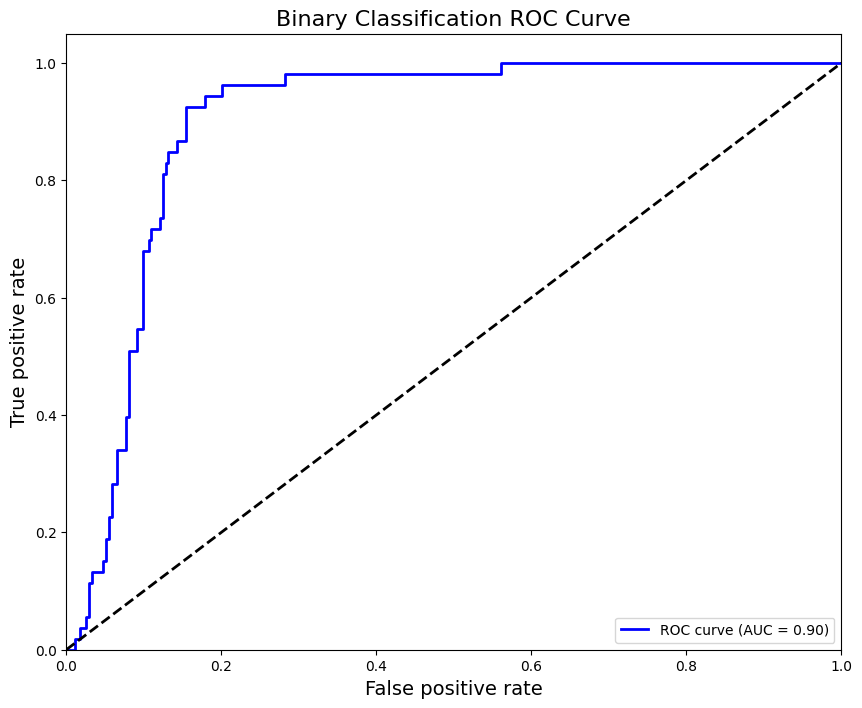

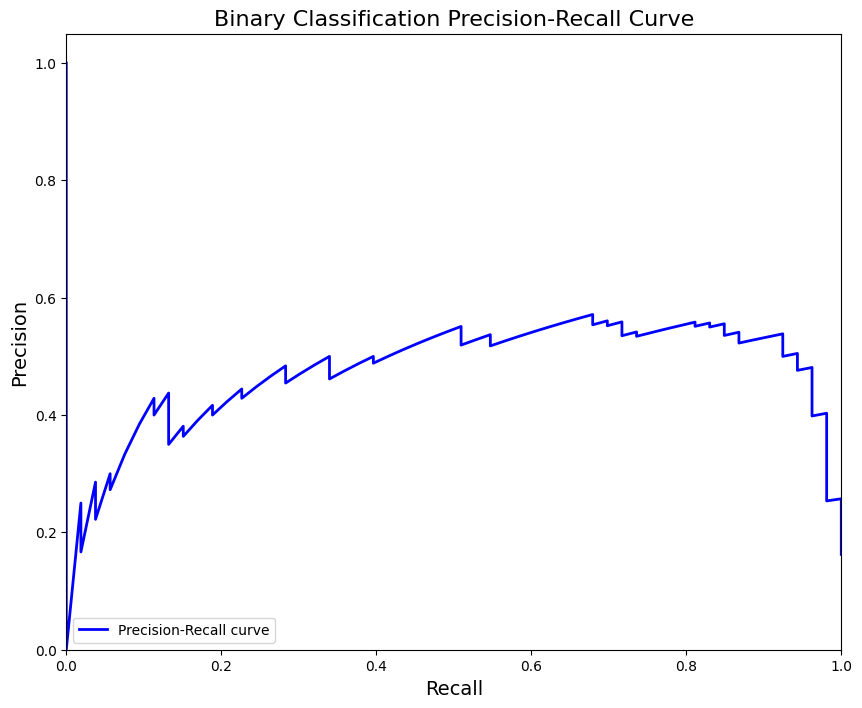

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Define a function to plot ROC curves for binary classification
def plot_roc_curve(y_true, y_scores):
    plt.figure(figsize=(10, 8))
    plt.title('Binary Classification ROC Curve', fontsize=16)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')

    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Set labels and appearance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate', fontsize=14)
    plt.ylabel('True positive rate', fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(False)

    return plt

# Define a function to plot Precision-Recall curves for binary classification
def plot_precision_recall_curve(y_true, y_scores):
    plt.figure(figsize=(10, 8))
    plt.title('Binary Classification Precision-Recall Curve', fontsize=16)

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_scores)

    # Plot precision-recall curve
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')

    # Set labels and appearance
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.legend(loc='lower left', fontsize=10)
    plt.grid(False)

    return plt

# Extract the required variables from merged_data
y_true = merged_data['label'].values  # Ground truth labels (0 for Non-conflict, 1 for Conflict)
y_scores = []

# Extract probability scores for the positive class (Conflict)
for result in merged_data['classification_result']:
    if isinstance(result, list):
        result = result[0]
    # If label is 'Conflict', use the score directly; otherwise use 1-score
    if result['label'] == 'Conflict':
        y_scores.append(result['score'])
    else:
        y_scores.append(1 - result['score'])

y_scores = np.array(y_scores)

# Generate the plots
roc_plot = plot_roc_curve(y_true, y_scores)
roc_plot.savefig('binary_classification_roc_curve.png', dpi=300, bbox_inches='tight')

pr_plot = plot_precision_recall_curve(y_true, y_scores)
pr_plot.savefig('binary_classification_precision_recall_curve.png', dpi=300, bbox_inches='tight')
